# LOAN CREDIT RISK MODELLING  (UNDER CONSTRUCTION)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
import warnings
warnings.filterwarnings('ignore')

# DEFINING THE PROBLEM
<p style='teData_lgdt-align: justify;'>
Probability of default (PD) is a financial term describing the likelihood of a default over a particular time horizon. It provides an estimate of the likelihood that a borrower will be unable to meet its debt obligations. PD is used in a variety of credit analyses and risk management frameworks. Under Basel II, it is a key parameter used in the calculation of economic capital or regulatory capital for a banking institution.  It assigns the value between 0 and 1  which can be interpreted as a probability of being defaulted.</p>

    Target Variable: "loan_status"
    Predictors: EData_lgdcept the "loan_status" which is a dependent variable in our model, the rest of the variables are  
    predictors.
    
    
<p style='teData_lgdt-align: justify;'>
Before establishing the model, first, we have to create/eData_lgdtract the dependent variable of our model. In our case, while the loan status is one of 'Charged Off', 'Default', 'Does not meet the credit policy. Status:Charged Off',\
'Late (31-120 days), it will be considered as defaulted and we will assign 0 to the loan status. Other cases are corresponding to the good credit and we will assign 1 to the loan status. </p>

## IMPORTING DATASET
<p style='teData_lgdt-align: justify;'>
Immediately after importing the required libraries, the neData_lgdt step is loading the dataset. Generally, the given dataset might include a huge number of entries, it might be very time-consuming to display it as a data frame table and get an insight about included features. A given dataset has total 74 features which includes categorical and numerical features. Before building any machine learning model it is very crucial for the data to be cleaned in an appropriate format. Hence, to collect the basic knowledge about the given dataset and the provided features, using the method "info" makes it much easier. Below, the cell shows how the info method can be applied to a given data frame and what information it provides as a result. </p>

In [3]:
Data        = pd.read_csv(r'loan_data_2007_2014.csv', low_memory = False)
Data_backup = pd.read_csv(r'loan_data_2007_2014.csv', low_memory = False)
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13 

## FEATURE DESCRIPTION
<p style='teData_lgdt-align: justify;'>
The list of all included featurs with the corresponding descriptions are shown in below talble. </p>

In [4]:
Data_description = pd.read_excel('LCDataDictionary.xlsx')
Data_description ['feature'] = Data_description.iloc[:,0]
Data_description ['Description'] = Data_description.iloc[:,1]
Data_description = Data_description[['feature', 'Description']].dropna()
Data_description.style.set_properties(subset=['Description'], **{'width': '1000px'})

,feature,Description
0,addr_state,The state provided by the borrower in the loan application
1,annual_inc,The self-reported annual income provided by the borrower during registration.
2,annual_inc_joint,The combined self-reported annual income provided by the co-borrowers during registration
3,application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers
4,collection_recovery_fee,post charge off collection fee
5,collections_12_mths_ex_med,Number of collections in 12 months excluding medical collections
6,delinq_2yrs,The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
7,desc,Loan description provided by the borrower
8,dti,"A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income."
9,dti_joint,"A ratio calculated using the co-borrowers' total monthly payments on the total debt obligations, excluding mortgages and the requested LC loan, divided by the co-borrowers' combined self-reported monthly income"


In [5]:
def good_bad(x):
    if x in ['Charged Off', 'Default', 'Does not meet the credit policy. Status:Charged Off',\
             'Late (31-120 days)']:
        return 0
    else:
        return 1
Data['good_bad'] = Data['loan_status'].map(good_bad)
Data.drop(columns = ['loan_status'], inplace = True)

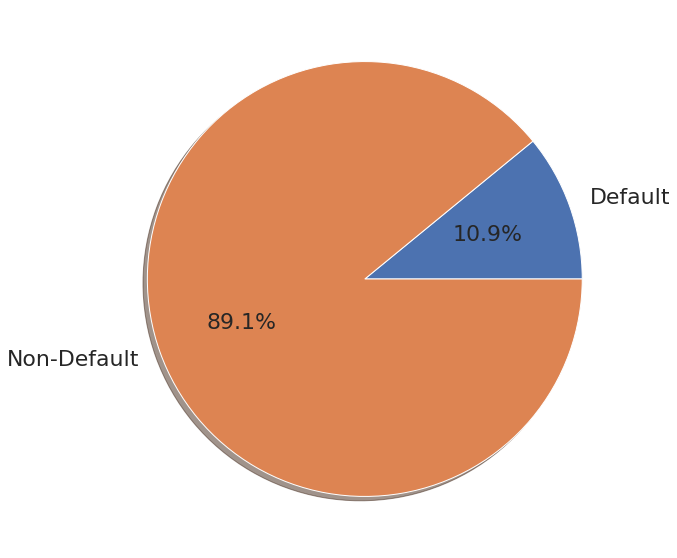

In [6]:
fig , ax = plt.subplots(nrows = 1, ncols = 1, figsize = ((10,10)))
ax.pie(Data.groupby('good_bad').count().agg(pd.Series.tolist)['id'],\
                                           labels = ['Default', 'Non-Default'], shadow = True ,\
                                           autopct="%.1f%%", textprops={'fontsize': 22})

plt.show()

# DATA PREPARATION AND PRELIMINARY DIMENSION REDUCTION

### BASIC EData_lgdPLORATION OF DATASET (DATA TYPES)
<p style='teData_lgdt-align: justify;'> 
To keep the model efficient and applicable, the only features which are relevant should be included in the model. However, normally given datasets provide so many features which highly likely most of them do not play an effective role in the loss equation modeling. For eData_lgdample, in a given dataset the features "email" and "url" of borrowers are completely irrelevant and do not have any contribution to the PD model (they are not correlated with a target variable). Some columns are identifiers and do not contain any significant information in building our machine learning model. For EData_lgdamples, the following id, member_id etc. Remember we are trying to build a model to predict the probability of a borrower defaulting a loan that means we will not need features that relates to events after a person has defaulted. Hence, we will not include them into our model. This is because at the time of granting a loan this information is not available. These features include recoveries, collection_recovery_fee etc the code below indicates the columns dropped. In the following, in order to keep the most relevant features, we will perform the feature selection into a given dataset. Commonly, the correlation type statistical methods are applied to measure the correlation of the input and output variable.  As such, the choice of statistical measures is highly dependent upon the variable data types. Roughly speaking, for the categorical and numerical features, we have to apply different methods.</p> 

<p style='teData_lgdt-align: justify;'>
Common data types include numerical (such as height) and categorical (such as a label), although each may be further subdivided such as integer and floating-point for numerical variables, and boolean, ordinal, or nominal for categorical variables. Below graph shows the datatype diagram. Borrowed from : https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/.</p> 

![indeData_lgd.webp](attachment:indeData_lgd.webp)

<p style='teData_lgdt-align: justify;'> 
Before starting the modelling procedure, it is always instructive to have a look at the given dataset to get deeper knowledge about the nature of the features. The "head" and "tail" commands show the most top and the most last entries of the data frame, respectively as is shown in the two below cells.  </p>

In [7]:
pd.options.display.max_columns = None
Data.sort_index(axis=1, inplace=True)
Data.head()

,acc_now_delinq,addr_state,all_util,annual_inc,annual_inc_joint,application_type,collection_recovery_fee,collections_12_mths_ex_med,delinq_2yrs,desc,dti,dti_joint,earliest_cr_line,emp_length,emp_title,funded_amnt,funded_amnt_inv,good_bad,grade,home_ownership,id,il_util,initial_list_status,inq_fi,inq_last_12m,inq_last_6mths,installment,int_rate,issue_d,last_credit_pull_d,last_pymnt_amnt,last_pymnt_d,loan_amnt,max_bal_bc,member_id,mths_since_last_delinq,mths_since_last_major_derog,mths_since_last_record,mths_since_rcnt_il,next_pymnt_d,open_acc,open_acc_6m,open_il_12m,open_il_24m,open_il_6m,open_rv_12m,open_rv_24m,out_prncp,out_prncp_inv,policy_code,pub_rec,purpose,pymnt_plan,recoveries,revol_bal,revol_util,sub_grade,term,title,tot_coll_amt,tot_cur_bal,total_acc,total_bal_il,total_cu_tl,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_late_fee,total_rec_prncp,total_rev_hi_lim,url,verification_status,verification_status_joint,zip_code
0,0.0,AZ,NaN,24000.0,NaN,INDIVIDUAL,0.00,0.0,0.0,Borrower added on 12/22/11 > I need to upgra...,27.65,NaN,Jan-85,10+ years,NaN,5000,4975.0,1,B,RENT,1077501,NaN,f,NaN,NaN,1.0,162.87,10.65,Dec-11,Jan-16,171.62,Jan-15,5000,NaN,1296599,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1,0.0,credit_card,n,0.00,13648,83.7,B2,36 months,Computer,NaN,NaN,9.0,NaN,NaN,5861.071414,5831.78,861.07,0.00,5000.00,NaN,https://www.lendingclub.com/browse/loanDetail....,Verified,NaN,860xx
1,0.0,GA,NaN,30000.0,NaN,INDIVIDUAL,1.11,0.0,0.0,Borrower added on 12/22/11 > I plan to use t...,1.00,NaN,Apr-99,< 1 year,Ryder,2500,2500.0,0,C,RENT,1077430,NaN,f,NaN,NaN,5.0,59.83,15.27,Dec-11,Sep-13,119.66,Apr-13,2500,NaN,1314167,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1,0.0,car,n,117.08,1687,9.4,C4,60 months,bike,NaN,NaN,4.0,NaN,NaN,1008.710000,1008.71,435.17,0.00,456.46,NaN,https://www.lendingclub.com/browse/loanDetail....,Source Verified,NaN,309xx
2,0.0,IL,NaN,12252.0,NaN,INDIVIDUAL,0.00,0.0,0.0,NaN,8.72,NaN,Nov-01,10+ years,NaN,2400,2400.0,1,C,RENT,1077175,NaN,f,NaN,NaN,2.0,84.33,15.96,Dec-11,Jan-16,649.91,Jun-14,2400,NaN,1313524,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1,0.0,small_business,n,0.00,2956,98.5,C5,36 months,real estate business,NaN,NaN,10.0,NaN,NaN,3003.653644,3003.65,603.65,0.00,2400.00,NaN,https://www.lendingclub.com/browse/loanDetail....,Not Verified,NaN,606xx
3,0.0,CA,NaN,49200.0,NaN,INDIVIDUAL,0.00,0.0,0.0,Borrower added on 12/21/11 > to pay for prop...,20.00,NaN,Feb-96,10+ years,AIR RESOURCES BOARD,10000,10000.0,1,C,RENT,1076863,NaN,f,NaN,NaN,1.0,339.31,13.49,Dec-11,Jan-15,357.48,Jan-15,10000,NaN,1277178,35.0,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1,0.0,other,n,0.00,5598,21.0,C1,36 months,personel,NaN,NaN,37.0,NaN,NaN,12226.302210,12226.30,2209.33,16.97,10000.00,NaN,https://www.lendingclub.com/browse/loanDetail....,Source Verified,NaN,917xx
4,0.0,OR,NaN,80000.0,NaN,INDIVIDUAL,0.00,0.0,0.0,Borrower added on 12/21/11 > I plan on combi...,17.94,NaN,Jan-96,1 year,University Medical Group,3000,3000.0,1,B,RENT,1075358,NaN,f,NaN,NaN,0.0,67.79,12.69,Dec-11,Jan-16,67.79,Jan-16,3000,NaN,1311748,38.0,NaN,NaN,NaN,Feb-16,15.0,NaN,NaN,NaN,NaN,NaN,NaN,766.9,766.9,1,0.0,other,n,0.00,27783,53.9,B5,60 months,Personal,NaN,NaN,38.0,NaN,NaN,3242.170000,3242.17,1009.07,0.00,2233.10,NaN,https://www.lendingclub.com/browse/loanDetail....,Source Verified,NaN,972xx


In [8]:
Data.tail()

,acc_now_delinq,addr_state,all_util,annual_inc,annual_inc_joint,application_type,collection_recovery_fee,collections_12_mths_ex_med,delinq_2yrs,desc,dti,dti_joint,earliest_cr_line,emp_length,emp_title,funded_amnt,funded_amnt_inv,good_bad,grade,home_ownership,id,il_util,initial_list_status,inq_fi,inq_last_12m,inq_last_6mths,installment,int_rate,issue_d,last_credit_pull_d,last_pymnt_amnt,last_pymnt_d,loan_amnt,max_bal_bc,member_id,mths_since_last_delinq,mths_since_last_major_derog,mths_since_last_record,mths_since_rcnt_il,next_pymnt_d,open_acc,open_acc_6m,open_il_12m,open_il_24m,open_il_6m,open_rv_12m,open_rv_24m,out_prncp,out_prncp_inv,policy_code,pub_rec,purpose,pymnt_plan,recoveries,revol_bal,revol_util,sub_grade,term,title,tot_coll_amt,tot_cur_bal,total_acc,total_bal_il,total_cu_tl,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_late_fee,total_rec_prncp,total_rev_hi_lim,url,verification_status,verification_status_joint,zip_code
466280,0.0,TX,NaN,110000.0,NaN,INDIVIDUAL,0.0,0.0,0.0,NaN,19.85,NaN,Apr-03,4 years,Financial Advisor,18400,18400.0,1,C,MORTGAGE,8598660,NaN,w,NaN,NaN,2.0,432.64,14.47,Jan-14,Jan-16,432.64,Jan-16,18400,NaN,1440975,NaN,NaN,NaN,NaN,Feb-16,18.0,NaN,NaN,NaN,NaN,NaN,NaN,12574.00,12574.00,1,0.0,debt_consolidation,n,0.0,23208,77.6,C2,60 months,Debt consolidation,0.0,294998.0,36.0,NaN,NaN,10383.360000,10383.36,4557.36,0.0,5826.00,29900.0,https://www.lendingclub.com/browse/loanDetail....,Source Verified,NaN,773xx
466281,0.0,TN,NaN,78000.0,NaN,INDIVIDUAL,0.0,0.0,0.0,NaN,18.45,NaN,Jun-97,10+ years,Chief of Interpretation (Park Ranger),22000,22000.0,0,D,MORTGAGE,9684700,NaN,f,NaN,NaN,5.0,582.50,19.97,Jan-14,Jan-16,17.50,Dec-14,22000,NaN,11536848,NaN,NaN,116.0,NaN,NaN,18.0,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,1,1.0,debt_consolidation,n,0.0,18238,46.3,D5,60 months,Debt consolidation,0.0,221830.0,30.0,NaN,NaN,4677.920000,4677.92,2840.88,0.0,1837.04,39400.0,https://www.lendingclub.com/browse/loanDetail....,Verified,NaN,377xx
466282,0.0,OH,NaN,46000.0,NaN,INDIVIDUAL,0.0,0.0,0.0,Borrower added on 12/06/13 > I am going to c...,25.65,NaN,Dec-01,7 years,patrol,20700,20700.0,1,D,MORTGAGE,9584776,NaN,f,NaN,NaN,2.0,514.34,16.99,Jan-14,Dec-15,514.34,Jan-16,20700,NaN,11436914,65.0,NaN,NaN,NaN,Feb-16,18.0,NaN,NaN,NaN,NaN,NaN,NaN,14428.31,14428.31,1,0.0,debt_consolidation,n,0.0,6688,51.1,D1,60 months,Debt consolidation,0.0,73598.0,43.0,NaN,NaN,12343.980000,12343.98,6072.29,0.0,6271.69,13100.0,https://www.lendingclub.com/browse/loanDetail....,Verified,NaN,458xx
466283,0.0,CA,NaN,83000.0,NaN,INDIVIDUAL,0.0,0.0,3.0,NaN,5.39,NaN,Feb-03,3 years,Server Engineer Lead,2000,2000.0,1,A,OWN,9604874,NaN,w,NaN,NaN,1.0,62.59,7.90,Jan-14,Apr-15,1500.68,Dec-14,2000,NaN,11457002,13.0,NaN,NaN,NaN,NaN,21.0,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,1,0.0,credit_card,n,0.0,11404,21.5,A4,36 months,Credit card refinancing,0.0,591610.0,27.0,NaN,NaN,2126.579838,2126.58,126.58,0.0,2000.00,53100.0,https://www.lendingclub.com/browse/loanDetail....,Verified,NaN,913xx
466284,0.0,CA,NaN,46000.0,NaN,INDIVIDUAL,0.0,0.0,1.0,Borrower added on 12/04/13 > I will like a l...,22.78,NaN,Feb-00,10+ years,NaN,10000,9975.0,1,D,MORTGAGE,9199665,NaN,f,NaN,NaN,0.0,367.58,19.20,Jan-14,Jan-16,367.58,Jan-16,10000,NaN,11061576,9.0,NaN,NaN,NaN,Feb-16,6.0,NaN,NaN,NaN,NaN,NaN,NaN,3984.38,3974.41,1,0.0,other,n,0.0,11325,70.8,D3,36 months,Other,0.0,57477.0,22.0,NaN,NaN,8821.620000,8799.57,2806.00,0.0,6015.62,16000.0,https://www.lendingclub.com/browse/loanDetail....,Verified,NaN,950xx


### REMOVING IRRELEVANT FEATURES
<p style='teData_lgdt-align: justify;'> 
As mentined earlier, some columns are identifiers and do not contain any significant information in building our machine learning model. EData_lgdamples include the following id, member_id etc. Remember we are trying to build a model to predict the probability of a borrower defaulting a loan that means we will not need features that relates to events after a person has defaulted. This is because at the time of granting a loan this information is not available. These features include recoveries, collection_recovery_fee etc the code below indicates the columns dropped.  Below is the code employed to remove irrelevant columns.</p>

In [9]:
#droppng of irrelevant columns and rows with missing values
columns_to_drop = ['id', 'member_id', 'sub_grade', 'emp_title', 'url', 'desc', 'title', 'zip_code', 'next_pymnt_d',
                   'recoveries', 'collection_recovery_fee', 'total_rec_prncp', 'total_rec_late_fee', 'desc', 'mths_since_last_record',
                   'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'open_acc_6m', 'open_il_6m',
                   'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m',
                   'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m','policy_code',]
Data.drop(columns = columns_to_drop, inplace = True, axis = 1)
Data

,acc_now_delinq,addr_state,annual_inc,application_type,collections_12_mths_ex_med,delinq_2yrs,dti,earliest_cr_line,emp_length,funded_amnt,funded_amnt_inv,good_bad,grade,home_ownership,initial_list_status,inq_last_6mths,installment,int_rate,issue_d,last_credit_pull_d,last_pymnt_amnt,last_pymnt_d,loan_amnt,mths_since_last_delinq,open_acc,out_prncp,out_prncp_inv,pub_rec,purpose,pymnt_plan,revol_bal,revol_util,term,tot_coll_amt,tot_cur_bal,total_acc,total_pymnt,total_pymnt_inv,total_rec_int,total_rev_hi_lim,verification_status
0,0.0,AZ,24000.0,INDIVIDUAL,0.0,0.0,27.65,Jan-85,10+ years,5000,4975.0,1,B,RENT,f,1.0,162.87,10.65,Dec-11,Jan-16,171.62,Jan-15,5000,NaN,3.0,0.00,0.00,0.0,credit_card,n,13648,83.7,36 months,NaN,NaN,9.0,5861.071414,5831.78,861.07,NaN,Verified
1,0.0,GA,30000.0,INDIVIDUAL,0.0,0.0,1.00,Apr-99,< 1 year,2500,2500.0,0,C,RENT,f,5.0,59.83,15.27,Dec-11,Sep-13,119.66,Apr-13,2500,NaN,3.0,0.00,0.00,0.0,car,n,1687,9.4,60 months,NaN,NaN,4.0,1008.710000,1008.71,435.17,NaN,Source Verified
2,0.0,IL,12252.0,INDIVIDUAL,0.0,0.0,8.72,Nov-01,10+ years,2400,2400.0,1,C,RENT,f,2.0,84.33,15.96,Dec-11,Jan-16,649.91,Jun-14,2400,NaN,2.0,0.00,0.00,0.0,small_business,n,2956,98.5,36 months,NaN,NaN,10.0,3003.653644,3003.65,603.65,NaN,Not Verified
3,0.0,CA,49200.0,INDIVIDUAL,0.0,0.0,20.00,Feb-96,10+ years,10000,10000.0,1,C,RENT,f,1.0,339.31,13.49,Dec-11,Jan-15,357.48,Jan-15,10000,35.0,10.0,0.00,0.00,0.0,other,n,5598,21.0,36 months,NaN,NaN,37.0,12226.302210,12226.30,2209.33,NaN,Source Verified
4,0.0,OR,80000.0,INDIVIDUAL,0.0,0.0,17.94,Jan-96,1 year,3000,3000.0,1,B,RENT,f,0.0,67.79,12.69,Dec-11,Jan-16,67.79,Jan-16,3000,38.0,15.0,766.90,766.90,0.0,other,n,27783,53.9,60 months,NaN,NaN,38.0,3242.170000,3242.17,1009.07,NaN,Source Verified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,0.0,TX,110000.0,INDIVIDUAL,0.0,0.0,19.85,Apr-03,4 years,18400,18400.0,1,C,MORTGAGE,w,2.0,432.64,14.47,Jan-14,Jan-16,432.64,Jan-16,18400,NaN,18.0,12574.00,12574.00,0.0,debt_consolidation,n,23208,77.6,60 months,0.0,294998.0,36.0,10383.360000,10383.36,4557.36,29900.0,Source Verified
466281,0.0,TN,78000.0,INDIVIDUAL,0.0,0.0,18.45,Jun-97,10+ years,22000,22000.0,0,D,MORTGAGE,f,5.0,582.50,19.97,Jan-14,Jan-16,17.50,Dec-14,22000,NaN,18.0,0.00,0.00,1.0,debt_consolidation,n,18238,46.3,60 months,0.0,221830.0,30.0,4677.920000,4677.92,2840.88,39400.0,Verified
466282,0.0,OH,46000.0,INDIVIDUAL,0.0,0.0,25.65,Dec-01,7 years,20700,20700.0,1,D,MORTGAGE,f,2.0,514.34,16.99,Jan-14,Dec-15,514.34,Jan-16,20700,65.0,18.0,14428.31,14428.31,0.0,debt_consolidation,n,6688,51.1,60 months,0.0,73598.0,43.0,12343.980000,12343.98,6072.29,13100.0,Verified
466283,0.0,CA,83000.0,INDIVIDUAL,0.0,3.0,5.39,Feb-03,3 years,2000,2000.0,1,A,OWN,w,1.0,62.59,7.90,Jan-14,Apr-15,1500.68,Dec-14,2000,13.0,21.0,0.00,0.00,0.0,credit_card,n,11404,21.5,36 months,0.0,591610.0,27.0,2126.579838,2126.58,126.58,53100.0,Verified


<p style='teData_lgdt-align: justify;'> 
Most of the time, there are some columns whose values partially is missing. Since the data is very important for us and we do not want to lose it easily, we will try to impute those missing values. However, there might be some columns that have high missing value percentages and unfortunately, we can not help them and the most reasonable way is to drop them and going ahead without them. The below cell uses the "remover" function to drop those columns that have a missing value percentage above "criteria". </p>

In [10]:
def remover(Data, criteria = 20):
    for feature in Data.columns.tolist():
        characterstic = Data[feature].isnull().mean()*100
        if characterstic > criteria:
            Data.drop(columns = feature, inplace = True)    
    return Data      

In [11]:
# Below line enables the Jupyter notebook to show the whole columns in the dataframe otherwise by default it shows
# the dataframe partially.
pd.options.display.max_columns = None
Data.head(10)

,acc_now_delinq,addr_state,annual_inc,application_type,collections_12_mths_ex_med,delinq_2yrs,dti,earliest_cr_line,emp_length,funded_amnt,funded_amnt_inv,good_bad,grade,home_ownership,initial_list_status,inq_last_6mths,installment,int_rate,issue_d,last_credit_pull_d,last_pymnt_amnt,last_pymnt_d,loan_amnt,mths_since_last_delinq,open_acc,out_prncp,out_prncp_inv,pub_rec,purpose,pymnt_plan,revol_bal,revol_util,term,tot_coll_amt,tot_cur_bal,total_acc,total_pymnt,total_pymnt_inv,total_rec_int,total_rev_hi_lim,verification_status
0,0.0,AZ,24000.0,INDIVIDUAL,0.0,0.0,27.65,Jan-85,10+ years,5000,4975.0,1,B,RENT,f,1.0,162.87,10.65,Dec-11,Jan-16,171.62,Jan-15,5000,NaN,3.0,0.00,0.00,0.0,credit_card,n,13648,83.7,36 months,NaN,NaN,9.0,5861.071414,5831.78,861.07,NaN,Verified
1,0.0,GA,30000.0,INDIVIDUAL,0.0,0.0,1.00,Apr-99,< 1 year,2500,2500.0,0,C,RENT,f,5.0,59.83,15.27,Dec-11,Sep-13,119.66,Apr-13,2500,NaN,3.0,0.00,0.00,0.0,car,n,1687,9.4,60 months,NaN,NaN,4.0,1008.710000,1008.71,435.17,NaN,Source Verified
2,0.0,IL,12252.0,INDIVIDUAL,0.0,0.0,8.72,Nov-01,10+ years,2400,2400.0,1,C,RENT,f,2.0,84.33,15.96,Dec-11,Jan-16,649.91,Jun-14,2400,NaN,2.0,0.00,0.00,0.0,small_business,n,2956,98.5,36 months,NaN,NaN,10.0,3003.653644,3003.65,603.65,NaN,Not Verified
3,0.0,CA,49200.0,INDIVIDUAL,0.0,0.0,20.00,Feb-96,10+ years,10000,10000.0,1,C,RENT,f,1.0,339.31,13.49,Dec-11,Jan-15,357.48,Jan-15,10000,35.0,10.0,0.00,0.00,0.0,other,n,5598,21.0,36 months,NaN,NaN,37.0,12226.302210,12226.30,2209.33,NaN,Source Verified
4,0.0,OR,80000.0,INDIVIDUAL,0.0,0.0,17.94,Jan-96,1 year,3000,3000.0,1,B,RENT,f,0.0,67.79,12.69,Dec-11,Jan-16,67.79,Jan-16,3000,38.0,15.0,766.90,766.90,0.0,other,n,27783,53.9,60 months,NaN,NaN,38.0,3242.170000,3242.17,1009.07,NaN,Source Verified
5,0.0,AZ,36000.0,INDIVIDUAL,0.0,0.0,11.20,Nov-04,3 years,5000,5000.0,1,A,RENT,f,3.0,156.46,7.90,Dec-11,Sep-15,161.03,Jan-15,5000,NaN,9.0,0.00,0.00,0.0,wedding,n,7963,28.3,36 months,NaN,NaN,12.0,5631.377753,5631.38,631.38,NaN,Source Verified
6,0.0,NC,47004.0,INDIVIDUAL,0.0,0.0,23.51,Jul-05,8 years,7000,7000.0,1,C,RENT,f,1.0,170.08,15.96,Dec-11,Jan-16,170.08,Jan-16,7000,NaN,7.0,1889.15,1889.15,0.0,debt_consolidation,n,17726,85.6,60 months,NaN,NaN,11.0,8136.840000,8136.84,3025.99,NaN,Not Verified
7,0.0,CA,48000.0,INDIVIDUAL,0.0,0.0,5.35,Jan-07,9 years,3000,3000.0,1,E,RENT,f,2.0,109.43,18.64,Dec-11,Dec-14,111.34,Jan-15,3000,NaN,4.0,0.00,0.00,0.0,car,n,8221,87.5,36 months,NaN,NaN,4.0,3938.144334,3938.14,938.14,NaN,Source Verified
8,0.0,CA,40000.0,INDIVIDUAL,0.0,0.0,5.55,Apr-04,4 years,5600,5600.0,0,F,OWN,f,2.0,152.39,21.28,Dec-11,Aug-12,152.39,Apr-12,5600,NaN,11.0,0.00,0.00,0.0,small_business,n,5210,32.6,60 months,NaN,NaN,13.0,646.020000,646.02,294.94,NaN,Source Verified
9,0.0,TX,15000.0,INDIVIDUAL,0.0,0.0,18.08,Sep-04,< 1 year,5375,5350.0,0,B,RENT,f,0.0,121.45,12.69,Dec-11,Mar-13,121.45,Nov-12,5375,NaN,2.0,0.00,0.00,0.0,other,n,9279,36.5,60 months,NaN,NaN,3.0,1476.190000,1469.34,533.42,NaN,Verified


In [12]:
# To check how many of columns are gone
print(Data.shape)
Data = remover(Data)
print(Data.shape)

(466285, 41)
(466285, 40)


### DATA CLEANING
<p style='teData_lgdt-align: justify;'> 
As mentioned earlier, we only consider categorical and numerical values for the credit risk modeling. Sometimes, a given dataset contain some columns which need a bit of preprocessing to convert its values to the acceptable format. For eData_lgdample, the "emp_length_int", naturally should be a discrete number. Below cell shows the eData_lgdtraction of the integer valued feature "emp_length_int" from "emp_length" as well as "term_int" from "term_int.</p>

In [13]:
# The independent variable emp_length_int is given in the form which is not useful. In order to make it useful
# we have to remore extra parts and then convert it into numeric value. Below lines of the code are doing it.
Data['emp_length'] = Data['emp_length'].str.replace(    '\+ years', '',    regex=True)
Data['emp_length'] = Data['emp_length'].str.replace('< 1 year', str(0),regex=True)
Data['emp_length'] = Data['emp_length'].str.replace('n/a',  str(0)    ,regex=True)
Data['emp_length'] = Data['emp_length'].str.replace(' years', ''      ,regex=True)
Data['emp_length'] = Data['emp_length'].str.replace(' year', ''       ,regex=True)
Data['emp_length'] = pd.to_numeric(Data['emp_length'])
Data.drop(columns      = ['emp_length'], inplace = True)

In [14]:
# converting term column to numeric data type
def term_numeric(df, column):
    df[column] = pd.to_numeric(df[column].str.replace(' months', ''))
    
term_numeric(Data, 'term')
Data['term_int'] = Data['term']
Data.drop('term', axis = 1, inplace = True)

In [15]:
# preprocessing date columns 
def date_columns(df, column):
    # store current month
    today_date = pd.to_datetime('today')
    # convert to datetime format
    df[column] = pd.to_datetime(df[column], format = "%b-%y")
    # calculate the difference in months and add to a new column
    df['mths_since_' + column] = round(pd.to_numeric((today_date - df[column]) / np.timedelta64(1, 'M')))
    # make any resulting -ve values to be equal to the max date
    df['mths_since_' + column] = df['mths_since_' + column].apply(lambda x: df['mths_since_' + column].max() if x < 0 else x)
    # drop the original date column
    df.drop(columns = [column], inplace = True)
    
date_columns(Data, 'issue_d')
date_columns(Data, 'last_pymnt_d')
date_columns(Data, 'last_credit_pull_d')
date_columns(Data, 'earliest_cr_line')

### IMPUTING MISSING VALUES

In [16]:
# checking for missing values percentage  
missing_values = Data.isnull().sum()
missing_values[missing_values>0]/len(Data)

acc_now_delinq                   0.000062
annual_inc                       0.000009
collections_12_mths_ex_med       0.000311
delinq_2yrs                      0.000062
inq_last_6mths                   0.000062
open_acc                         0.000062
pub_rec                          0.000062
revol_util                       0.000729
tot_coll_amt                     0.150715
tot_cur_bal                      0.150715
total_acc                        0.000062
total_rev_hi_lim                 0.150715
mths_since_last_pymnt_d          0.000806
mths_since_last_credit_pull_d    0.000090
mths_since_earliest_cr_line      0.000062
dtype: float64

In [17]:
# 'Total revolving high credit/ credit limit', so it makes sense that the missing values are equal to funded_amnt.
Data['total_rev_hi_lim'].fillna(Data['funded_amnt'], inplace=True)

# Here we are going to impute the annual income with it's mean value. Since above graph shows, anual income of the
# most of the borrower are localized around zero (consider the scale), it is not reasonable to impute with its mean
# value. However, here, for the sake of the simplicity we will do it. 
Data['annual_inc'].fillna(Data['annual_inc'].mean(), inplace=True)

# Below lines of the code, imputing the damaged variables. However, in a realistic case we have to be very careful
# according the imputation because it highly likely it will affects the quality of the results. I have to mention 
# that I did the simplest job. Above mentioned situation might be valid here as well.
Data['acc_now_delinq'].fillna(Data['acc_now_delinq'].mean(), inplace=True)
Data['total_acc'].fillna(Data['total_acc'].mean(), inplace=True)
Data['pub_rec'].fillna(Data['pub_rec'].mean(), inplace=True)
Data['open_acc'].fillna(Data['open_acc'].mean(), inplace=True)
Data['inq_last_6mths'].fillna(Data['inq_last_6mths'].mean(), inplace=True)
Data['delinq_2yrs'].fillna(Data['delinq_2yrs'].mean(), inplace=True)
Data['collections_12_mths_ex_med'].fillna(Data['collections_12_mths_ex_med'].mean(), inplace=True)
Data['revol_util'].fillna(Data['revol_util'].mean(), inplace=True)
Data['tot_coll_amt'].fillna(Data['tot_coll_amt'].mean(), inplace=True)
Data['tot_cur_bal'].fillna(Data['tot_cur_bal'].mean(), inplace=True)
Data['mths_since_last_pymnt_d'].fillna(Data['mths_since_last_pymnt_d'].mean(), inplace=True)
Data['mths_since_last_credit_pull_d'].fillna(Data['mths_since_last_credit_pull_d'].mean(), inplace=True)
Data['mths_since_earliest_cr_line'].fillna(Data['mths_since_earliest_cr_line'].mean(), inplace=True)

### STEPERATION OF CATEGORICAL AND NUMERICAL FEATURES
Once we have successfully eData_lgdtracted the numerical and categorical features, we are ready to break down the whole given dataset into two categorical and numerical parts which make the progress easier. The below cell shows how a given dataset "Data" can be divided into two categorical and numerical parts. 

In [18]:
categorical_features_lgd = Data.select_dtypes(exclude = 'number')
numerical_features   = Data.select_dtypes(exclude = 'object')

## PRELIMINARY DIMENSION REDUCTION
<p style='teData_lgdt-align: justify;'> 
While the categorical and numerical features are selected, we can take one step more and by using the feature selection method reduce the number of features from both categorical and numerical features and keep only the most important features to be used in the PD model. As mentioned earlier, we have to apply different feature selection rules for the categorical and numerical features. The procedure is as follow:</p>

<p style='teData_lgdt-align: justify;'> 
1- While the input and output parameters both are numerical ones, the most common techniques are to use a correlation coefficient, such as Pearson’s for a linear correlation, or rank-based methods for a nonlinear correlation.</p>

    Pearson’s correlation coefficient (linear).
    Spearman’s rank coefficient (nonlinear)

<p style='teData_lgdt-align: justify;'> 
2- If the input parameter is a numerical one and the output is a categorical feature, this is a classification predictive modeling problem with numerical input variables. This might be the most common eData_lgdample of a classification problem, Again, the most common techniques are correlation-based, although in this case, they must take the categorical target into account.</p>

    ANOVA correlation coefficient (linear).
    Kendall’s rank coefficient (nonlinear).
<p style='teData_lgdt-align: justify;'> 
One should note that Kendall does assume that the categorical variable is ordinal.</P>


<p style='teData_lgdt-align: justify;'> 
3- For the case in which the input parameter is categorical and the output is numerical, this is a regression predictive modeling problem with categorical input variables. This is a strange eData_lgdample of a regression problem (e.g. you would not encounter it often). Nevertheless, you can use the same “Numerical Input, Categorical Output” methods (described above), but in reverse.</p>


<p style='teData_lgdt-align: justify;'> 
4- Finally, when the input parameter is categorical as well as output parameter, this is a classification predictive modeling problem with categorical input variables. The most common correlation measure for categorical data is the chi-squared test. You can also use mutual information (information gain) from the field of information theory.</p>

    Chi-Squared test (contingency tables).
    Mutual Information.

<p style='teData_lgdt-align: justify;'> 
It is worth mentioning that, in fact, mutual information is a powerful method that may prove useful for both categorical and numerical data, e.g. it is agnostic to the data types.</p>

<p style='teData_lgdt-align: justify;'> 
Since in the PD model the target variable is a binary categorical one and the input variables also can be either categorical or numerical, hence we will apply the chi-square and correlation for the final variable selection procedure. </p>

<p style='teData_lgdt-align: justify;'> 
However, it will be instructive to have a look into both categorical and numerical features deeply.  To this end, for the case of the categorical features, we will use stacked bar plots that show the portions of the good (blue part) and bad borrowers (red parts) in each subcategory of the categorical features. Below graph is borrowed from https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/.</p>


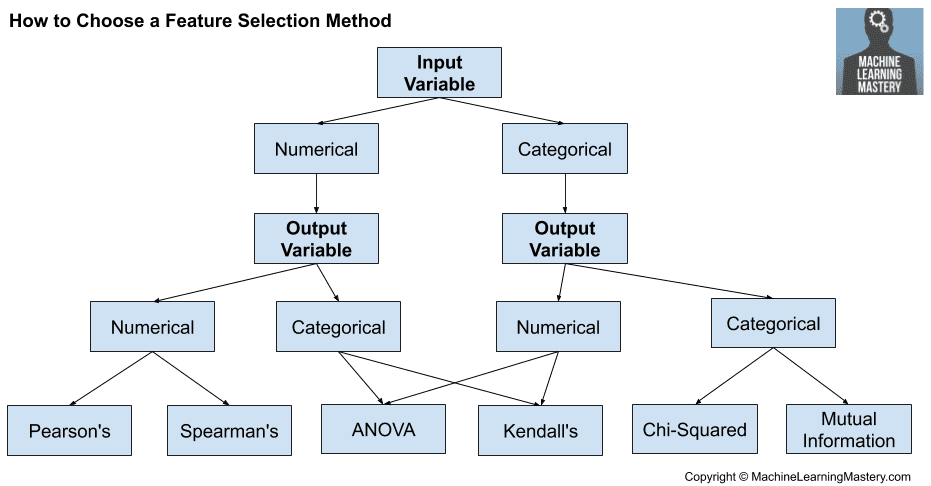

### CATEGORICAL FEATURES VISUAL DATA  EData_lgdPLORATORY 
The below cell, indicates the contribution of the good and bad borrowers in each category. The blue part shows the portion of the good borrowers and the red part indicates bad borrowers contribution from each sub-category.

In [19]:
categorical_features_lgd.sort_index(axis = 1, inplace = True)
categorical_features_lgd

,addr_state,application_type,grade,home_ownership,initial_list_status,purpose,pymnt_plan,verification_status
0,AZ,INDIVIDUAL,B,RENT,f,credit_card,n,Verified
1,GA,INDIVIDUAL,C,RENT,f,car,n,Source Verified
2,IL,INDIVIDUAL,C,RENT,f,small_business,n,Not Verified
3,CA,INDIVIDUAL,C,RENT,f,other,n,Source Verified
4,OR,INDIVIDUAL,B,RENT,f,other,n,Source Verified
...,...,...,...,...,...,...,...,...
466280,TX,INDIVIDUAL,C,MORTGAGE,w,debt_consolidation,n,Source Verified
466281,TN,INDIVIDUAL,D,MORTGAGE,f,debt_consolidation,n,Verified
466282,OH,INDIVIDUAL,D,MORTGAGE,f,debt_consolidation,n,Verified
466283,CA,INDIVIDUAL,A,OWN,w,credit_card,n,Verified


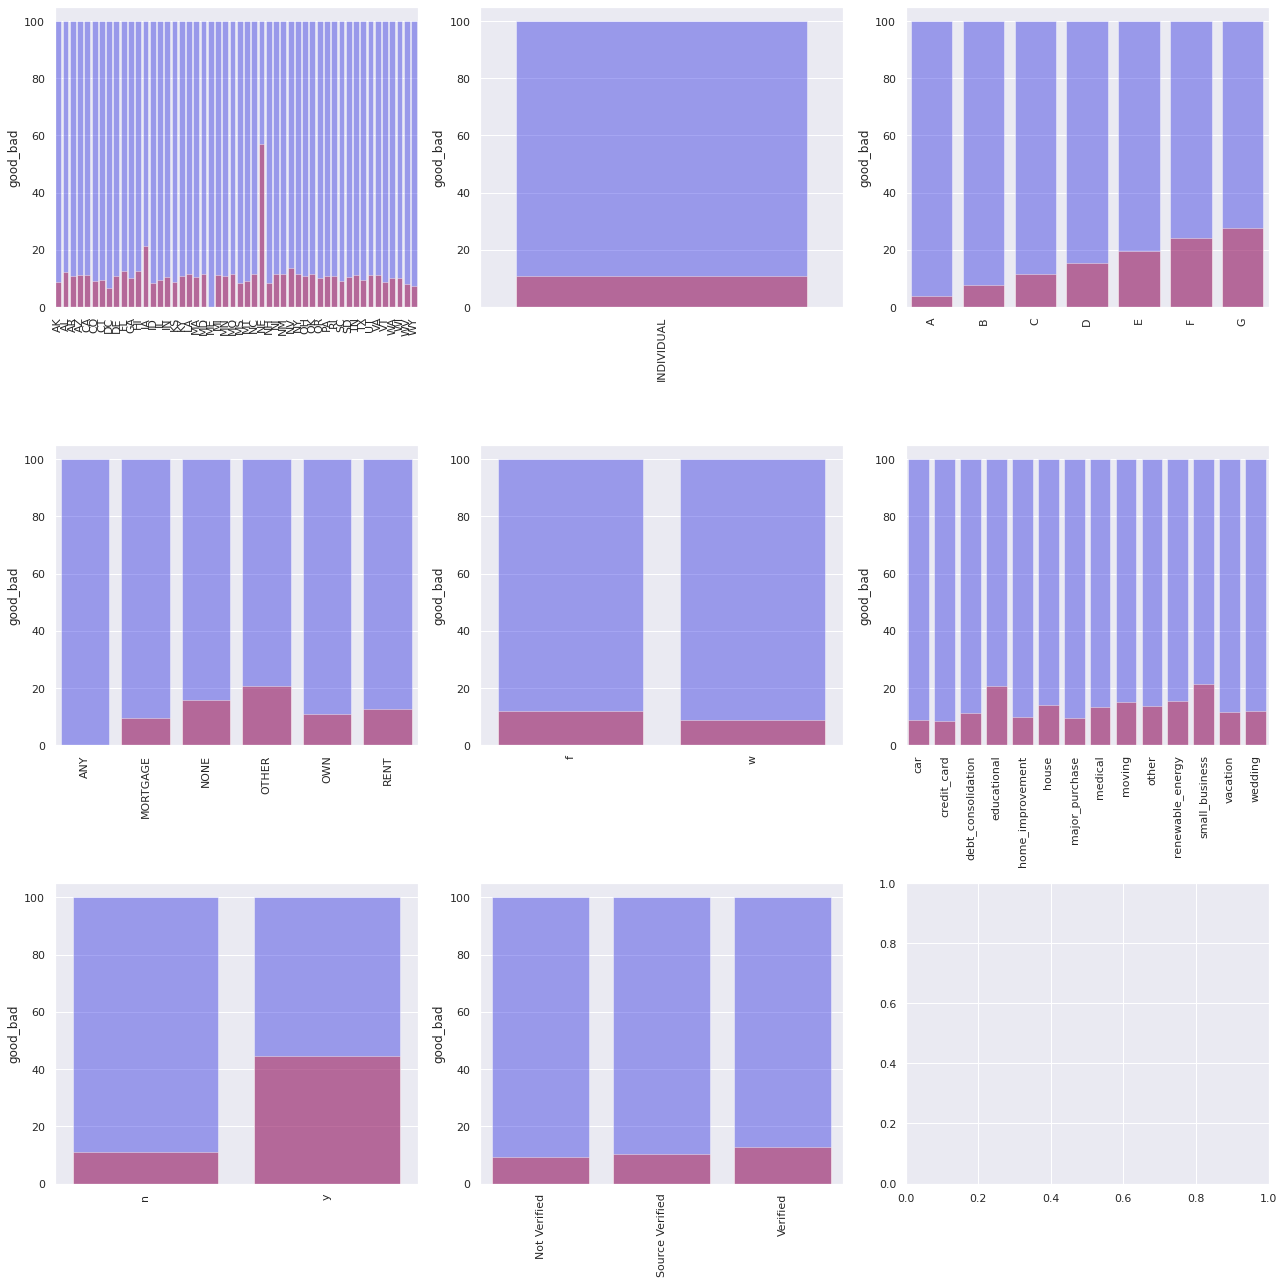

In [20]:
fig , axes = plt.subplots(nrows = 3, ncols = 3, figsize = ((18,18)))
angel = 90
count = 1
for i in range(3):
    for j in range(3):
        if (count <= len(categorical_features_lgd.columns.tolist())):
            feature = categorical_features_lgd.columns.tolist()[count-1]
            plt.subplot(3,3, count)
            sns.barplot(x = sorted(categorical_features_lgd[feature].unique()) , \
                    y = [100]*len(categorical_features_lgd[feature].unique().tolist()), color = 'blue', alpha = 0.4)
            sns.barplot(x = sorted(categorical_features_lgd[feature].unique()) , \
                    y = (1 - Data.groupby(feature)["good_bad"].sum()/Data.groupby(feature)["good_bad"].count()\
                        )*100, color = 'red', alpha = 0.4)
            count = count + 1
            locs, labels = plt.xticks()
            plt.setp(labels, rotation = 90)
        else:
            pass
            plt.tight_layout()        
            plt.show()

### CHI-SQUARE TEST FOR CATEGORICAL FEATURE SELECTION
Now we will apply the chi-square feature selection for the categorical features, it assigns the P-value for each categorical feature. If the assigned P-value is less than 0.005, the corresponding feature will be selected other wise it will be dropped from the categorical feature list. As is shown in the below cell, the P-value corresponding all categorical features is less than 0.005 and henec, we will keep all of them for the PD modelling.

In [21]:
# Writing a function to find the correlation of all categorical variables with the Target variable
def FunctionChisq(inpData, TargetVariable, CategoricalVariablesList):
    from scipy.stats import chi2_contingency
    
    # Creating an empty list of final selected predictors
    SelectedPredictors = []

    for predictor in CategoricalVariablesList:
        CrossTabResult = pd.crosstab(index = inpData[TargetVariable], columns = inpData[predictor])
        ChiSqResult    = chi2_contingency(CrossTabResult)
        
        if (ChiSqResult[1] < 0.05):
            print('The {:20} is \t correlated with target variable and the calculated P-value is {:12.4f}'.format(predictor,ChiSqResult[1] ))
            SelectedPredictors.append(predictor)
        else:
            print('The {:20} is NOT  correlated with target variable and the calculated P-value is {:12.4f}'.format(predictor,ChiSqResult[1] ))            
    return(SelectedPredictors)

In [22]:
# Calling the function to check which categorical variables are correlated with target
CategoricalVariablesList = categorical_features_lgd.columns.tolist()

FunctionChisq(inpData = Data, TargetVariable='good_bad', CategoricalVariablesList = CategoricalVariablesList)

The addr_state           is 	 correlated with target variable and the calculated P-value is       0.0000
The application_type     is NOT  correlated with target variable and the calculated P-value is       1.0000
The grade                is 	 correlated with target variable and the calculated P-value is       0.0000
The home_ownership       is 	 correlated with target variable and the calculated P-value is       0.0000
The initial_list_status  is 	 correlated with target variable and the calculated P-value is       0.0000
The purpose              is 	 correlated with target variable and the calculated P-value is       0.0000
The pymnt_plan           is 	 correlated with target variable and the calculated P-value is       0.0072
The verification_status  is 	 correlated with target variable and the calculated P-value is       0.0000


['addr_state',
 'grade',
 'home_ownership',
 'initial_list_status',
 'purpose',
 'pymnt_plan',
 'verification_status']

In [23]:
# Print final version of the categorical features
categorical_features_lgd = categorical_features_lgd[['addr_state', 'grade', 'home_ownership', 'initial_list_status',\
                                             'purpose', 'pymnt_plan', 'verification_status']] 
categorical_features_lgd

,addr_state,grade,home_ownership,initial_list_status,purpose,pymnt_plan,verification_status
0,AZ,B,RENT,f,credit_card,n,Verified
1,GA,C,RENT,f,car,n,Source Verified
2,IL,C,RENT,f,small_business,n,Not Verified
3,CA,C,RENT,f,other,n,Source Verified
4,OR,B,RENT,f,other,n,Source Verified
...,...,...,...,...,...,...,...
466280,TX,C,MORTGAGE,w,debt_consolidation,n,Source Verified
466281,TN,D,MORTGAGE,f,debt_consolidation,n,Verified
466282,OH,D,MORTGAGE,f,debt_consolidation,n,Verified
466283,CA,A,OWN,w,credit_card,n,Verified


### NUMERICAL FEATURES 

In [24]:
numerical_features

,acc_now_delinq,annual_inc,collections_12_mths_ex_med,delinq_2yrs,dti,funded_amnt,funded_amnt_inv,good_bad,inq_last_6mths,installment,int_rate,last_pymnt_amnt,loan_amnt,open_acc,out_prncp,out_prncp_inv,pub_rec,revol_bal,revol_util,tot_coll_amt,tot_cur_bal,total_acc,total_pymnt,total_pymnt_inv,total_rec_int,total_rev_hi_lim,term_int,mths_since_issue_d,mths_since_last_pymnt_d,mths_since_last_credit_pull_d,mths_since_earliest_cr_line
0,0.0,24000.0,0.0,0.0,27.65,5000,4975.0,1,1.0,162.87,10.65,171.62,5000,3.0,0.00,0.00,0.0,13648,83.7,191.913517,138801.713385,9.0,5861.071414,5831.78,861.07,5000.0,36,117.0,80.0,68.0,440.0
1,0.0,30000.0,0.0,0.0,1.00,2500,2500.0,0,5.0,59.83,15.27,119.66,2500,3.0,0.00,0.00,0.0,1687,9.4,191.913517,138801.713385,4.0,1008.710000,1008.71,435.17,2500.0,60,117.0,101.0,96.0,269.0
2,0.0,12252.0,0.0,0.0,8.72,2400,2400.0,1,2.0,84.33,15.96,649.91,2400,2.0,0.00,0.00,0.0,2956,98.5,191.913517,138801.713385,10.0,3003.653644,3003.65,603.65,2400.0,36,117.0,87.0,68.0,238.0
3,0.0,49200.0,0.0,0.0,20.00,10000,10000.0,1,1.0,339.31,13.49,357.48,10000,10.0,0.00,0.00,0.0,5598,21.0,191.913517,138801.713385,37.0,12226.302210,12226.30,2209.33,10000.0,36,117.0,80.0,80.0,307.0
4,0.0,80000.0,0.0,0.0,17.94,3000,3000.0,1,0.0,67.79,12.69,67.79,3000,15.0,766.90,766.90,0.0,27783,53.9,191.913517,138801.713385,38.0,3242.170000,3242.17,1009.07,3000.0,60,117.0,68.0,68.0,308.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,0.0,110000.0,0.0,0.0,19.85,18400,18400.0,1,2.0,432.64,14.47,432.64,18400,18.0,12574.00,12574.00,0.0,23208,77.6,0.000000,294998.000000,36.0,10383.360000,10383.36,4557.36,29900.0,60,92.0,68.0,68.0,221.0
466281,0.0,78000.0,0.0,0.0,18.45,22000,22000.0,0,5.0,582.50,19.97,17.50,22000,18.0,0.00,0.00,1.0,18238,46.3,0.000000,221830.000000,30.0,4677.920000,4677.92,2840.88,39400.0,60,92.0,81.0,68.0,291.0
466282,0.0,46000.0,0.0,0.0,25.65,20700,20700.0,1,2.0,514.34,16.99,514.34,20700,18.0,14428.31,14428.31,0.0,6688,51.1,0.000000,73598.000000,43.0,12343.980000,12343.98,6072.29,13100.0,60,92.0,68.0,69.0,237.0
466283,0.0,83000.0,0.0,3.0,5.39,2000,2000.0,1,1.0,62.59,7.90,1500.68,2000,21.0,0.00,0.00,0.0,11404,21.5,0.000000,591610.000000,27.0,2126.579838,2126.58,126.58,53100.0,36,92.0,81.0,77.0,223.0


#### Removing Features that are multi-collinear

Independent variables that are highly correlated together cannot be placed in the same model because they provide the same information. The correlation matriData_lgd is used to detect those variables. Below is the correlation matriData_lgd. The following variables are multi-collinear ‘loan_amnt’, ‘funded_amnt’, ‘funded_amnt_inv’, ‘installment’, ‘total_pymnt_inv’, and ‘out_prncp_inv’

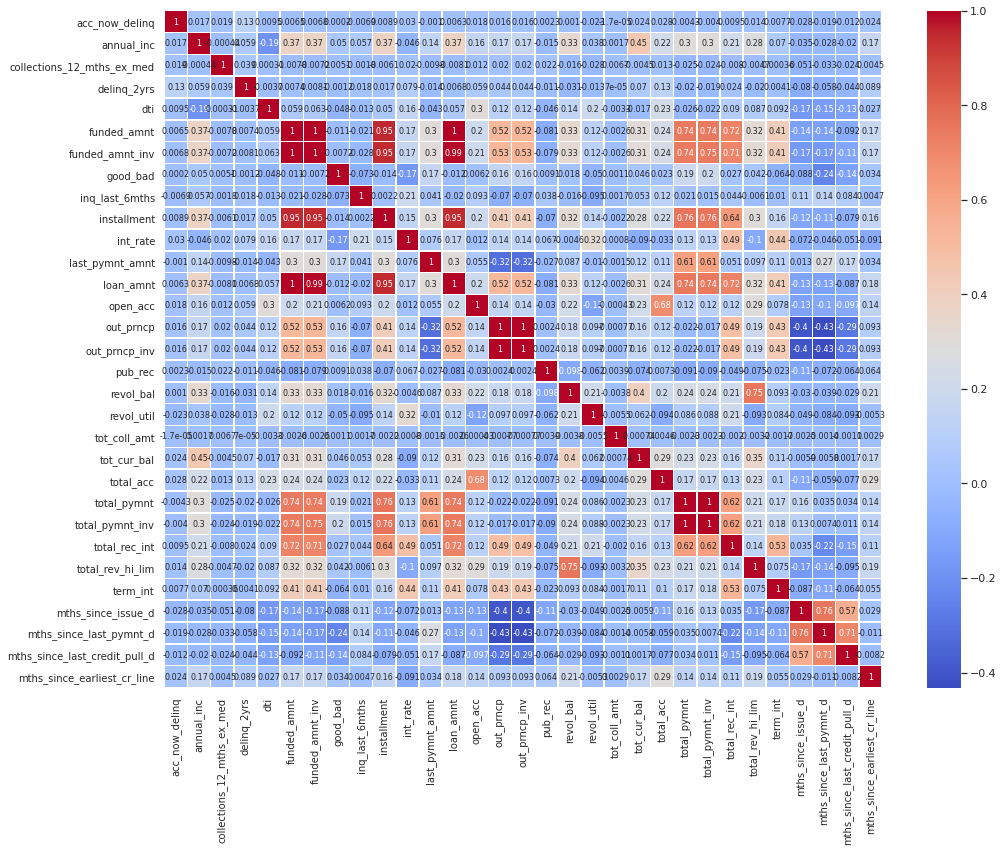

In [25]:
# correlation matrix showing correlation co-effiecients 
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = ((15,12)))
sns.heatmap(numerical_features.corr(), annot = True, fmt='.2g' ,annot_kws={'size':8}, \
                                                      linewidths = 0.5, cmap="coolwarm",)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [26]:
# droping multicollinear features 
numerical_features.drop(columns = ['loan_amnt', 'revol_bal', 'funded_amnt', 'funded_amnt_inv',\
                        'installment',  'total_pymnt_inv',  'out_prncp_inv',  'total_acc'], inplace=True)

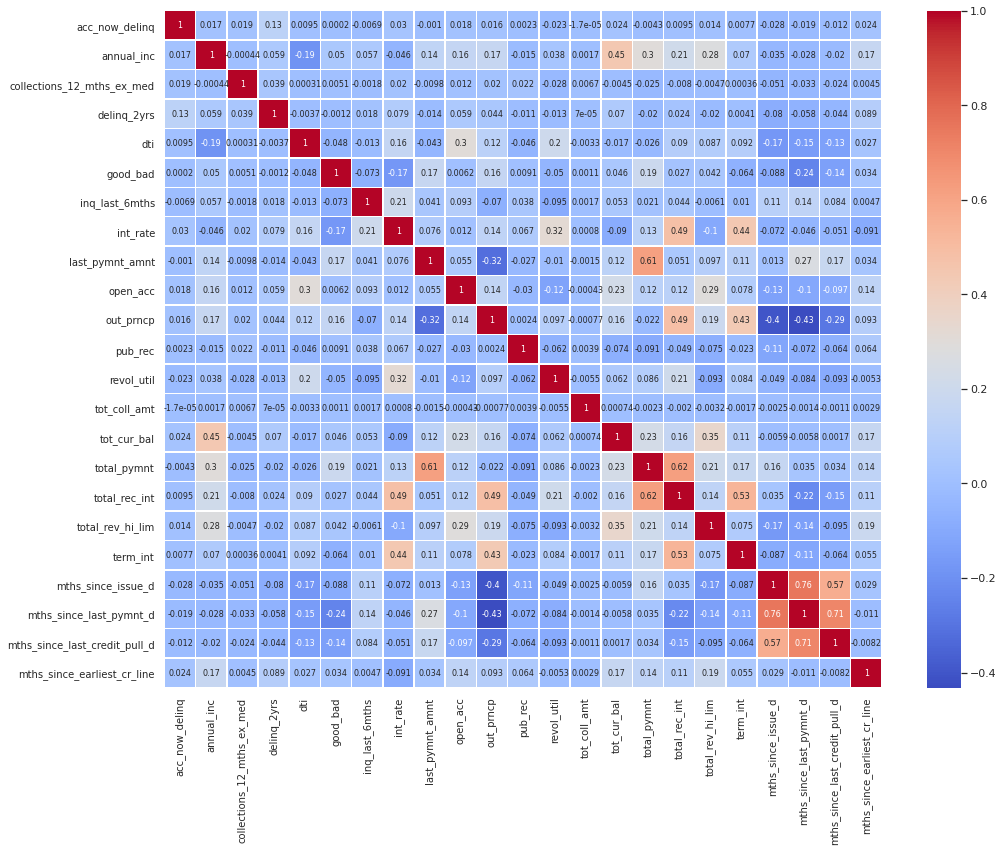

In [27]:
# correlation matrix showing correlation co-effiecients 
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = ((15,12)))
sns.heatmap(numerical_features.corr(), annot = True, fmt='.2g' ,annot_kws={'size':8}, \
                                                      linewidths = 0.5, cmap="coolwarm", )
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

#### ANOVA TEST 
<p style='teData_lgdt-align: justify;'> 
As mentioned above, In order to keep the model efficient and scalable, we try to reduce the number of independent variables contributing the model. The same as categorical features, for the numerical features ascwell, we will apply the feature selection procedure. Note that the test which we are going to apply for the numerical features is ANOVA test. Below two cells the application of the ANOVA test ande selection of survived features.</p>

In [28]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, ContinuousPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in ContinuousPredictorList:
        CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print('The {:20.20} is \t correlated with target variable and the calculated P-value is {:12.4f}'.format(predictor,AnovaResults[1] ))
            #print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            #print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            print('The {:20.20} is Not  correlated with target variable and the calculated P-value is {:12.4f}'.format(predictor,AnovaResults[1] ))
    return(SelectedPredictors)

In [29]:
# Calling the function to check which categorical variables are correlated with target
ContinuousVariables = numerical_features.columns.tolist()
FunctionAnova(inpData = Data, TargetVariable='good_bad', ContinuousPredictorList = ContinuousVariables)

##### ANOVA Results ##### 

The acc_now_delinq       is Not  correlated with target variable and the calculated P-value is       0.8930
The annual_inc           is 	 correlated with target variable and the calculated P-value is       0.0000
The collections_12_mths_ is 	 correlated with target variable and the calculated P-value is       0.0005
The delinq_2yrs          is Not  correlated with target variable and the calculated P-value is       0.4020
The dti                  is 	 correlated with target variable and the calculated P-value is       0.0000
The good_bad             is 	 correlated with target variable and the calculated P-value is       0.0000
The inq_last_6mths       is 	 correlated with target variable and the calculated P-value is       0.0000
The int_rate             is 	 correlated with target variable and the calculated P-value is       0.0000
The last_pymnt_amnt      is 	 correlated with target variable and the calculated P-value is       0.0000
The open_acc         

['annual_inc',
 'collections_12_mths_ex_med',
 'dti',
 'good_bad',
 'inq_last_6mths',
 'int_rate',
 'last_pymnt_amnt',
 'open_acc',
 'out_prncp',
 'pub_rec',
 'revol_util',
 'tot_cur_bal',
 'total_pymnt',
 'total_rec_int',
 'total_rev_hi_lim',
 'term_int',
 'mths_since_issue_d',
 'mths_since_last_pymnt_d',
 'mths_since_last_credit_pull_d',
 'mths_since_earliest_cr_line']

In [30]:
numerical_features = numerical_features[['int_rate', 'annual_inc', 'dti', 'inq_last_6mths', 'open_acc',
                                         'pub_rec', 'revol_util', 'out_prncp', 'total_pymnt','total_rec_int',
                                         'last_pymnt_amnt', 'collections_12_mths_ex_med', 'tot_cur_bal',
                                         'total_rev_hi_lim', 'good_bad', 'term_int', 'mths_since_issue_d', 
                                          'mths_since_last_pymnt_d', 'mths_since_last_credit_pull_d',
                                                                                 'mths_since_earliest_cr_line']]
numerical_features

,int_rate,annual_inc,dti,inq_last_6mths,open_acc,pub_rec,revol_util,out_prncp,total_pymnt,total_rec_int,last_pymnt_amnt,collections_12_mths_ex_med,tot_cur_bal,total_rev_hi_lim,good_bad,term_int,mths_since_issue_d,mths_since_last_pymnt_d,mths_since_last_credit_pull_d,mths_since_earliest_cr_line
0,10.65,24000.0,27.65,1.0,3.0,0.0,83.7,0.00,5861.071414,861.07,171.62,0.0,138801.713385,5000.0,1,36,117.0,80.0,68.0,440.0
1,15.27,30000.0,1.00,5.0,3.0,0.0,9.4,0.00,1008.710000,435.17,119.66,0.0,138801.713385,2500.0,0,60,117.0,101.0,96.0,269.0
2,15.96,12252.0,8.72,2.0,2.0,0.0,98.5,0.00,3003.653644,603.65,649.91,0.0,138801.713385,2400.0,1,36,117.0,87.0,68.0,238.0
3,13.49,49200.0,20.00,1.0,10.0,0.0,21.0,0.00,12226.302210,2209.33,357.48,0.0,138801.713385,10000.0,1,36,117.0,80.0,80.0,307.0
4,12.69,80000.0,17.94,0.0,15.0,0.0,53.9,766.90,3242.170000,1009.07,67.79,0.0,138801.713385,3000.0,1,60,117.0,68.0,68.0,308.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,14.47,110000.0,19.85,2.0,18.0,0.0,77.6,12574.00,10383.360000,4557.36,432.64,0.0,294998.000000,29900.0,1,60,92.0,68.0,68.0,221.0
466281,19.97,78000.0,18.45,5.0,18.0,1.0,46.3,0.00,4677.920000,2840.88,17.50,0.0,221830.000000,39400.0,0,60,92.0,81.0,68.0,291.0
466282,16.99,46000.0,25.65,2.0,18.0,0.0,51.1,14428.31,12343.980000,6072.29,514.34,0.0,73598.000000,13100.0,1,60,92.0,68.0,69.0,237.0
466283,7.90,83000.0,5.39,1.0,21.0,0.0,21.5,0.00,2126.579838,126.58,1500.68,0.0,591610.000000,53100.0,1,36,92.0,81.0,77.0,223.0


#### INFORMATION VALUE TEST
<p style='teData_lgdt-align: justify;'> 
Even we can take one step more and apply the information valuetest for those features which they survived from previous step and reduce the number of involved features even more.</p>

In [31]:
#function to calculate weight of evidence and information value

def iv_woe(data, target, bins=10, show_woe=False):
    
    #Empty Dataframe
    newDF,woeDF = pd.DataFrame(), pd.DataFrame()
    
    #Extract Column Names
    cols = data.columns
    
    #Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>10):
            binned_x = pd.qcut(data[ivars], bins,  duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})
        d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()
        d['Non-Events'] = d['N'] - d['Events']
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()
        d['WoE'] = np.log(d['% of Events']/d['% of Non-Events'])
        d['IV'] = d['WoE'] * (d['% of Events'] - d['% of Non-Events'])
        d.insert(loc=0, column='Variable', value=ivars)        
        print('Information value of {:30} is {:8.4f}'.format(ivars, round(d['IV'].sum(),6)))
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)

        #Show WOE Table
        if show_woe == True:
            print(d)
    return newDF, woeDF
iv, woe = iv_woe(numerical_features, target = 'good_bad', bins=10)

Information value of int_rate                       is   0.3222
Information value of annual_inc                     is   0.0542
Information value of dti                            is   0.0260
Information value of inq_last_6mths                 is   0.0368
Information value of open_acc                       is   0.0006
Information value of pub_rec                        is   0.0006
Information value of revol_util                     is   0.0268
Information value of out_prncp                      is   0.7635
Information value of total_pymnt                    is   0.6096
Information value of total_rec_int                  is   0.0234
Information value of last_pymnt_amnt                is   1.4657
Information value of collections_12_mths_ex_med     is   0.0006
Information value of tot_cur_bal                    is   0.0597
Information value of total_rev_hi_lim               is   0.0418
Information value of term_int                       is   0.0389
Information value of mths_since_issue_d 

In [32]:
numerical_features.drop(columns = ['open_acc', 'pub_rec', 'collections_12_mths_ex_med'], inplace = True)

numerical_features

,int_rate,annual_inc,dti,inq_last_6mths,revol_util,out_prncp,total_pymnt,total_rec_int,last_pymnt_amnt,tot_cur_bal,total_rev_hi_lim,good_bad,term_int,mths_since_issue_d,mths_since_last_pymnt_d,mths_since_last_credit_pull_d,mths_since_earliest_cr_line
0,10.65,24000.0,27.65,1.0,83.7,0.00,5861.071414,861.07,171.62,138801.713385,5000.0,1,36,117.0,80.0,68.0,440.0
1,15.27,30000.0,1.00,5.0,9.4,0.00,1008.710000,435.17,119.66,138801.713385,2500.0,0,60,117.0,101.0,96.0,269.0
2,15.96,12252.0,8.72,2.0,98.5,0.00,3003.653644,603.65,649.91,138801.713385,2400.0,1,36,117.0,87.0,68.0,238.0
3,13.49,49200.0,20.00,1.0,21.0,0.00,12226.302210,2209.33,357.48,138801.713385,10000.0,1,36,117.0,80.0,80.0,307.0
4,12.69,80000.0,17.94,0.0,53.9,766.90,3242.170000,1009.07,67.79,138801.713385,3000.0,1,60,117.0,68.0,68.0,308.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,14.47,110000.0,19.85,2.0,77.6,12574.00,10383.360000,4557.36,432.64,294998.000000,29900.0,1,60,92.0,68.0,68.0,221.0
466281,19.97,78000.0,18.45,5.0,46.3,0.00,4677.920000,2840.88,17.50,221830.000000,39400.0,0,60,92.0,81.0,68.0,291.0
466282,16.99,46000.0,25.65,2.0,51.1,14428.31,12343.980000,6072.29,514.34,73598.000000,13100.0,1,60,92.0,68.0,69.0,237.0
466283,7.90,83000.0,5.39,1.0,21.5,0.00,2126.579838,126.58,1500.68,591610.000000,53100.0,1,36,92.0,81.0,77.0,223.0


## SURVIVED FEATURES IN ONE SHOT

In [33]:
Model = pd.concat([categorical_features_lgd, numerical_features, ], axis = 1)
Model

,addr_state,grade,home_ownership,initial_list_status,purpose,pymnt_plan,verification_status,int_rate,annual_inc,dti,inq_last_6mths,revol_util,out_prncp,total_pymnt,total_rec_int,last_pymnt_amnt,tot_cur_bal,total_rev_hi_lim,good_bad,term_int,mths_since_issue_d,mths_since_last_pymnt_d,mths_since_last_credit_pull_d,mths_since_earliest_cr_line
0,AZ,B,RENT,f,credit_card,n,Verified,10.65,24000.0,27.65,1.0,83.7,0.00,5861.071414,861.07,171.62,138801.713385,5000.0,1,36,117.0,80.0,68.0,440.0
1,GA,C,RENT,f,car,n,Source Verified,15.27,30000.0,1.00,5.0,9.4,0.00,1008.710000,435.17,119.66,138801.713385,2500.0,0,60,117.0,101.0,96.0,269.0
2,IL,C,RENT,f,small_business,n,Not Verified,15.96,12252.0,8.72,2.0,98.5,0.00,3003.653644,603.65,649.91,138801.713385,2400.0,1,36,117.0,87.0,68.0,238.0
3,CA,C,RENT,f,other,n,Source Verified,13.49,49200.0,20.00,1.0,21.0,0.00,12226.302210,2209.33,357.48,138801.713385,10000.0,1,36,117.0,80.0,80.0,307.0
4,OR,B,RENT,f,other,n,Source Verified,12.69,80000.0,17.94,0.0,53.9,766.90,3242.170000,1009.07,67.79,138801.713385,3000.0,1,60,117.0,68.0,68.0,308.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,TX,C,MORTGAGE,w,debt_consolidation,n,Source Verified,14.47,110000.0,19.85,2.0,77.6,12574.00,10383.360000,4557.36,432.64,294998.000000,29900.0,1,60,92.0,68.0,68.0,221.0
466281,TN,D,MORTGAGE,f,debt_consolidation,n,Verified,19.97,78000.0,18.45,5.0,46.3,0.00,4677.920000,2840.88,17.50,221830.000000,39400.0,0,60,92.0,81.0,68.0,291.0
466282,OH,D,MORTGAGE,f,debt_consolidation,n,Verified,16.99,46000.0,25.65,2.0,51.1,14428.31,12343.980000,6072.29,514.34,73598.000000,13100.0,1,60,92.0,68.0,69.0,237.0
466283,CA,A,OWN,w,credit_card,n,Verified,7.90,83000.0,5.39,1.0,21.5,0.00,2126.579838,126.58,1500.68,591610.000000,53100.0,1,36,92.0,81.0,77.0,223.0


#  PD MODELLING

## METHOD 1
<p style='teData_lgdt-align: justify;'> 
since the dataset is ready to apply the machine learning methods. In the following cells, we will apply the "Logistic regression" method to categorize the good and bad borrowers. Generally, there is a couple of methods to do this and we will try both methods separately. In the first method, based on fine classing techniques, we will try to convert the numerical features into some categories (Intervals). Then, base on the weight of evidence measure we will recombine some of them. One note that, that the weight of evidence usually has to be uniformly decreasing or increasing.</p>

<p style='teData_lgdt-align: justify;'> 
The below cells indicate the coarse classing procedure. </p>

In [34]:
#function to calculate weight of evidence and information value

def iv_woe(data, target, bins=10, show_woe=False):
    
    #Empty Dataframe
    newDF,woeDF = pd.DataFrame(), pd.DataFrame()
    
    #Extract Column Names
    cols = data.columns
    
    #Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>10):
            binned_x = pd.qcut(data[ivars], bins,  duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})
        d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()
        d['Non-Events'] = d['N'] - d['Events']
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()
        d['WoE'] = np.log(d['% of Events']/d['% of Non-Events'])
        d['IV'] = d['WoE'] * (d['% of Events'] - d['% of Non-Events'])
        d.insert(loc=0, column='Variable', value=ivars)        
        print('Information value of {:30} is {:8.4f}'.format(ivars, round(d['IV'].sum(),6)))
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)

        #Show WOE Table
        if show_woe == True:
            print(d)
    return newDF, woeDF
#iv, woe = iv_woe(numerical_features, target = 'good_bad', bins=10)

In [35]:
# function to calculate woe of categorical features

def woe_categorical(df, cat_feature, good_bad_df, label_angel):
    fig , ax1 = plt.subplots(nrows = 1, ncols = 1, figsize = ((15,10)))
    ax2 = ax1.twinx()
    #print([100]*len(df[cat_feature].unique().tolist()))
    #print(df[cat_feature].unique().tolist())
    sns.barplot(ax = ax1, x = df[cat_feature].unique().tolist(), y = [100]*len(df[cat_feature].unique().tolist()),\
                               color = 'blue', alpha = 0.3)
    sns.barplot(ax = ax1, x =  df[cat_feature].unique().tolist(),\
                y = (1- df.groupby(cat_feature)["good_bad"].sum()/df.groupby(cat_feature)["good_bad"].count())*100,\
                color = 'red', alpha = 0.3)
     
    df = pd.concat([df[cat_feature], good_bad_df], axis=1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    
    sns.lineplot(ax = ax2, x = np.array(df.iloc[:, 0].apply(str)), y = df['WoE'], markers = 'o', \
                linewidth = 3, markersize = 14 )
    locs, labels = plt.xticks()
    plt.setp(labels, rotation=45)
    return df

In [36]:
# function to callculate woe for continous variables
def woe_continous(df, cat_feature, good_bad_df, label_angel):
    fig , ax1 = plt.subplots(nrows = 1, ncols = 1, figsize = ((15,10)))
    ax2 = ax1.twinx()
    #print([100]*len(df[cat_feature].unique().tolist()))
    #print(df[cat_feature].unique().tolist())
    sns.barplot(ax = ax1, x = df[cat_feature].unique().tolist(), y = [100]*len(df[cat_feature].unique().tolist()),\
                               color = 'blue', alpha = 0.3)
    sns.barplot(ax = ax1, x =  df[cat_feature].unique().tolist(),\
                y = (1- df.groupby(cat_feature)["good_bad"].sum()/df.groupby(cat_feature)["good_bad"].count())*100,\
                color = 'red', alpha = 0.3)

    
    df = pd.concat([df[cat_feature], good_bad_df], axis=1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
#     df = df.sort_values(['WoE'])
#     df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
#    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
#    df['IV'] = df['IV'].sum()
    
    sns.lineplot(ax = ax2, x = np.array(df.iloc[:, 0].apply(str)), y = df['WoE'], markers = 'o', \
                linewidth = 3, markersize = 14 )
    #plt.xticks(rotation = label_angel)
    locs, labels = plt.xticks()
    plt.setp(labels, rotation=45)
    return df

In [37]:
#seperating data into target and features
X = Model
y = Model['good_bad']

### CATEGORICAL FEATURES BINING

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE
0,G,3322,0.721854,0.007124,2398.0,924.0,0.005774,0.018129,-1.144166,NaN,NaN
1,F,13229,0.758712,0.028371,10037.0,3192.0,0.024167,0.062628,-0.952214,0.036858,0.191952
2,E,35757,0.805241,0.076685,28793.0,6964.0,0.069328,0.136635,-0.678466,0.046529,0.273748
3,D,76888,0.845906,0.164895,65040.0,11848.0,0.156603,0.232460,-0.395001,0.040665,0.283465
4,C,125293,0.885197,0.268705,110909.0,14384.0,0.267047,0.282216,-0.055251,0.039291,0.339750
5,B,136929,0.921426,0.293659,126170.0,10759.0,0.303792,0.211093,0.364043,0.036229,0.419294
6,A,74867,0.961305,0.160561,71970.0,2897.0,0.173289,0.056840,1.114730,0.039878,0.750686


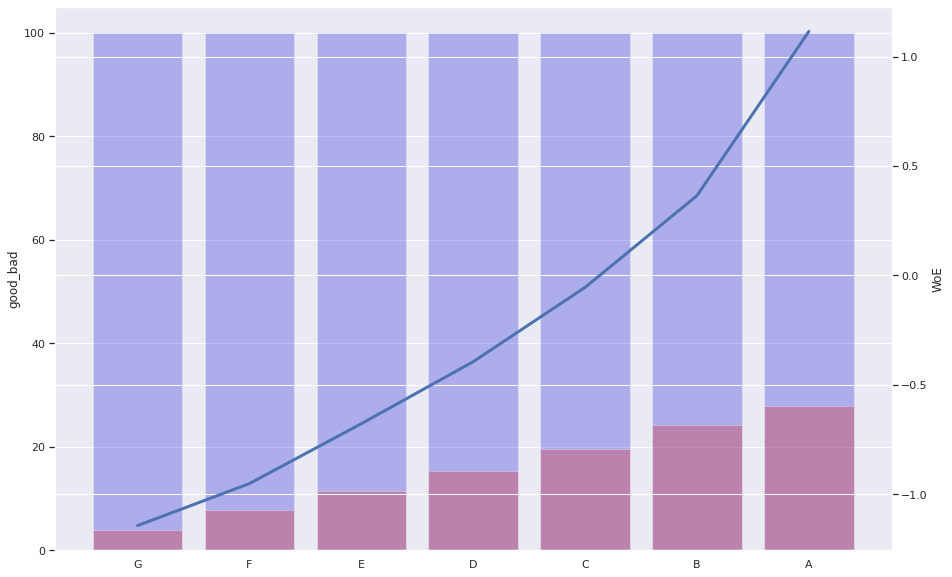

In [38]:
df_grade = woe_categorical(X, 'grade', y , label_angel = 90)
df_grade

In [39]:
X_New = X['grade']

,home_ownership,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE
0,OTHER,182,0.791209,0.000390,144.0,38.0,0.000347,0.000746,-0.765617,NaN,NaN
1,NONE,50,0.840000,0.000107,42.0,8.0,0.000101,0.000157,-0.439616,0.048791,0.326001
2,RENT,188473,0.873897,0.404201,164706.0,23767.0,0.396579,0.466312,-0.161980,0.033897,0.277636
3,OWN,41704,0.891737,0.089439,37189.0,4515.0,0.089544,0.088585,0.010764,0.017840,0.172744
4,MORTGAGE,235875,0.904017,0.505860,213235.0,22640.0,0.513427,0.444200,0.144832,0.012280,0.134069
5,ANY,1,1.000000,0.000002,1.0,0.0,0.000002,0.000000,inf,0.095983,inf


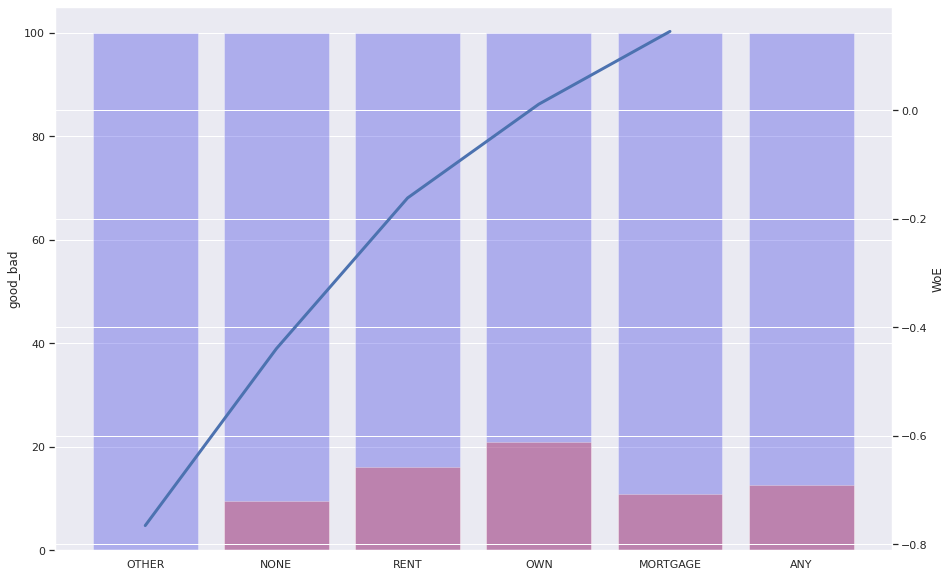

In [40]:
#analyzing home ownership variable
df_home = woe_categorical(X, 'home_ownership', y, label_angel = 90)
df_home

In [41]:
#OTHER, NONE and ANY have very few observations and should be combined with the category with high risk of default
#that is RENT
X['home_ownership'] = X['home_ownership'].replace({'OTHER' : 'RENT', 'NONE' : 'RENT',\
                                                           'ANY' : 'RENT'}, regex=True)
X_New = pd.concat([X_New, X['home_ownership']], axis = 1)
X_New

,grade,home_ownership
0,B,RENT
1,C,RENT
2,C,RENT
3,C,RENT
4,B,RENT
...,...,...
466280,C,MORTGAGE
466281,D,MORTGAGE
466282,D,MORTGAGE
466283,A,OWN


,verification_status,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE
0,Verified,168055,0.872631,0.360413,146650.0,21405.0,0.353104,0.419969,-0.173420,NaN,NaN
1,Source Verified,149993,0.895882,0.321677,134376.0,15617.0,0.323550,0.306408,0.054438,0.023251,0.227858
2,Not Verified,148237,0.905921,0.317911,134291.0,13946.0,0.323346,0.273623,0.166972,0.010039,0.112535


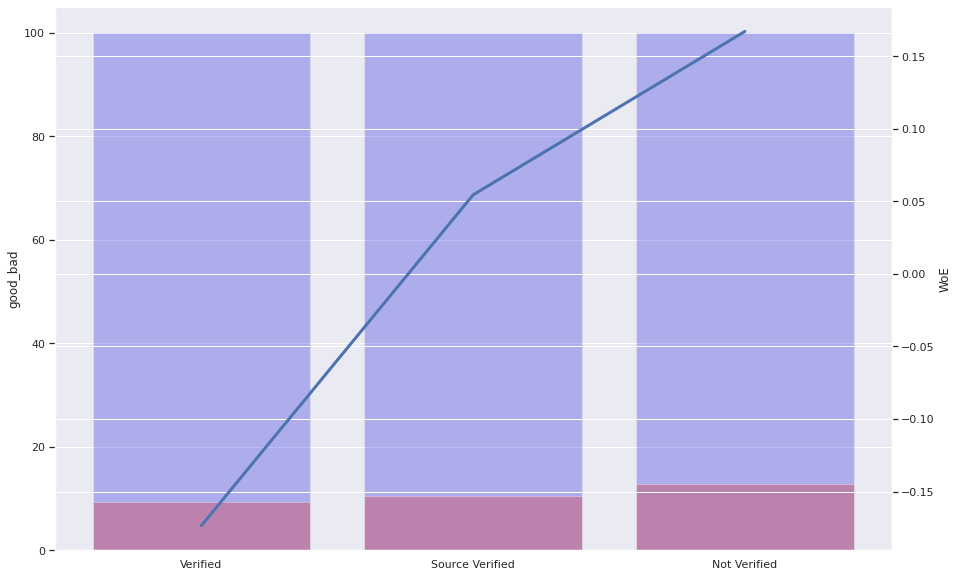

In [42]:
#Analyzing verification status
veri_df = woe_categorical(X, 'verification_status', y, 90)
veri_df

In [43]:
X_New = pd.concat([X_New, X['verification_status']], axis = 1)
X_New

,grade,home_ownership,verification_status
0,B,RENT,Verified
1,C,RENT,Source Verified
2,C,RENT,Not Verified
3,C,RENT,Source Verified
4,B,RENT,Source Verified
...,...,...,...
466280,C,MORTGAGE,Source Verified
466281,D,MORTGAGE,Verified
466282,D,MORTGAGE,Verified
466283,A,OWN,Verified


,pymnt_plan,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE
0,y,9,0.555556,0.000019,5.0,4.0,0.000012,0.000078,-1.874701,NaN,NaN
1,n,466276,0.890700,0.999981,415312.0,50964.0,0.999988,0.999922,0.000066,0.335144,1.874767


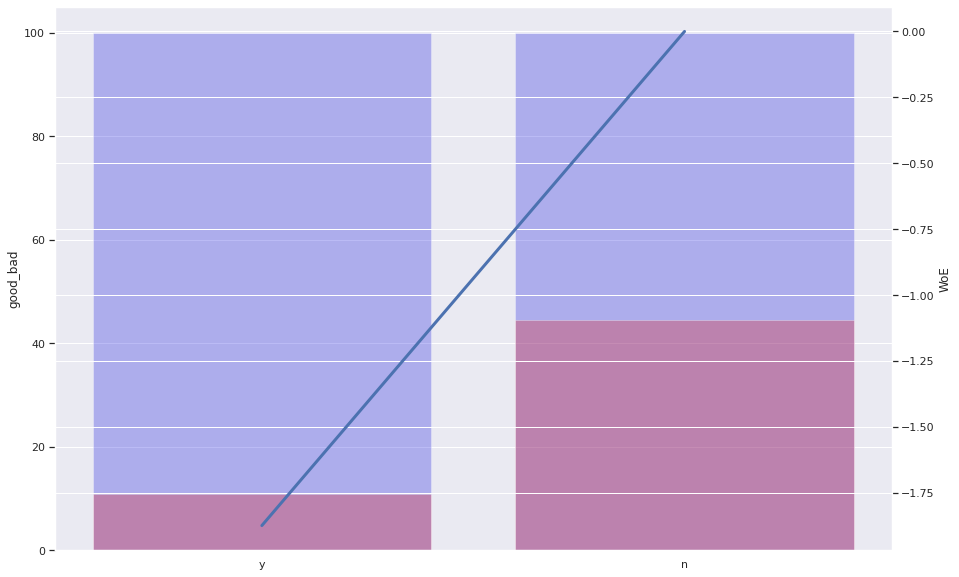

In [44]:
#analyzing purpose  variable
pur_df = woe_categorical(X, 'pymnt_plan', y, 90)
pur_df

In [45]:
X_New = pd.concat([X_New, X['pymnt_plan']], axis = 1)
X_New

,grade,home_ownership,verification_status,pymnt_plan
0,B,RENT,Verified,n
1,C,RENT,Source Verified,n
2,C,RENT,Not Verified,n
3,C,RENT,Source Verified,n
4,B,RENT,Source Verified,n
...,...,...,...,...
466280,C,MORTGAGE,Source Verified,n
466281,D,MORTGAGE,Verified,n
466282,D,MORTGAGE,Verified,n
466283,A,OWN,Verified,n


,purpose,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE
0,small_business,7013,0.784258,0.015040,5500.0,1513.0,0.013243,0.029685,-0.807190,NaN,NaN
1,educational,422,0.791469,0.000905,334.0,88.0,0.000804,0.001727,-0.764040,0.007211,0.043151
2,renewable_energy,351,0.846154,0.000753,297.0,54.0,0.000715,0.001059,-0.393096,0.054685,0.370944
3,moving,2994,0.847361,0.006421,2537.0,457.0,0.006109,0.008966,-0.383790,0.001208,0.009306
4,house,2269,0.859850,0.004866,1951.0,318.0,0.004698,0.006239,-0.283798,0.012489,0.099992
5,other,23690,0.862009,0.050806,20421.0,3269.0,0.049170,0.064138,-0.265764,0.002159,0.018034
6,medical,4602,0.866145,0.009870,3986.0,616.0,0.009597,0.012086,-0.230548,0.004136,0.035217
7,wedding,2343,0.878361,0.005025,2058.0,285.0,0.004955,0.005592,-0.120843,0.012216,0.109704
8,vacation,2487,0.882187,0.005334,2194.0,293.0,0.005283,0.005749,-0.084535,0.003826,0.036308
9,debt_consolidation,274195,0.886690,0.588042,243126.0,31069.0,0.585399,0.609579,-0.040475,0.004503,0.044060


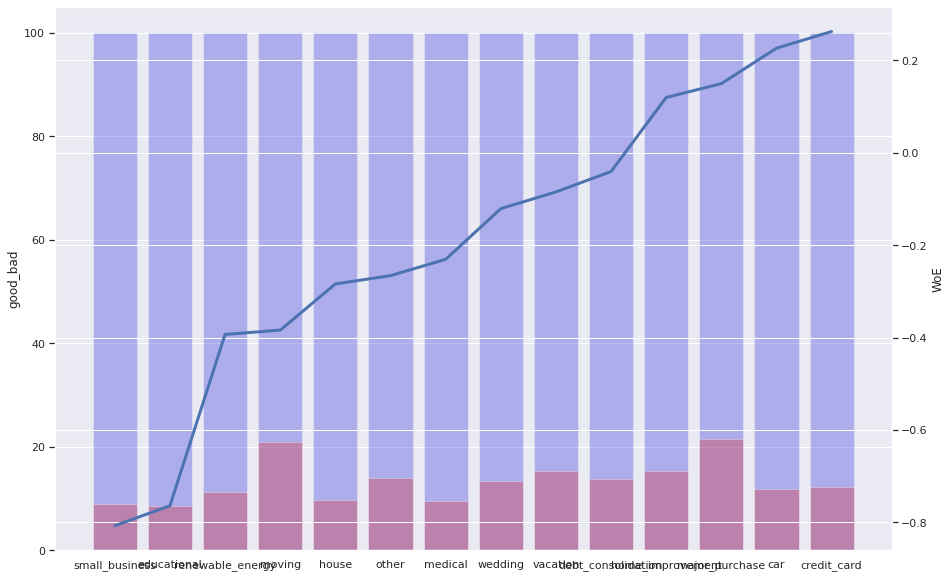

In [46]:
#analyzing purpose  variable
pur_df = woe_categorical(X, 'purpose', y, 90)
pur_df

In [47]:
X['purpose'] = X['purpose'].replace({'educational' : 'moving', 'renewable_energy' : 'moving'\
                                                                                             }, regex=True)
X['purpose'] = X['purpose'].replace({'other' : 'medical', 'house' : 'medical'\
                                                                                             }, regex=True)

X['purpose'] = X['purpose'].replace({'weeding' : 'vacation'                                  }, regex=True)

X['purpose'] = X['purpose'].replace({'home_improvement' : 'major purchase'                   }, regex=True)

X_New = pd.concat([X_New, X['purpose']], axis = 1)
X_New

,grade,home_ownership,verification_status,pymnt_plan,purpose
0,B,RENT,Verified,n,credit_card
1,C,RENT,Source Verified,n,car
2,C,RENT,Not Verified,n,small_business
3,C,RENT,Source Verified,n,medical
4,B,RENT,Source Verified,n,medical
...,...,...,...,...,...
466280,C,MORTGAGE,Source Verified,n,debt_consolidation
466281,D,MORTGAGE,Verified,n,debt_consolidation
466282,D,MORTGAGE,Verified,n,debt_consolidation
466283,A,OWN,Verified,n,credit_card


,addr_state,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE
0,NE,14,0.428571,0.000030,6.0,8.0,0.000014,0.000157,-2.385526,NaN,NaN
1,IA,14,0.785714,0.000030,11.0,3.0,0.000026,0.000059,-0.798561,3.571429e-01,1.586965
2,NV,6519,0.862862,0.013981,5625.0,894.0,0.013544,0.017540,-0.258574,7.714812e-02,0.539987
3,HI,2487,0.873743,0.005334,2173.0,314.0,0.005232,0.006161,-0.163373,1.088106e-02,0.095201
4,FL,31637,0.874640,0.067849,27671.0,3966.0,0.066626,0.077814,-0.155217,8.969866e-04,0.008156
5,AL,5853,0.876474,0.012552,5130.0,723.0,0.012352,0.014185,-0.138392,1.833151e-03,0.016825
6,NY,40242,0.883182,0.086303,35541.0,4701.0,0.085576,0.092234,-0.074932,6.708147e-03,0.063460
7,LA,5489,0.883403,0.011772,4849.0,640.0,0.011675,0.012557,-0.072784,2.214196e-04,0.002148
8,NM,2588,0.884467,0.005550,2289.0,299.0,0.005511,0.005866,-0.062417,1.063600e-03,0.010367
9,OK,4117,0.884625,0.008829,3642.0,475.0,0.008769,0.009320,-0.060871,1.579570e-04,0.001547


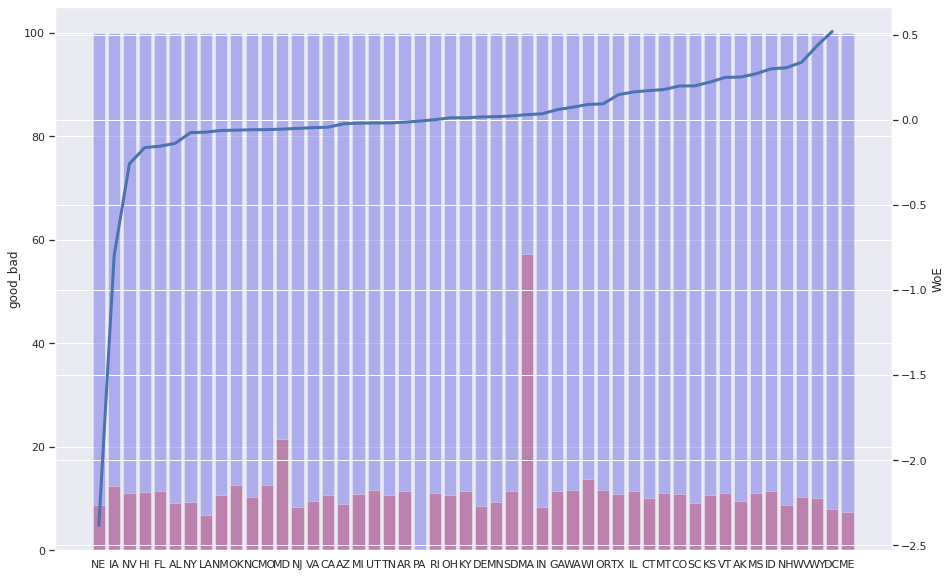

In [48]:
# analyzing by addr_state
addr_df = woe_categorical(X, 'addr_state', y, 90)
addr_df

In [49]:
X['addr_state'] = X['addr_state'].replace({'NE' : 'AL', 'IA' : 'AL', 'NV': 'AL', 'FL': 'AL'\
                                                                                             }, regex=True)

X['addr_state'] = X['addr_state'].replace({'LA' : 'VA', 'NM' : 'VA', 'OK': 'VA', 'NC': 'VA',\
                                           'MO':'VA', 'MD': 'VA', 'NJ':'VA'                  }, regex=True)

X['addr_state'] = X['addr_state'].replace({'AZ' : 'PA', 'MI' : 'PA', 'UT': 'PA', 'TN': 'PA',\
                                           'AR':'PA'                                         }, regex=True)

X['addr_state'] = X['addr_state'].replace({'RI' : 'IN', 'OH' : 'IN', 'KY': 'IN', 'DE': 'IN',\
                                           'MN':'IN', 'SD':'IN', 'MA':'IN'                   }, regex=True)

X['addr_state'] = X['addr_state'].replace({'GA' : 'WA'                                       }, regex=True)

X['addr_state'] = X['addr_state'].replace({'WI' : 'OR'                                       }, regex=True)

X['addr_state'] = X['addr_state'].replace({'IL' : 'MT', 'CT' : 'MT'                          }, regex=True)

X['addr_state'] = X['addr_state'].replace({'CO' : 'SC'                                       }, regex=True)

X['addr_state'] = X['addr_state'].replace({'KS' : 'MS', 'VT' : 'MS', 'AK' : 'MS'             }, regex=True)

X['addr_state'] = X['addr_state'].replace({'NH' : 'DC', 'WV' : 'DC', 'WY' : 'DC'             }, regex=True)


X_New = pd.concat([X_New, X['addr_state']], axis = 1)
X_New

,grade,home_ownership,verification_status,pymnt_plan,purpose,addr_state
0,B,RENT,Verified,n,credit_card,PA
1,C,RENT,Source Verified,n,car,WA
2,C,RENT,Not Verified,n,small_business,MT
3,C,RENT,Source Verified,n,medical,CA
4,B,RENT,Source Verified,n,medical,OR
...,...,...,...,...,...,...
466280,C,MORTGAGE,Source Verified,n,debt_consolidation,TX
466281,D,MORTGAGE,Verified,n,debt_consolidation,PA
466282,D,MORTGAGE,Verified,n,debt_consolidation,IN
466283,A,OWN,Verified,n,credit_card,CA


,initial_list_status,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE
0,f,303005,0.879692,0.649828,266551.0,36454.0,0.641801,0.715233,-0.108330,NaN,NaN
1,w,163280,0.911110,0.350172,148766.0,14514.0,0.358199,0.284767,0.229417,0.031418,0.337746


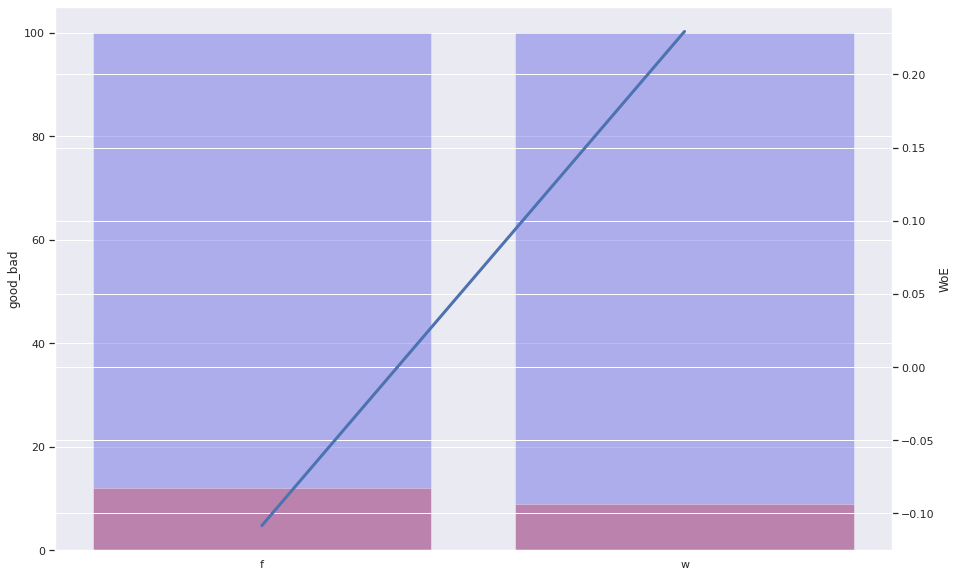

In [50]:
# analyzing initial_list_status 
init_list_df = woe_categorical( X, 'initial_list_status', y , 90)
init_list_df

In [51]:
X_New = pd.concat([X_New, X['initial_list_status']], axis = 1)
X_New

,grade,home_ownership,verification_status,pymnt_plan,purpose,addr_state,initial_list_status
0,B,RENT,Verified,n,credit_card,PA,f
1,C,RENT,Source Verified,n,car,WA,f
2,C,RENT,Not Verified,n,small_business,MT,f
3,C,RENT,Source Verified,n,medical,CA,f
4,B,RENT,Source Verified,n,medical,OR,f
...,...,...,...,...,...,...,...
466280,C,MORTGAGE,Source Verified,n,debt_consolidation,TX,w
466281,D,MORTGAGE,Verified,n,debt_consolidation,PA,f
466282,D,MORTGAGE,Verified,n,debt_consolidation,IN,f
466283,A,OWN,Verified,n,credit_card,CA,w


### CATEGORICAL FEATURS BACKUP
<p style='teData_lgdt-align: justify;'>
So far, based on coarse classsing method, we prepared the categorical sub-ddataset to be used in the PD modelling. In the following, we will apply Logistic regression into survived features with two different methods. In the first method, we will convert the numerical features into categories and then apply loggistic reggresssion to buld PD model. In the second method, we will convert the categorical features into numeric one and finally will apply the logistic regression. </p>

<p style='teData_lgdt-align: justify;'>
So far, we have prepared the categorical features ready to be used in the first method. However, it will be instructive to see how the categorical features can be converted into numerical values to be used in the second mothod. </p>

<p style='teData_lgdt-align: justify;'>
As mentioned, in order to convert the categorical features into numerical one, we have to perform some operations which are listed as:<br>
   1- Converting each Ordinal Categorical columns to numeric<br>
   2- Converting Binary nominal Categorical columns to numeric using 1/0 mapping<br>
   3- Converting all other nominal categorical columns to numeric using pd.get_dummies()<br>
   4- Data Transformation (Optional): Standardization/Normalization/log/sqrt. Important if you are using distance       based algorithms like KNN, or Neural Networks<br>
   
<p style='teData_lgdt-align: justify;'>
The below cell show the convertion of the categorical features into numerical one. It worth mentioning that we will keep the converted categorical features only to be used in the second method.</p> 

In [52]:
X_New_dummy = X_New

categorical_features_2 = pd.DataFrame()
# Binary features 
categorical_features_2['pymnt_plan'] = X_New['pymnt_plan'].replace({'n':0, 'y':1})
categorical_features_2['initial_list_status'] = X_New['initial_list_status'].replace({'f':0, 'w':1})

# Ordinal features 
categorical_features_2['grade'] = X_New['grade'].replace({'B':2, 'C':3, 'A':1, 'E':5, 'F':6, 'D':4, 'G':7})

# Nominal features

# We create dummy variables from all 8 original independent variables, and save them into a list.
# Note that we are using a particular naming convention for all variables: original variable name, colon, category name.
Dummy = pd.concat([pd.get_dummies(X_New['home_ownership'     ], prefix = 'home_ownership', prefix_sep = ':'),
               pd.get_dummies(X_New['verification_status'], prefix = 'verification_status', prefix_sep = ':'),
               pd.get_dummies(X_New['purpose'            ], prefix = 'purpose'       , prefix_sep = ':'),
               pd.get_dummies(X_New['addr_state'         ], prefix = 'addr_state'    , prefix_sep = ':')], axis = 1)

categorical_features_2 = pd.concat([categorical_features_2, Dummy], axis = 1)
categorical_features_2

,pymnt_plan,initial_list_status,grade,home_ownership:MORTGAGE,home_ownership:OWN,home_ownership:RENT,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:major purchase,purpose:major_purchase,purpose:medical,purpose:moving,purpose:small_business,purpose:vacation,purpose:wedding,addr_state:AL,addr_state:CA,addr_state:DC,addr_state:HI,addr_state:ID,addr_state:IN,addr_state:ME,addr_state:MS,addr_state:MT,addr_state:NY,addr_state:OR,addr_state:PA,addr_state:SC,addr_state:TX,addr_state:VA,addr_state:WA
0,0,0,2,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,3,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,3,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,3,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,2,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,0,1,3,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
466281,0,0,4,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
466282,0,0,4,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
466283,0,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [53]:
# We create dummy variables from all 8 original independent variables, and save them into a list.
# Note that we are using a particular naming convention for all variables: original variable name, colon, category name.
X_Cat_Dummy = [pd.get_dummies(X_New['grade'              ], prefix = 'grade'         , prefix_sep = ':'),
               pd.get_dummies(X_New['home_ownership'     ], prefix = 'home_ownership', prefix_sep = ':'),
               pd.get_dummies(X_New['verification_status'], prefix = 'verification_status', prefix_sep = ':'),
               pd.get_dummies(X_New['purpose'            ], prefix = 'purpose'       , prefix_sep = ':'),
               pd.get_dummies(X_New['addr_state'         ], prefix = 'addr_state'    , prefix_sep = ':'),
               pd.get_dummies(X_New['initial_list_status'], prefix = 'initial_list_status', prefix_sep = ':'),
               pd.get_dummies(X_New['pymnt_plan'], prefix = 'pymnt_plan', prefix_sep = ':')]

X_Cat_Dummy = pd.concat(X_Cat_Dummy, axis = 1)
X_Cat_Dummy

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:MORTGAGE,home_ownership:OWN,home_ownership:RENT,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:major purchase,purpose:major_purchase,purpose:medical,purpose:moving,purpose:small_business,purpose:vacation,purpose:wedding,addr_state:AL,addr_state:CA,addr_state:DC,addr_state:HI,addr_state:ID,addr_state:IN,addr_state:ME,addr_state:MS,addr_state:MT,addr_state:NY,addr_state:OR,addr_state:PA,addr_state:SC,addr_state:TX,addr_state:VA,addr_state:WA,initial_list_status:f,initial_list_status:w,pymnt_plan:n,pymnt_plan:y
0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0
2,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
3,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
4,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0
466281,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
466282,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
466283,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0


### NUMERICAL FEATURES BINING

In [54]:
#mths_since_issue_d_factor
def continues_dummy(X_New,X, feaxture, bins):
    saffix = list('ABCDEFGHIJKLMNOPQRSTUVWXYZ')
    for i in range(len(bins)-1):
        #print(str(feaxture + ":" + str(saffix[i])))
        #print(bins[i])
        new_feature = str(feaxture + ":" + str(saffix[i]))
        X_New[new_feature] =  np.where((X[feaxture] > bins[i]) & (X[feaxture]<= bins[i+1]), 1,0)       
    return X_New

In [55]:
#mths_since_issue_d_factor
def coarse_classer(X, feaxture, bins):
    for i in range(len(bins)-1):
        X[feaxture] =  np.where((X[feaxture] > bins[i]) & (X[feaxture]<= bins[i+1]), 1,0)       
    return X[feaxture]

,int_rate_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE
0,"(5.419, 7.9]",53473,0.965740,0.114679,51641.0,1832.0,0.124341,0.035944,1.241064,NaN,NaN
1,"(7.9, 9.91]",39944,0.950230,0.085664,37956.0,1988.0,0.091390,0.039005,0.851454,0.015509,0.389609
2,"(9.91, 11.49]",46789,0.928423,0.100344,43440.0,3349.0,0.104595,0.065708,0.464875,0.021807,0.386580
3,"(11.49, 12.49]",47073,0.921059,0.100953,43357.0,3716.0,0.104395,0.072908,0.358976,0.007365,0.105899
4,"(12.49, 13.66]",47227,0.904080,0.101284,42697.0,4530.0,0.102806,0.088879,0.145563,0.016978,0.213414
5,"(13.66, 14.49]",45670,0.889621,0.097944,40629.0,5041.0,0.097826,0.098905,-0.010966,0.014459,0.156529
6,"(14.49, 15.8]",49407,0.876779,0.105959,43319.0,6088.0,0.104303,0.119447,-0.135572,0.012843,0.124606
7,"(15.8, 17.57]",50361,0.854014,0.108005,43009.0,7352.0,0.103557,0.144247,-0.331407,0.022765,0.195835
8,"(17.57, 19.52]",41159,0.822445,0.088270,33851.0,7308.0,0.081506,0.143384,-0.564845,0.031569,0.233438
9,"(19.52, 26.06]",45182,0.783896,0.096898,35418.0,9764.0,0.085279,0.191571,-0.809326,0.038548,0.244481


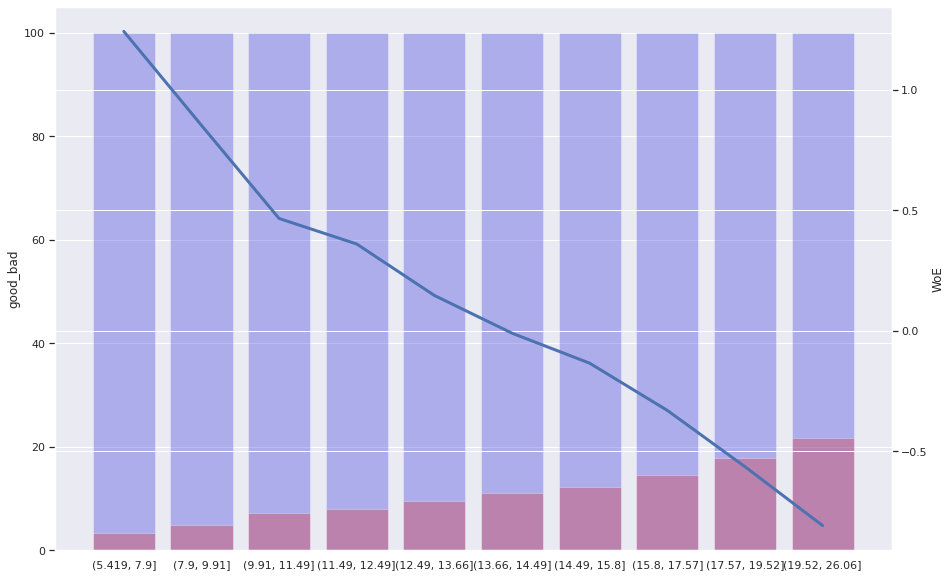

In [56]:
# fine classing by creating  a new variable
X['int_rate_factor'], bins_int_rate = pd.qcut(X['int_rate'],retbins=True ,\
                                              q = [0, .1, .2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

int_rate_df = woe_continous(X, 'int_rate_factor', y, 90)
int_rate_df

In [57]:
X_New = continues_dummy(X_Cat_Dummy, X, 'int_rate',bins_int_rate)
X_New

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:MORTGAGE,home_ownership:OWN,home_ownership:RENT,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:major purchase,purpose:major_purchase,purpose:medical,purpose:moving,purpose:small_business,purpose:vacation,purpose:wedding,addr_state:AL,addr_state:CA,addr_state:DC,addr_state:HI,addr_state:ID,addr_state:IN,addr_state:ME,addr_state:MS,addr_state:MT,addr_state:NY,addr_state:OR,addr_state:PA,addr_state:SC,addr_state:TX,addr_state:VA,addr_state:WA,initial_list_status:f,initial_list_status:w,pymnt_plan:n,pymnt_plan:y,int_rate:A,int_rate:B,int_rate:C,int_rate:D,int_rate:E,int_rate:F,int_rate:G,int_rate:H,int_rate:I,int_rate:J
0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0
2,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0
3,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0
466281,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1
466282,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0
466283,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0


,annual_inc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE
0,"(1895.999, 34000.0]",48558,0.854010,0.104138,41469.0,7089.0,0.099849,0.139087,-0.331442,NaN,NaN
1,"(34000.0, 41600.0]",44926,0.863865,0.096349,38810.0,6116.0,0.093447,0.119997,-0.250074,0.009855,0.081368
2,"(41600.0, 49000.0]",46940,0.873392,0.100668,40997.0,5943.0,0.098713,0.116603,-0.166559,0.009527,0.083515
3,"(49000.0, 55000.0]",49333,0.882898,0.105800,43556.0,5777.0,0.104874,0.113346,-0.077681,0.009506,0.088878
4,"(55000.0, 63000.0]",45835,0.883822,0.098298,40510.0,5325.0,0.097540,0.104477,-0.068708,0.000925,0.008973
5,"(63000.0, 71000.0]",44813,0.893959,0.096106,40061.0,4752.0,0.096459,0.093235,0.033994,0.010137,0.102702
6,"(71000.0, 81000.0]",46564,0.901469,0.099862,41976.0,4588.0,0.101070,0.090017,0.115810,0.007510,0.081816
7,"(81000.0, 96000.0]",47859,0.911406,0.102639,43619.0,4240.0,0.105026,0.083189,0.233085,0.009937,0.117276
8,"(96000.0, 120000.0]",46812,0.917713,0.100394,42960.0,3852.0,0.103439,0.075577,0.313833,0.006307,0.080747
9,"(120000.0, 7500000.0]",44645,0.926397,0.095746,41359.0,3286.0,0.099584,0.064472,0.434775,0.008684,0.120942


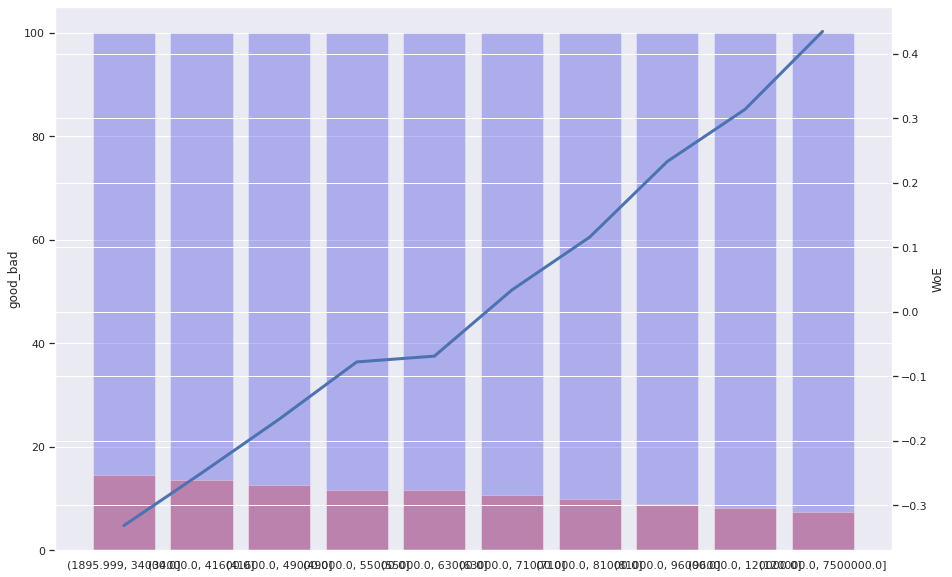

In [58]:
# fine classing by creating  a new variable
X['annual_inc_factor'], bins_annual_inc = pd.qcut(X['annual_inc'],retbins=True , q =  [0, .1, .2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

annual_inc_df = woe_continous(X, 'annual_inc_factor', y, 90)
annual_inc_df

In [59]:
X_New = continues_dummy(X_New, X, 'annual_inc',bins_annual_inc)
X_New

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:MORTGAGE,home_ownership:OWN,home_ownership:RENT,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:major purchase,purpose:major_purchase,purpose:medical,purpose:moving,purpose:small_business,purpose:vacation,purpose:wedding,addr_state:AL,addr_state:CA,addr_state:DC,addr_state:HI,addr_state:ID,addr_state:IN,addr_state:ME,addr_state:MS,addr_state:MT,addr_state:NY,addr_state:OR,addr_state:PA,addr_state:SC,addr_state:TX,addr_state:VA,addr_state:WA,initial_list_status:f,initial_list_status:w,pymnt_plan:n,pymnt_plan:y,int_rate:A,int_rate:B,int_rate:C,int_rate:D,int_rate:E,int_rate:F,int_rate:G,int_rate:H,int_rate:I,int_rate:J,annual_inc:A,annual_inc:B,annual_inc:C,annual_inc:D,annual_inc:E,annual_inc:F,annual_inc:G,annual_inc:H,annual_inc:I,annual_inc:J
0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
466281,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
466282,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
466283,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


,dti_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE
0,"(-0.001, 7.03]",46671,0.911315,0.100091,42532.0,4139.0,0.102409,0.081208,0.231958,NaN,NaN
1,"(7.03, 10.11]",46721,0.910511,0.100198,42540.0,4181.0,0.102428,0.082032,0.222050,0.000804,0.009908
2,"(10.11, 12.53]",46589,0.905042,0.099915,42165.0,4424.0,0.101525,0.086800,0.156702,0.005469,0.065348
3,"(12.53, 14.71]",46641,0.900967,0.100027,42022.0,4619.0,0.101181,0.090625,0.110171,0.004075,0.046531
4,"(14.71, 16.87]",46630,0.896376,0.100003,41798.0,4832.0,0.100641,0.094805,0.059744,0.004591,0.050427
5,"(16.87, 19.08]",46662,0.888410,0.100072,41455.0,5207.0,0.099815,0.102162,-0.023239,0.007965,0.082983
6,"(19.08, 21.46]",46676,0.881738,0.100102,41156.0,5520.0,0.099095,0.108303,-0.088852,0.006672,0.065613
7,"(21.46, 24.21]",46466,0.874876,0.099652,40652.0,5814.0,0.097882,0.114072,-0.153065,0.006862,0.064213
8,"(24.21, 28.0]",46649,0.870244,0.100044,40596.0,6053.0,0.097747,0.118761,-0.194729,0.004633,0.041664
9,"(28.0, 39.99]",46580,0.867347,0.099896,40401.0,6179.0,0.097278,0.121233,-0.220146,0.002897,0.025417


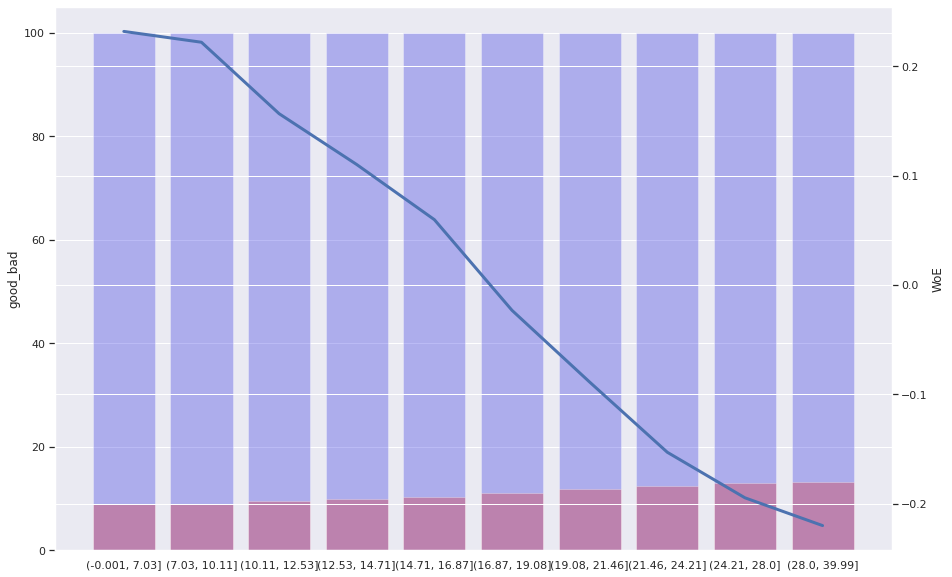

In [60]:
# fine classing by creating  a new variable
X['dti_factor'], bins_dti = pd.qcut(X['dti'],retbins=True , q = [0, .1, .2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

dti_df = woe_continous(X, 'dti_factor', y, 90)
dti_df

In [61]:
X_New = continues_dummy(X_New, X, 'dti',bins_dti)
X_New

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:MORTGAGE,home_ownership:OWN,home_ownership:RENT,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:major purchase,purpose:major_purchase,purpose:medical,purpose:moving,purpose:small_business,purpose:vacation,purpose:wedding,addr_state:AL,addr_state:CA,addr_state:DC,addr_state:HI,addr_state:ID,addr_state:IN,addr_state:ME,addr_state:MS,addr_state:MT,addr_state:NY,addr_state:OR,addr_state:PA,addr_state:SC,addr_state:TX,addr_state:VA,addr_state:WA,initial_list_status:f,initial_list_status:w,pymnt_plan:n,pymnt_plan:y,int_rate:A,int_rate:B,int_rate:C,int_rate:D,int_rate:E,int_rate:F,int_rate:G,int_rate:H,int_rate:I,int_rate:J,annual_inc:A,annual_inc:B,annual_inc:C,annual_inc:D,annual_inc:E,annual_inc:F,annual_inc:G,annual_inc:H,annual_inc:I,annual_inc:J,dti:A,dti:B,dti:C,dti:D,dti:E,dti:F,dti:G,dti:H,dti:I,dti:J
0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
466281,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
466282,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
466283,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0


,inq_last_6mths,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE
0,0.000000,241498,0.908736,0.517919,219458.0,22040.0,0.528411,0.432428,0.200458,NaN,NaN
1,0.804745,29,0.896552,0.000062,26.0,3.0,0.000063,0.000059,0.061640,0.012185,0.138818
2,1.000000,130148,0.884439,0.279117,115108.0,15040.0,0.277157,0.295087,-0.062687,0.012112,0.124327
3,2.000000,57825,0.863606,0.124012,49938.0,7887.0,0.120241,0.154744,-0.252278,0.020834,0.189591
4,3.000000,25126,0.841001,0.053885,21131.0,3995.0,0.050879,0.078383,-0.432147,0.022604,0.179869
5,4.000000,7241,0.846982,0.015529,6133.0,1108.0,0.014767,0.021739,-0.386717,0.005981,0.045430
6,5.000000,2768,0.828396,0.005936,2293.0,475.0,0.005521,0.009320,-0.523543,0.018587,0.136826
7,6.000000,1188,0.783670,0.002548,931.0,257.0,0.002242,0.005042,-0.810661,0.044726,0.287118
8,7.000000,195,0.651282,0.000418,127.0,68.0,0.000306,0.001334,-1.473165,0.132388,0.662504
9,8.000000,122,0.622951,0.000262,76.0,46.0,0.000183,0.000903,-1.595752,0.028331,0.122587


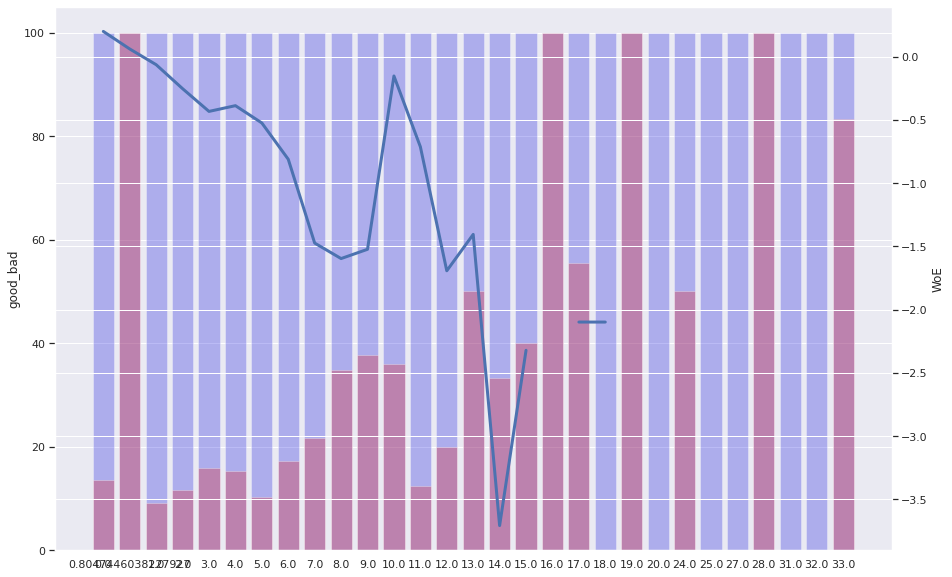

In [62]:
# fine classing by creating  a new variable
X['inq_last_6mths_factor'], bins_inq_last_6mths = pd.qcut(X['inq_last_6mths'], retbins=True ,\
                                                          q = [0, .2, 0.4, 0.6, 0.8,  1],\
                                                          duplicates = 'drop')
inq_last_6mths_df = woe_continous(X, 'inq_last_6mths', y, 90)
inq_last_6mths_df

In [63]:
X_New = continues_dummy(X_New, X, 'inq_last_6mths',bins_inq_last_6mths)
X_New

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:MORTGAGE,home_ownership:OWN,home_ownership:RENT,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:major purchase,purpose:major_purchase,purpose:medical,purpose:moving,purpose:small_business,purpose:vacation,purpose:wedding,addr_state:AL,addr_state:CA,addr_state:DC,addr_state:HI,addr_state:ID,addr_state:IN,addr_state:ME,addr_state:MS,addr_state:MT,addr_state:NY,addr_state:OR,addr_state:PA,addr_state:SC,addr_state:TX,addr_state:VA,addr_state:WA,initial_list_status:f,initial_list_status:w,pymnt_plan:n,pymnt_plan:y,int_rate:A,int_rate:B,int_rate:C,int_rate:D,int_rate:E,int_rate:F,int_rate:G,int_rate:H,int_rate:I,int_rate:J,annual_inc:A,annual_inc:B,annual_inc:C,annual_inc:D,annual_inc:E,annual_inc:F,annual_inc:G,annual_inc:H,annual_inc:I,annual_inc:J,dti:A,dti:B,dti:C,dti:D,dti:E,dti:F,dti:G,dti:H,dti:I,dti:J,inq_last_6mths:A,inq_last_6mths:B,inq_last_6mths:C
0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
4,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
466281,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
466282,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
466283,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


,mths_since_issue_d_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE
0,"(80.999, 83.0]",74143,0.936393,0.159008,69427.0,4716.0,0.167166,0.092529,0.591471,NaN,NaN
1,"(83.0, 85.0]",29420,0.921176,0.063094,27101.0,2319.0,0.065254,0.045499,0.360590,0.015217,0.230880
2,"(85.0, 87.0]",46485,0.914209,0.099692,42497.0,3988.0,0.102324,0.078245,0.268300,0.006967,0.092291
3,"(87.0, 89.0]",38170,0.904847,0.081860,34538.0,3632.0,0.083161,0.071260,0.154433,0.009362,0.113867
4,"(89.0, 92.0]",47410,0.899051,0.101676,42624.0,4786.0,0.102630,0.093902,0.088878,0.005796,0.065554
5,"(92.0, 96.0]",56797,0.888867,0.121807,50485.0,6312.0,0.121558,0.123842,-0.018620,0.010183,0.107499
6,"(96.0, 99.0]",35483,0.871967,0.076097,30940.0,4543.0,0.074497,0.089134,-0.179382,0.016901,0.160761
7,"(99.0, 105.0]",48541,0.859809,0.104102,41736.0,6805.0,0.100492,0.133515,-0.284138,0.012158,0.104756
8,"(105.0, 115.0]",44699,0.842480,0.095862,37658.0,7041.0,0.090673,0.138146,-0.421049,0.017330,0.136911
9,"(115.0, 171.0]",45137,0.848772,0.096801,38311.0,6826.0,0.092245,0.133927,-0.372846,0.006292,0.048203


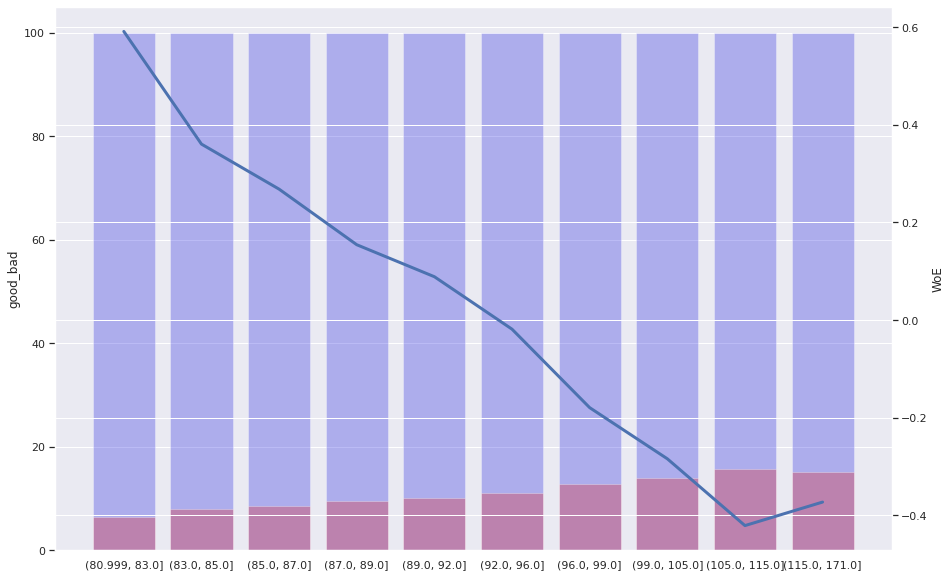

In [64]:
# fine classing by creating  a new variable
X['mths_since_issue_d_factor'], bins_mths_since_issue_d = pd.qcut(X['mths_since_issue_d'],retbins=True ,\
                                        q = [0, .1, .2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1], duplicates = 'drop')

mths_since_issue_d_df = woe_continous(X, 'mths_since_issue_d_factor', y, 90)
mths_since_issue_d_df

In [65]:
X_New = continues_dummy(X_New, X, 'mths_since_issue_d',bins_mths_since_issue_d)
X_New

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:MORTGAGE,home_ownership:OWN,home_ownership:RENT,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:major purchase,purpose:major_purchase,purpose:medical,purpose:moving,purpose:small_business,purpose:vacation,purpose:wedding,addr_state:AL,addr_state:CA,addr_state:DC,addr_state:HI,addr_state:ID,addr_state:IN,addr_state:ME,addr_state:MS,addr_state:MT,addr_state:NY,addr_state:OR,addr_state:PA,addr_state:SC,addr_state:TX,addr_state:VA,addr_state:WA,initial_list_status:f,initial_list_status:w,pymnt_plan:n,pymnt_plan:y,int_rate:A,int_rate:B,int_rate:C,int_rate:D,int_rate:E,int_rate:F,int_rate:G,int_rate:H,int_rate:I,int_rate:J,annual_inc:A,annual_inc:B,annual_inc:C,annual_inc:D,annual_inc:E,annual_inc:F,annual_inc:G,annual_inc:H,annual_inc:I,annual_inc:J,dti:A,dti:B,dti:C,dti:D,dti:E,dti:F,dti:G,dti:H,dti:I,dti:J,inq_last_6mths:A,inq_last_6mths:B,inq_last_6mths:C,mths_since_issue_d:A,mths_since_issue_d:B,mths_since_issue_d:C,mths_since_issue_d:D,mths_since_issue_d:E,mths_since_issue_d:F,mths_since_issue_d:G,mths_since_issue_d:H,mths_since_issue_d:I,mths_since_issue_d:J
0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
4,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
466281,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
466282,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0
466283,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


,term_int_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE
0,"(35.999, 60.0]",466285,0.890693,1.0,415317.0,50968.0,1.0,1.0,0.0,NaN,NaN


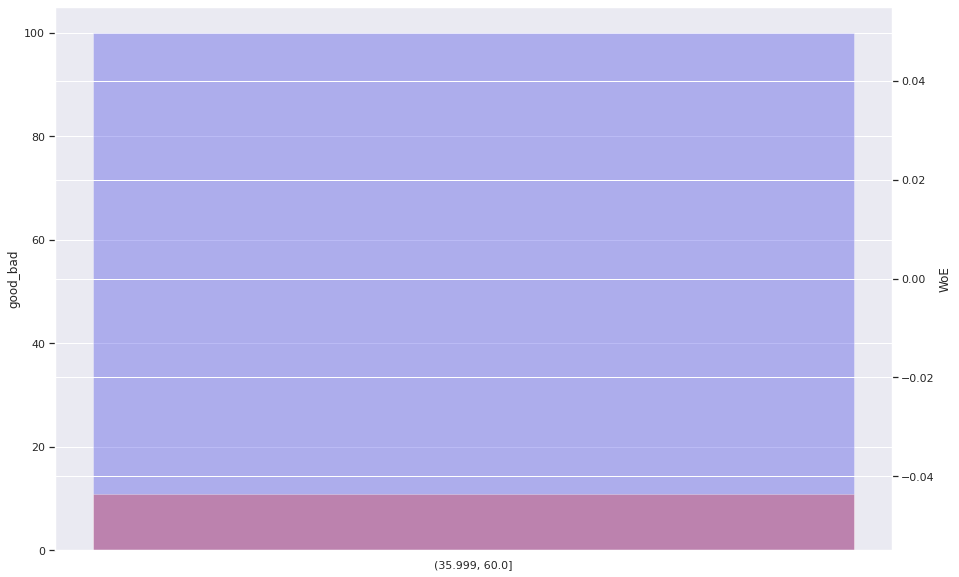

In [66]:
# fine classing by creating  a new variable
X['term_int_factor'], bins_term_int = pd.qcut(X['term_int'],retbins=True ,\
                                              q = [0, .1, .2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],\
                                              duplicates = 'drop')

mths_since_iss_df = woe_continous(X, 'term_int_factor', y, 90)
mths_since_iss_df

In [67]:
X_New = continues_dummy(X_New, X, 'term_int',bins_term_int)
X_New

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:MORTGAGE,home_ownership:OWN,home_ownership:RENT,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:major purchase,purpose:major_purchase,purpose:medical,purpose:moving,purpose:small_business,purpose:vacation,purpose:wedding,addr_state:AL,addr_state:CA,addr_state:DC,addr_state:HI,addr_state:ID,addr_state:IN,addr_state:ME,addr_state:MS,addr_state:MT,addr_state:NY,addr_state:OR,addr_state:PA,addr_state:SC,addr_state:TX,addr_state:VA,addr_state:WA,initial_list_status:f,initial_list_status:w,pymnt_plan:n,pymnt_plan:y,int_rate:A,int_rate:B,int_rate:C,int_rate:D,int_rate:E,int_rate:F,int_rate:G,int_rate:H,int_rate:I,int_rate:J,annual_inc:A,annual_inc:B,annual_inc:C,annual_inc:D,annual_inc:E,annual_inc:F,annual_inc:G,annual_inc:H,annual_inc:I,annual_inc:J,dti:A,dti:B,dti:C,dti:D,dti:E,dti:F,dti:G,dti:H,dti:I,dti:J,inq_last_6mths:A,inq_last_6mths:B,inq_last_6mths:C,mths_since_issue_d:A,mths_since_issue_d:B,mths_since_issue_d:C,mths_since_issue_d:D,mths_since_issue_d:E,mths_since_issue_d:F,mths_since_issue_d:G,mths_since_issue_d:H,mths_since_issue_d:I,mths_since_issue_d:J,term_int:A
0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1
2,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
466281,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
466282,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
466283,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


,revol_util_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE
0,"(-0.001, 17.6]",31220,0.916784,0.066955,28622.0,2598.0,0.068916,0.050973,0.301590,NaN,NaN
1,"(17.6, 27.7]",31232,0.914799,0.066980,28571.0,2661.0,0.068793,0.052209,0.275846,0.001985,0.025744
2,"(27.7, 34.8]",31204,0.906647,0.066920,28291.0,2913.0,0.068119,0.057154,0.175516,0.008152,0.100330
3,"(34.8, 40.7]",31017,0.905246,0.066519,28078.0,2939.0,0.067606,0.057664,0.159073,0.001401,0.016443
4,"(40.7, 46.0]",31340,0.899968,0.067212,28205.0,3135.0,0.067912,0.061509,0.099026,0.005277,0.060047
5,"(46.0, 50.8]",30898,0.896563,0.066264,27702.0,3196.0,0.066701,0.062706,0.061760,0.003405,0.037266
6,"(50.8, 55.4]",31324,0.894522,0.067178,28020.0,3304.0,0.067467,0.064825,0.039941,0.002041,0.021820
7,"(55.4, 59.8]",30884,0.890526,0.066234,27503.0,3381.0,0.066222,0.066336,-0.001721,0.003996,0.041661
8,"(59.8, 64.3]",31326,0.887442,0.067182,27800.0,3526.0,0.066937,0.069181,-0.032972,0.003084,0.031252
9,"(64.3, 68.8]",30897,0.881542,0.066262,27237.0,3660.0,0.065581,0.071810,-0.090731,0.005900,0.057759


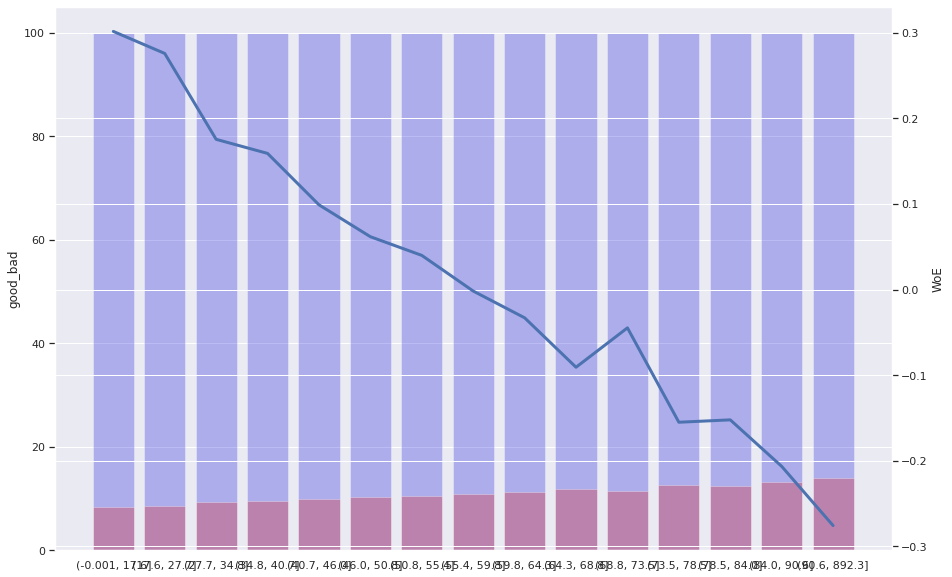

In [68]:
# fine classing by creating  a new variable
X['revol_util_factor'], bins_revol_util = pd.qcut(X['revol_util'],retbins=True , q = 15, duplicates = 'drop')

revol_util_df = woe_continous(X, 'revol_util_factor', y, 90)
revol_util_df

In [69]:
X_New = continues_dummy(X_New, X, 'revol_util',bins_revol_util)
X_New

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:MORTGAGE,home_ownership:OWN,home_ownership:RENT,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:major purchase,purpose:major_purchase,purpose:medical,purpose:moving,purpose:small_business,purpose:vacation,purpose:wedding,addr_state:AL,addr_state:CA,addr_state:DC,addr_state:HI,addr_state:ID,addr_state:IN,addr_state:ME,addr_state:MS,addr_state:MT,addr_state:NY,addr_state:OR,addr_state:PA,addr_state:SC,addr_state:TX,addr_state:VA,addr_state:WA,initial_list_status:f,initial_list_status:w,pymnt_plan:n,pymnt_plan:y,int_rate:A,int_rate:B,int_rate:C,int_rate:D,int_rate:E,int_rate:F,int_rate:G,int_rate:H,int_rate:I,int_rate:J,annual_inc:A,annual_inc:B,annual_inc:C,annual_inc:D,annual_inc:E,annual_inc:F,annual_inc:G,annual_inc:H,annual_inc:I,annual_inc:J,dti:A,dti:B,dti:C,dti:D,dti:E,dti:F,dti:G,dti:H,dti:I,dti:J,inq_last_6mths:A,inq_last_6mths:B,inq_last_6mths:C,mths_since_issue_d:A,mths_since_issue_d:B,mths_since_issue_d:C,mths_since_issue_d:D,mths_since_issue_d:E,mths_since_issue_d:F,mths_since_issue_d:G,mths_since_issue_d:H,mths_since_issue_d:I,mths_since_issue_d:J,term_int:A,revol_util:A,revol_util:B,revol_util:C,revol_util:D,revol_util:E,revol_util:F,revol_util:G,revol_util:H,revol_util:I,revol_util:J,revol_util:K,revol_util:L,revol_util:M,revol_util:N,revol_util:O
0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
466281,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
466282,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
466283,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


,out_prncp_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE
0,"(-0.001, 1449.68]",248686,0.824751,0.533335,205104.0,43582.0,0.493849,0.855086,-0.548971,NaN,NaN
1,"(1449.68, 3022.96]",31089,0.975844,0.066674,30338.0,751.0,0.073048,0.014735,1.600907,0.151093,2.149878
2,"(3022.96, 4623.04]",31109,0.971262,0.066717,30215.0,894.0,0.072752,0.017540,1.422544,0.004581,0.178363
3,"(4623.04, 6698.26]",31062,0.967259,0.066616,30045.0,1017.0,0.072342,0.019954,1.287995,0.004003,0.134549
4,"(6698.26, 9198.462]",31082,0.966058,0.066659,30027.0,1055.0,0.072299,0.020699,1.250712,0.001202,0.037283
5,"(9198.462, 12104.19]",31087,0.962460,0.066670,29920.0,1167.0,0.072041,0.022897,1.146247,0.003597,0.104465
6,"(12104.19, 16584.504]",31084,0.963904,0.066663,29962.0,1122.0,0.072142,0.022014,1.186973,0.001444,0.040726
7,"(16584.504, 32160.38]",31086,0.955607,0.066667,29706.0,1380.0,0.071526,0.027076,0.971421,0.008297,0.215552


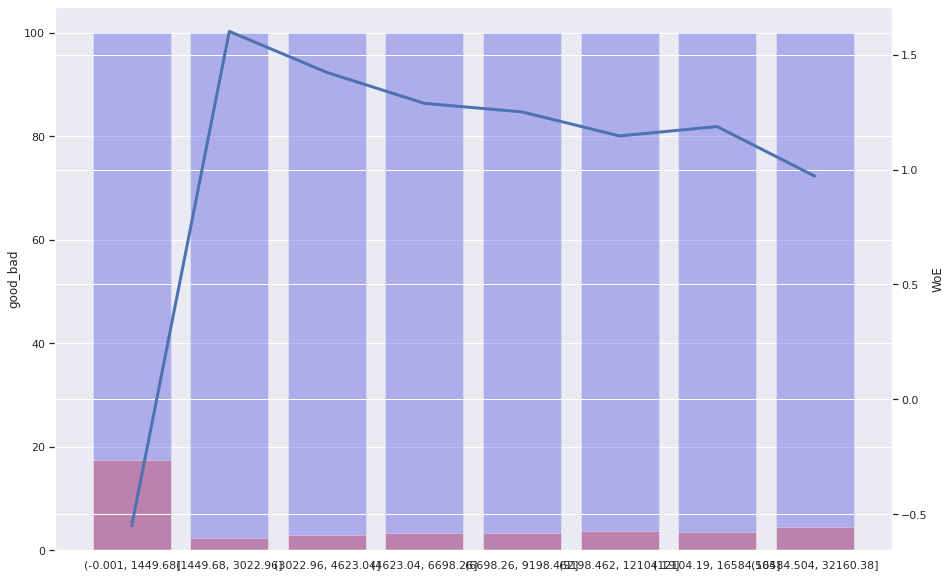

In [70]:
# fine classing by creating  a new variable
X['out_prncp_factor'], bins_out_prncp = pd.qcut(X['out_prncp'],retbins=True , q = 15, duplicates = 'drop')

out_prncp_df = woe_continous(X, 'out_prncp_factor', y, 90)
out_prncp_df

In [71]:
X_New = continues_dummy(X_New, X, 'out_prncp',bins_out_prncp)
X_New

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:MORTGAGE,home_ownership:OWN,home_ownership:RENT,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:major purchase,purpose:major_purchase,purpose:medical,purpose:moving,purpose:small_business,purpose:vacation,purpose:wedding,addr_state:AL,addr_state:CA,addr_state:DC,addr_state:HI,addr_state:ID,addr_state:IN,addr_state:ME,addr_state:MS,addr_state:MT,addr_state:NY,addr_state:OR,addr_state:PA,addr_state:SC,addr_state:TX,addr_state:VA,addr_state:WA,initial_list_status:f,initial_list_status:w,pymnt_plan:n,pymnt_plan:y,int_rate:A,int_rate:B,int_rate:C,int_rate:D,int_rate:E,int_rate:F,int_rate:G,int_rate:H,int_rate:I,int_rate:J,annual_inc:A,annual_inc:B,annual_inc:C,annual_inc:D,annual_inc:E,annual_inc:F,annual_inc:G,annual_inc:H,annual_inc:I,annual_inc:J,dti:A,dti:B,dti:C,dti:D,dti:E,dti:F,dti:G,dti:H,dti:I,dti:J,inq_last_6mths:A,inq_last_6mths:B,inq_last_6mths:C,mths_since_issue_d:A,mths_since_issue_d:B,mths_since_issue_d:C,mths_since_issue_d:D,mths_since_issue_d:E,mths_since_issue_d:F,mths_since_issue_d:G,mths_since_issue_d:H,mths_since_issue_d:I,mths_since_issue_d:J,term_int:A,revol_util:A,revol_util:B,revol_util:C,revol_util:D,revol_util:E,revol_util:F,revol_util:G,revol_util:H,revol_util:I,revol_util:J,revol_util:K,revol_util:L,revol_util:M,revol_util:N,revol_util:O,out_prncp:A,out_prncp:B,out_prncp:C,out_prncp:D,out_prncp:E,out_prncp:F,out_prncp:G,out_prncp:H
0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
466281,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
466282,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
466283,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0

,total_pymnt_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE
0,"(-0.001, 2677.846]",31086,0.644502,0.066667,20035.0,11051.0,0.048240,0.216822,-1.502884,NaN,NaN
1,"(2677.846, 3856.476]",31086,0.791353,0.066667,24600.0,6486.0,0.059232,0.127256,-0.764744,0.146851,0.738141
2,"(3856.476, 4853.508]",31085,0.834454,0.066665,25939.0,5146.0,0.062456,0.100965,-0.480316,0.043101,0.284427
3,"(4853.508, 5765.102]",31086,0.862575,0.066667,26814.0,4272.0,0.064563,0.083817,-0.261002,0.028121,0.219314
4,"(5765.102, 6711.98]",31086,0.882005,0.066667,27418.0,3668.0,0.066017,0.071967,-0.086291,0.019430,0.174711
5,"(6711.98, 7703.8]",31086,0.893071,0.066667,27762.0,3324.0,0.066845,0.065217,0.024655,0.011066,0.110946
6,"(7703.8, 8816.798]",31085,0.899373,0.066665,27957.0,3128.0,0.067315,0.061372,0.092430,0.006302,0.067774
7,"(8816.798, 10085.356]",31085,0.907833,0.066665,28220.0,2865.0,0.067948,0.056212,0.189618,0.008461,0.097189
8,"(10085.356, 11337.643]",31086,0.927331,0.066667,28827.0,2259.0,0.069410,0.044322,0.448546,0.019497,0.258928
9,"(11337.643, 12833.63]",31087,0.934989,0.066670,29066.0,2021.0,0.069985,0.039652,0.568133,0.007658,0.119586


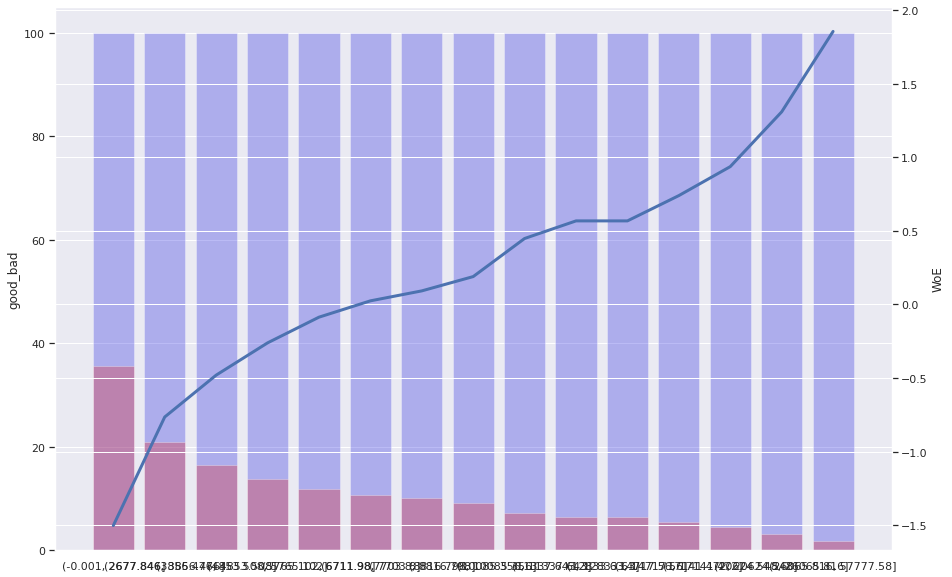

In [72]:
# fine classing by creating  a new variable
X['total_pymnt_factor'], bins_total_pymnt = pd.qcut(X['total_pymnt'],retbins=True , q = 15, duplicates = 'drop')

total_pymnt_df = woe_continous(X, 'total_pymnt_factor', y, 90)
total_pymnt_df

In [73]:
X_New = continues_dummy(X_New, X, 'total_pymnt',bins_total_pymnt)
X_New

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:MORTGAGE,home_ownership:OWN,home_ownership:RENT,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:major purchase,purpose:major_purchase,purpose:medical,purpose:moving,purpose:small_business,purpose:vacation,purpose:wedding,addr_state:AL,addr_state:CA,addr_state:DC,addr_state:HI,addr_state:ID,addr_state:IN,addr_state:ME,addr_state:MS,addr_state:MT,addr_state:NY,addr_state:OR,addr_state:PA,addr_state:SC,addr_state:TX,addr_state:VA,addr_state:WA,initial_list_status:f,initial_list_status:w,pymnt_plan:n,pymnt_plan:y,int_rate:A,int_rate:B,int_rate:C,int_rate:D,int_rate:E,int_rate:F,int_rate:G,int_rate:H,int_rate:I,int_rate:J,annual_inc:A,annual_inc:B,annual_inc:C,annual_inc:D,annual_inc:E,annual_inc:F,annual_inc:G,annual_inc:H,annual_inc:I,annual_inc:J,dti:A,dti:B,dti:C,dti:D,dti:E,dti:F,dti:G,dti:H,dti:I,dti:J,inq_last_6mths:A,inq_last_6mths:B,inq_last_6mths:C,mths_since_issue_d:A,mths_since_issue_d:B,mths_since_issue_d:C,mths_since_issue_d:D,mths_since_issue_d:E,mths_since_issue_d:F,mths_since_issue_d:G,mths_since_issue_d:H,mths_since_issue_d:I,mths_since_issue_d:J,term_int:A,revol_util:A,revol_util:B,revol_util:C,revol_util:D,revol_util:E,revol_util:F,revol_util:G,revol_util:H,revol_util:I,revol_util:J,revol_util:K,revol_util:L,revol_util:M,revol_util:N,revol_util:O,out_prncp:A,out_prncp:B,out_prncp:C,out_prncp:D,out_prncp:E,out_prncp:F,out_prncp:G,out_prncp:H,total_pymnt:A,total_pymnt:B,total_pymnt:C,total_pymnt:D,total_pymnt:E,total_pymnt:F,total_pymnt:G,total_pymnt:H,total_pymnt:I,total_pymnt:J,total_pymnt:K,total_pymnt:L,total_pymnt:M,total_pymnt:N,total_pymnt:O
0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
466281,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0

,total_rec_int_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE
0,"(-0.001, 504.376]",46629,0.847048,0.100001,39497.0,7132.0,0.095101,0.139931,-0.386211,NaN,NaN
1,"(504.376, 811.32]",46629,0.880868,0.100001,41074.0,5555.0,0.098898,0.108990,-0.097167,0.033820,0.289044
2,"(811.32, 1110.87]",46637,0.891267,0.100018,41566.0,5071.0,0.100083,0.099494,0.005900,0.010398,0.103068
3,"(1110.87, 1437.51]",46668,0.891510,0.100085,41605.0,5063.0,0.100176,0.099337,0.008417,0.000244,0.002517
4,"(1437.51, 1818.88]",46586,0.897480,0.099909,41810.0,4776.0,0.100670,0.093706,0.071688,0.005970,0.063271
5,"(1818.88, 2279.41]",46623,0.897969,0.099988,41866.0,4757.0,0.100805,0.093333,0.077013,0.000489,0.005325
6,"(2279.41, 2889.072]",46627,0.901431,0.099997,42031.0,4596.0,0.101202,0.090174,0.115377,0.003462,0.038364
7,"(2889.072, 3862.022]",46629,0.900084,0.100001,41970.0,4659.0,0.101055,0.091410,0.100310,0.001347,0.015067
8,"(3862.022, 5720.856]",46628,0.898216,0.099999,41882.0,4746.0,0.100843,0.093117,0.079710,0.001868,0.020600
9,"(5720.856, 24205.62]",46629,0.901070,0.100001,42016.0,4613.0,0.101166,0.090508,0.111328,0.002854,0.031618


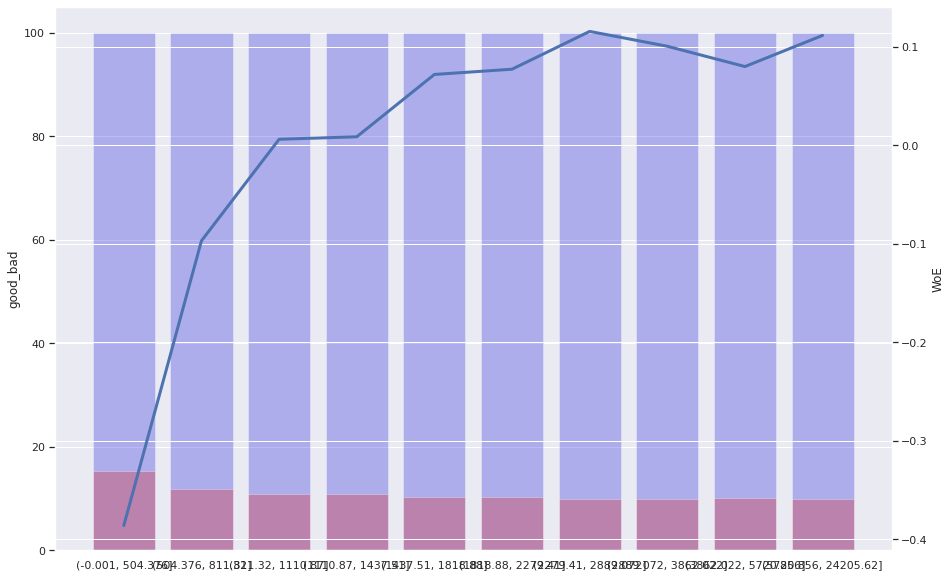

In [74]:
# fine classing by creating  a new variable
X['total_rec_int_factor'], bins_total_rec_int = pd.qcut(X['total_rec_int'],retbins=True , q = 10, duplicates = 'drop')

total_rec_int_df = woe_continous(X, 'total_rec_int_factor', y, 90)
total_rec_int_df

In [75]:
X_New = continues_dummy(X_New, X, 'total_rec_int',bins_total_rec_int)
X_New

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:MORTGAGE,home_ownership:OWN,home_ownership:RENT,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:major purchase,purpose:major_purchase,purpose:medical,purpose:moving,purpose:small_business,purpose:vacation,purpose:wedding,addr_state:AL,addr_state:CA,addr_state:DC,addr_state:HI,addr_state:ID,addr_state:IN,addr_state:ME,addr_state:MS,addr_state:MT,addr_state:NY,addr_state:OR,addr_state:PA,addr_state:SC,addr_state:TX,addr_state:VA,addr_state:WA,initial_list_status:f,initial_list_status:w,pymnt_plan:n,pymnt_plan:y,int_rate:A,int_rate:B,int_rate:C,int_rate:D,int_rate:E,int_rate:F,int_rate:G,int_rate:H,int_rate:I,int_rate:J,annual_inc:A,annual_inc:B,annual_inc:C,annual_inc:D,annual_inc:E,annual_inc:F,annual_inc:G,annual_inc:H,annual_inc:I,annual_inc:J,dti:A,dti:B,dti:C,dti:D,dti:E,dti:F,dti:G,dti:H,dti:I,dti:J,inq_last_6mths:A,inq_last_6mths:B,inq_last_6mths:C,mths_since_issue_d:A,mths_since_issue_d:B,mths_since_issue_d:C,mths_since_issue_d:D,mths_since_issue_d:E,mths_since_issue_d:F,mths_since_issue_d:G,mths_since_issue_d:H,mths_since_issue_d:I,mths_since_issue_d:J,term_int:A,revol_util:A,revol_util:B,revol_util:C,revol_util:D,revol_util:E,revol_util:F,revol_util:G,revol_util:H,revol_util:I,revol_util:J,revol_util:K,revol_util:L,revol_util:M,revol_util:N,revol_util:O,out_prncp:A,out_prncp:B,out_prncp:C,out_prncp:D,out_prncp:E,out_prncp:F,out_prncp:G,out_prncp:H,total_pymnt:A,total_pymnt:B,total_pymnt:C,total_pymnt:D,total_pymnt:E,total_pymnt:F,total_pymnt:G,total_pymnt:H,total_pymnt:I,total_pymnt:J,total_pymnt:K,total_pymnt:L,total_pymnt:M,total_pymnt:N,total_pymnt:O,total_rec_int:A,total_rec_int:B,total_rec_int:C,total_rec_int:D,total_rec_int:E,total_rec_int:F,total_rec_int:G,total_rec_int:H,total_rec_int:I,total_rec_int:J
0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,

,last_pymnt_amnt_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE
0,"(-0.001, 224.91]",66614,0.828084,0.142861,55162.0,11452.0,0.132819,0.224690,-0.525734,NaN,NaN
1,"(224.91, 336.22]",66752,0.855570,0.143157,57111.0,9641.0,0.137512,0.189158,-0.318872,0.027486,0.206862
2,"(336.22, 468.24]",66472,0.842520,0.142557,56004.0,10468.0,0.134846,0.205384,-0.420744,0.013050,0.101872
3,"(468.24, 657.17]",66611,0.849124,0.142855,56561.0,10050.0,0.136188,0.197183,-0.370097,0.006604,0.050647
4,"(657.17, 1785.13]",66611,0.864602,0.142855,57592.0,9019.0,0.138670,0.176954,-0.243794,0.015478,0.126303
5,"(1785.13, 7935.4]",66613,0.995692,0.142859,66326.0,287.0,0.159700,0.005631,3.345011,0.131090,3.588805
6,"(7935.4, 36234.44]",66612,0.999234,0.142857,66561.0,51.0,0.160266,0.001001,5.076204,0.003543,1.731193


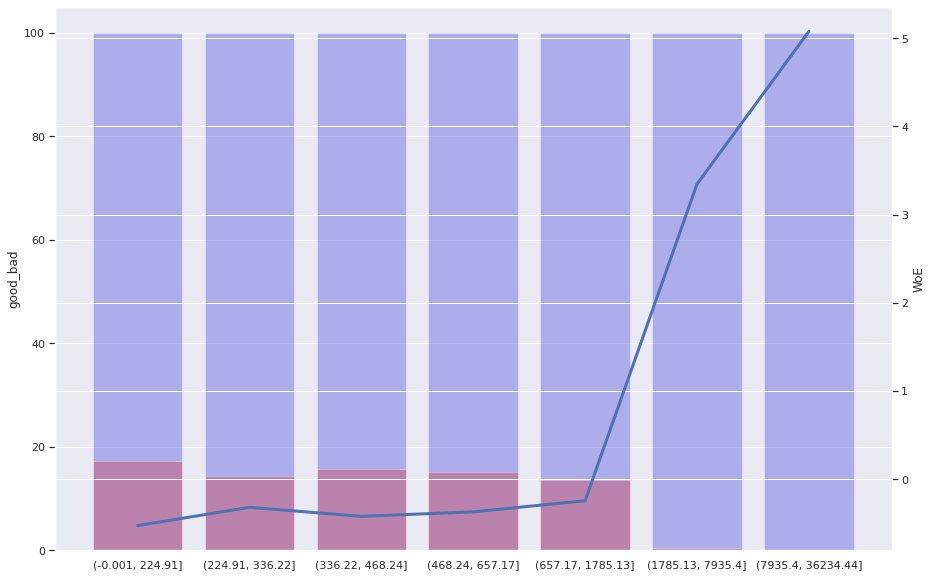

In [76]:
# fine classing by creating  a new variable
X['last_pymnt_amnt_factor'], bins_last_pymnt_amnt = pd.qcut(X['last_pymnt_amnt'],retbins=True , q = 7, duplicates = 'drop')

last_pymnt_amnt_df = woe_continous(X, 'last_pymnt_amnt_factor', y, 90)
last_pymnt_amnt_df

In [77]:
X_New = continues_dummy(X_New, X, 'last_pymnt_amnt',bins_last_pymnt_amnt)
X_New

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:MORTGAGE,home_ownership:OWN,home_ownership:RENT,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:major purchase,purpose:major_purchase,purpose:medical,purpose:moving,purpose:small_business,purpose:vacation,purpose:wedding,addr_state:AL,addr_state:CA,addr_state:DC,addr_state:HI,addr_state:ID,addr_state:IN,addr_state:ME,addr_state:MS,addr_state:MT,addr_state:NY,addr_state:OR,addr_state:PA,addr_state:SC,addr_state:TX,addr_state:VA,addr_state:WA,initial_list_status:f,initial_list_status:w,pymnt_plan:n,pymnt_plan:y,int_rate:A,int_rate:B,int_rate:C,int_rate:D,int_rate:E,int_rate:F,int_rate:G,int_rate:H,int_rate:I,int_rate:J,annual_inc:A,annual_inc:B,annual_inc:C,annual_inc:D,annual_inc:E,annual_inc:F,annual_inc:G,annual_inc:H,annual_inc:I,annual_inc:J,dti:A,dti:B,dti:C,dti:D,dti:E,dti:F,dti:G,dti:H,dti:I,dti:J,inq_last_6mths:A,inq_last_6mths:B,inq_last_6mths:C,mths_since_issue_d:A,mths_since_issue_d:B,mths_since_issue_d:C,mths_since_issue_d:D,mths_since_issue_d:E,mths_since_issue_d:F,mths_since_issue_d:G,mths_since_issue_d:H,mths_since_issue_d:I,mths_since_issue_d:J,term_int:A,revol_util:A,revol_util:B,revol_util:C,revol_util:D,revol_util:E,revol_util:F,revol_util:G,revol_util:H,revol_util:I,revol_util:J,revol_util:K,revol_util:L,revol_util:M,revol_util:N,revol_util:O,out_prncp:A,out_prncp:B,out_prncp:C,out_prncp:D,out_prncp:E,out_prncp:F,out_prncp:G,out_prncp:H,total_pymnt:A,total_pymnt:B,total_pymnt:C,total_pymnt:D,total_pymnt:E,total_pymnt:F,total_pymnt:G,total_pymnt:H,total_pymnt:I,total_pymnt:J,total_pymnt:K,total_pymnt:L,total_pymnt:M,total_pymnt:N,total_pymnt:O,total_rec_int:A,total_rec_int:B,total_rec_int:C,total_rec_int:D,total_rec_int:E,total_rec_int:F,total_rec_int:G,total_rec_int:H,total_rec_int:I,total_rec_int:J,last_pymnt_amnt:A,last_pymnt_amnt:B,last_pymnt_amnt:C,last_pymnt_amnt:D,last_pymnt_amnt:E,last_pymnt_amnt:F,last_pymnt_amnt:G
0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

,tot_cur_bal_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE
0,"(-0.001, 20413.0]",66614,0.887471,0.142861,59118.0,7496.0,0.142344,0.147073,-0.032678,NaN,NaN
1,"(20413.0, 39097.0]",66611,0.883803,0.142855,58871.0,7740.0,0.141750,0.151860,-0.068897,0.003668,0.036219
2,"(39097.0, 83674.0]",66612,0.887303,0.142857,59105.0,7507.0,0.142313,0.147288,-0.034364,0.003500,0.034533
3,"(83674.0, 138801.713]",112744,0.863736,0.241792,97381.0,15363.0,0.234474,0.301424,-0.251175,0.023567,0.216811
4,"(138801.713, 164427.0]",20479,0.899507,0.043919,18421.0,2058.0,0.044354,0.040378,0.093913,0.035771,0.345088
5,"(164427.0, 263511.0]",66613,0.909027,0.142859,60553.0,6060.0,0.145799,0.118898,0.203965,0.009520,0.110053
6,"(263511.0, 8000078.0]",66612,0.928782,0.142857,61868.0,4744.0,0.148966,0.093078,0.470278,0.019755,0.266313


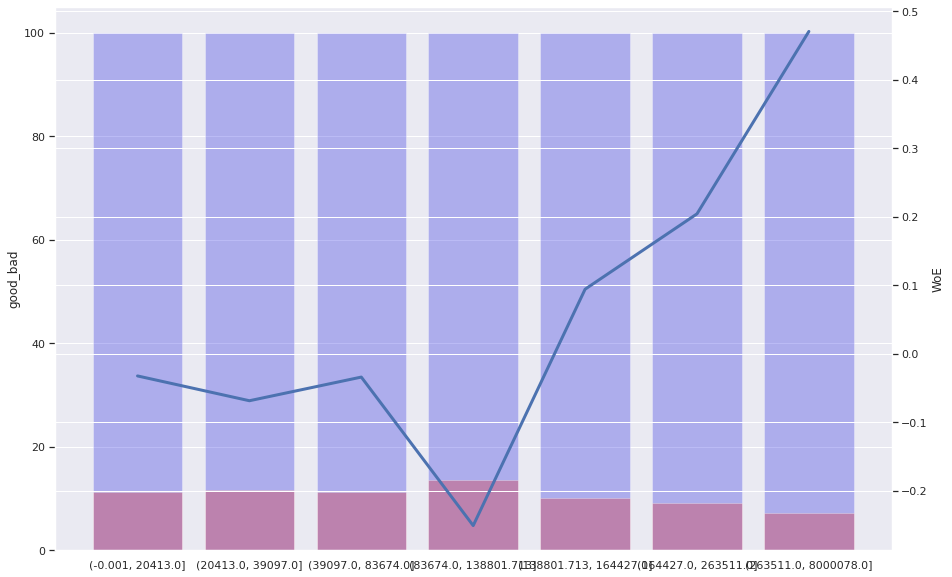

In [78]:
# fine classing by creating  a new variable
X['tot_cur_bal_factor'], bins_tot_cur_bal = pd.qcut(X['tot_cur_bal'],retbins=True , q = 7, duplicates = 'drop')

tot_cur_bal_df = woe_continous(X, 'tot_cur_bal_factor', y, 90)
tot_cur_bal_df

In [79]:
X_New = continues_dummy(X_New, X, 'tot_cur_bal',bins_tot_cur_bal)
X_New

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:MORTGAGE,home_ownership:OWN,home_ownership:RENT,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:major purchase,purpose:major_purchase,purpose:medical,purpose:moving,purpose:small_business,purpose:vacation,purpose:wedding,addr_state:AL,addr_state:CA,addr_state:DC,addr_state:HI,addr_state:ID,addr_state:IN,addr_state:ME,addr_state:MS,addr_state:MT,addr_state:NY,addr_state:OR,addr_state:PA,addr_state:SC,addr_state:TX,addr_state:VA,addr_state:WA,initial_list_status:f,initial_list_status:w,pymnt_plan:n,pymnt_plan:y,int_rate:A,int_rate:B,int_rate:C,int_rate:D,int_rate:E,int_rate:F,int_rate:G,int_rate:H,int_rate:I,int_rate:J,annual_inc:A,annual_inc:B,annual_inc:C,annual_inc:D,annual_inc:E,annual_inc:F,annual_inc:G,annual_inc:H,annual_inc:I,annual_inc:J,dti:A,dti:B,dti:C,dti:D,dti:E,dti:F,dti:G,dti:H,dti:I,dti:J,inq_last_6mths:A,inq_last_6mths:B,inq_last_6mths:C,mths_since_issue_d:A,mths_since_issue_d:B,mths_since_issue_d:C,mths_since_issue_d:D,mths_since_issue_d:E,mths_since_issue_d:F,mths_since_issue_d:G,mths_since_issue_d:H,mths_since_issue_d:I,mths_since_issue_d:J,term_int:A,revol_util:A,revol_util:B,revol_util:C,revol_util:D,revol_util:E,revol_util:F,revol_util:G,revol_util:H,revol_util:I,revol_util:J,revol_util:K,revol_util:L,revol_util:M,revol_util:N,revol_util:O,out_prncp:A,out_prncp:B,out_prncp:C,out_prncp:D,out_prncp:E,out_prncp:F,out_prncp:G,out_prncp:H,total_pymnt:A,total_pymnt:B,total_pymnt:C,total_pymnt:D,total_pymnt:E,total_pymnt:F,total_pymnt:G,total_pymnt:H,total_pymnt:I,total_pymnt:J,total_pymnt:K,total_pymnt:L,total_pymnt:M,total_pymnt:N,total_pymnt:O,total_rec_int:A,total_rec_int:B,total_rec_int:C,total_rec_int:D,total_rec_int:E,total_rec_int:F,total_rec_int:G,total_rec_int:H,total_rec_int:I,total_rec_int:J,last_pymnt_amnt:A,last_pymnt_amnt:B,last_pymnt_amnt:C,last_pymnt_amnt:D,last_pymnt_amnt:E,last_pymnt_amnt:F,last_pymnt_amnt:G,tot_cur_bal:A,tot_cur_bal:B,tot_cur_bal:C,tot_cur_bal:D,tot_cur_bal:E,tot_cur_bal:F,tot_cur_bal:G
0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
4,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

,total_rev_hi_lim_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE
0,"(-0.001, 6700.0]",47221,0.868575,0.101271,41015.0,6206.0,0.098756,0.121763,-0.209423,NaN,NaN
1,"(6700.0, 10000.0]",49342,0.876029,0.105819,43225.0,6117.0,0.104077,0.120016,-0.142497,0.007453,0.066926
2,"(10000.0, 13100.0]",43960,0.880801,0.094277,38720.0,5240.0,0.093230,0.102810,-0.097809,0.004772,0.044688
3,"(13100.0, 16400.0]",46710,0.877392,0.100175,40983.0,5727.0,0.098679,0.112365,-0.129879,0.003408,0.032069
4,"(16400.0, 20100.0]",46592,0.879615,0.099922,40983.0,5609.0,0.098679,0.110049,-0.109059,0.002222,0.020819
5,"(20100.0, 24800.0]",46158,0.889510,0.098991,41058.0,5100.0,0.098859,0.100063,-0.012099,0.009895,0.096960
6,"(24800.0, 30600.0]",46449,0.889513,0.099615,41317.0,5132.0,0.099483,0.100691,-0.012066,0.000003,0.000033
7,"(30600.0, 39200.0]",46908,0.898866,0.100599,42164.0,4744.0,0.101522,0.093078,0.086842,0.009353,0.098908
8,"(39200.0, 54600.0]",46403,0.914014,0.099516,42413.0,3990.0,0.102122,0.078284,0.265820,0.015148,0.178978
9,"(54600.0, 9999999.0]",46542,0.933329,0.099814,43439.0,3103.0,0.104592,0.060881,0.541144,0.019315,0.275325


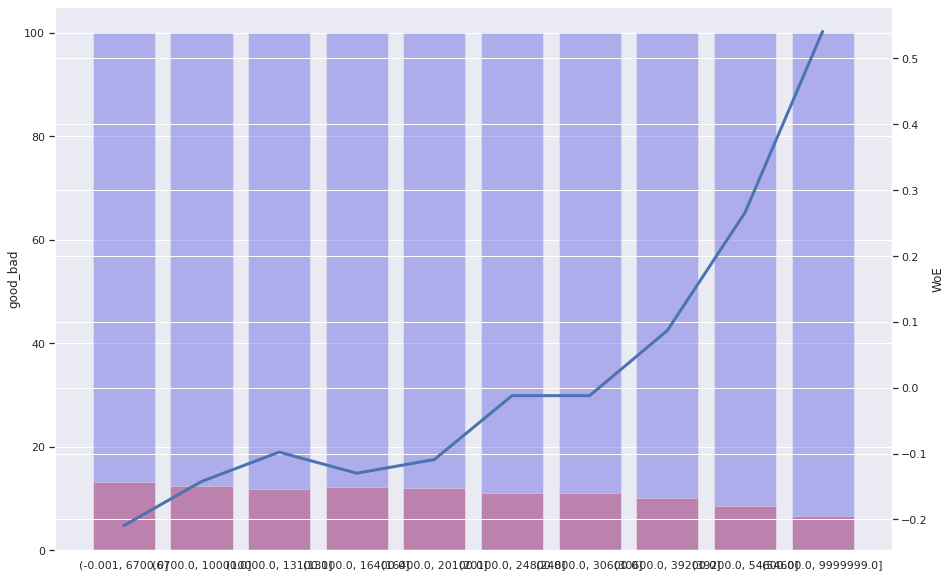

In [80]:
# fine classing by creating  a new variable
X['total_rev_hi_lim_factor'], bins_total_rev_hi_lim = pd.qcut(X['total_rev_hi_lim'],retbins=True , q = 10, duplicates = 'drop')

total_rev_hi_lim_df = woe_continous(X, 'total_rev_hi_lim_factor', y, 90)
total_rev_hi_lim_df

In [81]:
X_New = continues_dummy(X_New, X, 'total_rev_hi_lim',bins_total_rev_hi_lim)
X_New

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:MORTGAGE,home_ownership:OWN,home_ownership:RENT,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:major purchase,purpose:major_purchase,purpose:medical,purpose:moving,purpose:small_business,purpose:vacation,purpose:wedding,addr_state:AL,addr_state:CA,addr_state:DC,addr_state:HI,addr_state:ID,addr_state:IN,addr_state:ME,addr_state:MS,addr_state:MT,addr_state:NY,addr_state:OR,addr_state:PA,addr_state:SC,addr_state:TX,addr_state:VA,addr_state:WA,initial_list_status:f,initial_list_status:w,pymnt_plan:n,pymnt_plan:y,int_rate:A,int_rate:B,int_rate:C,int_rate:D,int_rate:E,int_rate:F,int_rate:G,int_rate:H,int_rate:I,int_rate:J,annual_inc:A,annual_inc:B,annual_inc:C,annual_inc:D,annual_inc:E,annual_inc:F,annual_inc:G,annual_inc:H,annual_inc:I,annual_inc:J,dti:A,dti:B,dti:C,dti:D,dti:E,dti:F,dti:G,dti:H,dti:I,dti:J,inq_last_6mths:A,inq_last_6mths:B,inq_last_6mths:C,mths_since_issue_d:A,mths_since_issue_d:B,mths_since_issue_d:C,mths_since_issue_d:D,mths_since_issue_d:E,mths_since_issue_d:F,mths_since_issue_d:G,mths_since_issue_d:H,mths_since_issue_d:I,mths_since_issue_d:J,term_int:A,revol_util:A,revol_util:B,revol_util:C,revol_util:D,revol_util:E,revol_util:F,revol_util:G,revol_util:H,revol_util:I,revol_util:J,revol_util:K,revol_util:L,revol_util:M,revol_util:N,revol_util:O,out_prncp:A,out_prncp:B,out_prncp:C,out_prncp:D,out_prncp:E,out_prncp:F,out_prncp:G,out_prncp:H,total_pymnt:A,total_pymnt:B,total_pymnt:C,total_pymnt:D,total_pymnt:E,total_pymnt:F,total_pymnt:G,total_pymnt:H,total_pymnt:I,total_pymnt:J,total_pymnt:K,total_pymnt:L,total_pymnt:M,total_pymnt:N,total_pymnt:O,total_rec_int:A,total_rec_int:B,total_rec_int:C,total_rec_int:D,total_rec_int:E,total_rec_int:F,total_rec_int:G,total_rec_int:H,total_rec_int:I,total_rec_int:J,last_pymnt_amnt:A,last_pymnt_amnt:B,last_pymnt_amnt:C,last_pymnt_amnt:D,last_pymnt_amnt:E,last_pymnt_amnt:F,last_pymnt_amnt:G,tot_cur_bal:A,tot_cur_bal:B,tot_cur_bal:C,tot_cur_bal:D,tot_cur_bal:E,tot_cur_bal:F,tot_cur_bal:G,total_rev_hi_lim:A,total_rev_hi_lim:B,total_rev_hi_lim:C,total_rev_hi_lim:D,total_rev_hi_lim:E,total_rev_hi_lim:F,total_rev_hi_lim:G,total_rev_hi_lim:H,total_rev_hi_lim:I,total_rev_hi_lim:J
0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,.

,mths_since_last_pymnt_d_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE
0,"(67.999, 69.0]",241620,0.993241,0.518181,239987.0,1633.0,0.577841,0.032040,2.892322,NaN,NaN
1,"(69.0, 73.0]",40708,0.793210,0.087303,32290.0,8418.0,0.077748,0.165162,-0.753459,0.200031,3.645781
2,"(73.0, 78.0]",51913,0.785815,0.111333,40794.0,11119.0,0.098224,0.218156,-0.797964,0.007395,0.044506
3,"(78.0, 84.0]",44550,0.782828,0.095542,34875.0,9675.0,0.083972,0.189825,-0.815619,0.002986,0.017655
4,"(84.0, 93.0]",42194,0.779992,0.090490,32911.0,9283.0,0.079243,0.182134,-0.832222,0.002836,0.016603
5,"(93.0, 165.0]",45300,0.760706,0.097151,34460.0,10840.0,0.082973,0.212682,-0.941288,0.019286,0.109066


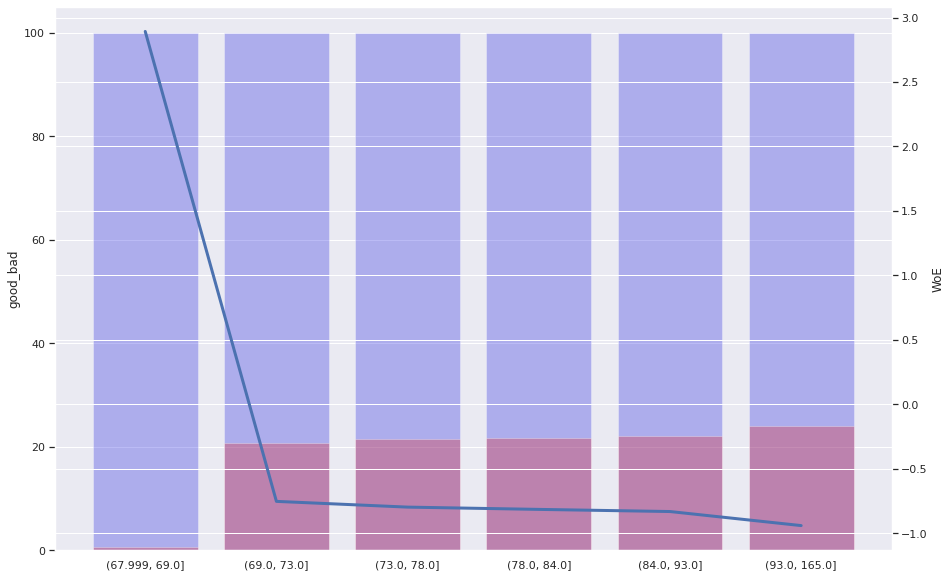

In [82]:
# fine classing by creating  a new variable
X['mths_since_last_pymnt_d_factor'], bins_mths_since_last_pymnt_d = pd.qcut(X['mths_since_last_pymnt_d'],retbins=True , q = 10, duplicates = 'drop')

mths_since_last_pymnt_d_df = woe_continous(X, 'mths_since_last_pymnt_d_factor', y, 90)
mths_since_last_pymnt_d_df

In [83]:
X_New = continues_dummy(X_New, X, 'mths_since_last_pymnt_d',bins_mths_since_last_pymnt_d)
X_New

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:MORTGAGE,home_ownership:OWN,home_ownership:RENT,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:major purchase,purpose:major_purchase,purpose:medical,purpose:moving,purpose:small_business,purpose:vacation,purpose:wedding,addr_state:AL,addr_state:CA,addr_state:DC,addr_state:HI,addr_state:ID,addr_state:IN,addr_state:ME,addr_state:MS,addr_state:MT,addr_state:NY,addr_state:OR,addr_state:PA,addr_state:SC,addr_state:TX,addr_state:VA,addr_state:WA,initial_list_status:f,initial_list_status:w,pymnt_plan:n,pymnt_plan:y,int_rate:A,int_rate:B,int_rate:C,int_rate:D,int_rate:E,int_rate:F,int_rate:G,int_rate:H,int_rate:I,int_rate:J,annual_inc:A,annual_inc:B,annual_inc:C,annual_inc:D,annual_inc:E,annual_inc:F,annual_inc:G,annual_inc:H,annual_inc:I,annual_inc:J,dti:A,dti:B,dti:C,dti:D,dti:E,dti:F,dti:G,dti:H,dti:I,dti:J,inq_last_6mths:A,inq_last_6mths:B,inq_last_6mths:C,mths_since_issue_d:A,mths_since_issue_d:B,mths_since_issue_d:C,mths_since_issue_d:D,mths_since_issue_d:E,mths_since_issue_d:F,mths_since_issue_d:G,mths_since_issue_d:H,mths_since_issue_d:I,mths_since_issue_d:J,term_int:A,revol_util:A,revol_util:B,revol_util:C,revol_util:D,revol_util:E,revol_util:F,revol_util:G,revol_util:H,revol_util:I,revol_util:J,revol_util:K,revol_util:L,revol_util:M,revol_util:N,revol_util:O,out_prncp:A,out_prncp:B,out_prncp:C,out_prncp:D,out_prncp:E,out_prncp:F,out_prncp:G,out_prncp:H,total_pymnt:A,total_pymnt:B,total_pymnt:C,total_pymnt:D,total_pymnt:E,total_pymnt:F,total_pymnt:G,total_pymnt:H,total_pymnt:I,total_pymnt:J,total_pymnt:K,total_pymnt:L,total_pymnt:M,total_pymnt:N,total_pymnt:O,total_rec_int:A,total_rec_int:B,total_rec_int:C,total_rec_int:D,total_rec_int:E,total_rec_int:F,total_rec_int:G,total_rec_int:H,total_rec_int:I,total_rec_int:J,last_pymnt_amnt:A,last_pymnt_amnt:B,last_pymnt_amnt:C,last_pymnt_amnt:D,last_pymnt_amnt:E,last_pymnt_amnt:F,last_pymnt_amnt:G,tot_cur_bal:A,tot_cur_bal:B,tot_cur_bal:C,tot_cur_bal:D,tot_cur_bal:E,tot_cur_bal:F,tot_cur_bal:G,total_rev_hi_lim:A,total_rev_hi_lim:B,total_rev_hi_lim:C,total_rev_hi_lim:D,total_rev_hi_lim:E,total_rev_hi_lim:F,total_rev_hi_lim:G,total_rev_hi_lim:H,total_rev_hi_lim:I,total_rev_hi_lim:J,mths_since_last_pymnt_d:A,mths_since_last_pymnt_d:B,mths_since_last_pymnt_d:C,mths_since_last_pymnt_d:D,mths_since_last_pymnt_d:E,mths_since_last_pymnt_d:F
0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0

,mths_since_last_credit_pull_d_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE
0,"(67.999, 74.0]",380050,0.914680,0.815059,347624.0,32426.0,0.837009,0.636203,0.274317,NaN,NaN
1,"(74.0, 83.0]",42927,0.799753,0.092062,34331.0,8596.0,0.082662,0.168655,-0.713092,0.114927,0.987409
2,"(83.0, 172.0]",43308,0.770343,0.092879,33362.0,9946.0,0.080329,0.195142,-0.887597,0.029410,0.174505


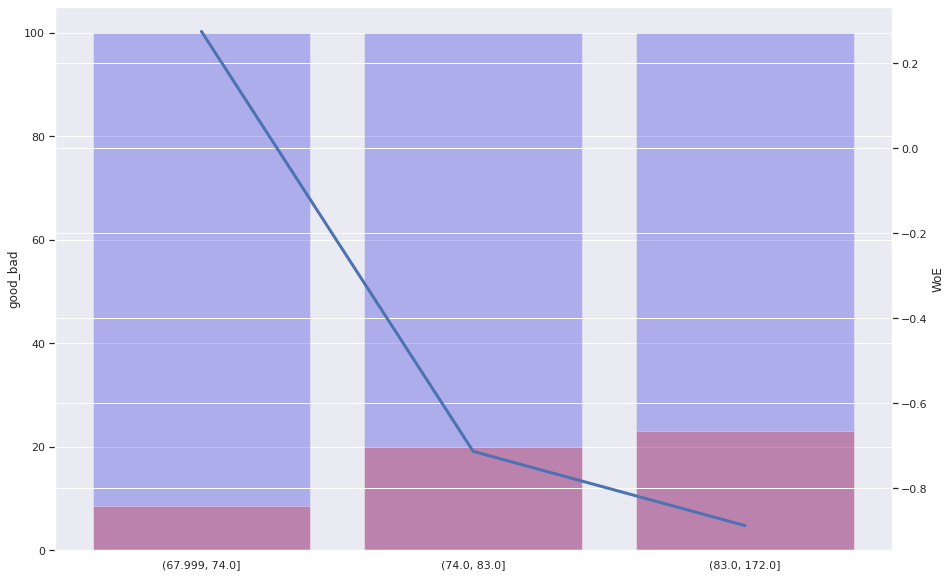

In [84]:
# fine classing by creating  a new variable
X['mths_since_last_credit_pull_d_factor'], bins_mths_since_last_credit_pull_d = pd.qcut(X['mths_since_last_credit_pull_d'],retbins=True , q = 10, duplicates = 'drop')

mths_since_last_credit_pull_d_df = woe_continous(X, 'mths_since_last_credit_pull_d_factor', y, 90)
mths_since_last_credit_pull_d_df

In [85]:
X_New = continues_dummy(X_New, X, 'mths_since_last_credit_pull_d',bins_mths_since_last_credit_pull_d)
X_New

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:MORTGAGE,home_ownership:OWN,home_ownership:RENT,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:major purchase,purpose:major_purchase,purpose:medical,purpose:moving,purpose:small_business,purpose:vacation,purpose:wedding,addr_state:AL,addr_state:CA,addr_state:DC,addr_state:HI,addr_state:ID,addr_state:IN,addr_state:ME,addr_state:MS,addr_state:MT,addr_state:NY,addr_state:OR,addr_state:PA,addr_state:SC,addr_state:TX,addr_state:VA,addr_state:WA,initial_list_status:f,initial_list_status:w,pymnt_plan:n,pymnt_plan:y,int_rate:A,int_rate:B,int_rate:C,int_rate:D,int_rate:E,int_rate:F,int_rate:G,int_rate:H,int_rate:I,int_rate:J,annual_inc:A,annual_inc:B,annual_inc:C,annual_inc:D,annual_inc:E,annual_inc:F,annual_inc:G,annual_inc:H,annual_inc:I,annual_inc:J,dti:A,dti:B,dti:C,dti:D,dti:E,dti:F,dti:G,dti:H,dti:I,dti:J,inq_last_6mths:A,inq_last_6mths:B,inq_last_6mths:C,mths_since_issue_d:A,mths_since_issue_d:B,mths_since_issue_d:C,mths_since_issue_d:D,mths_since_issue_d:E,mths_since_issue_d:F,mths_since_issue_d:G,mths_since_issue_d:H,mths_since_issue_d:I,mths_since_issue_d:J,term_int:A,revol_util:A,revol_util:B,revol_util:C,revol_util:D,revol_util:E,revol_util:F,revol_util:G,revol_util:H,revol_util:I,revol_util:J,revol_util:K,revol_util:L,revol_util:M,revol_util:N,revol_util:O,out_prncp:A,out_prncp:B,out_prncp:C,out_prncp:D,out_prncp:E,out_prncp:F,out_prncp:G,out_prncp:H,total_pymnt:A,total_pymnt:B,total_pymnt:C,total_pymnt:D,total_pymnt:E,total_pymnt:F,total_pymnt:G,total_pymnt:H,total_pymnt:I,total_pymnt:J,total_pymnt:K,total_pymnt:L,total_pymnt:M,total_pymnt:N,total_pymnt:O,total_rec_int:A,total_rec_int:B,total_rec_int:C,total_rec_int:D,total_rec_int:E,total_rec_int:F,total_rec_int:G,total_rec_int:H,total_rec_int:I,total_rec_int:J,last_pymnt_amnt:A,last_pymnt_amnt:B,last_pymnt_amnt:C,last_pymnt_amnt:D,last_pymnt_amnt:E,last_pymnt_amnt:F,last_pymnt_amnt:G,tot_cur_bal:A,tot_cur_bal:B,tot_cur_bal:C,tot_cur_bal:D,tot_cur_bal:E,tot_cur_bal:F,tot_cur_bal:G,total_rev_hi_lim:A,total_rev_hi_lim:B,total_rev_hi_lim:C,total_rev_hi_lim:D,total_rev_hi_lim:E,total_rev_hi_lim:F,total_rev_hi_lim:G,total_rev_hi_lim:H,total_rev_hi_lim:I,total_rev_hi_lim:J,mths_since_last_pymnt_d:A,mths_since_last_pymnt_d:B,mths_since_last_pymnt_d:C,mths_since_last_pymnt_d:D,mths_since_last_pymnt_d:E,mths_since_last_pymnt_d:F,mths_since_last_credit_pull_d:A,mths_since_last_credit_pull_d:B,mths_since_last_credit_pull_d:C
0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0

,mths_since_earliest_cr_line_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE
0,"(117.999, 191.0]",47395,0.868847,0.101644,41179.0,6216.0,0.099151,0.121959,-0.207042,NaN,NaN
1,"(191.0, 218.0]",47624,0.881845,0.102135,41997.0,5627.0,0.101120,0.110403,-0.087822,0.012998,0.119220
2,"(218.0, 238.0]",45703,0.884187,0.098015,40410.0,5293.0,0.097299,0.103849,-0.065152,0.002342,0.022670
3,"(238.0, 254.0]",48290,0.887161,0.103563,42841.0,5449.0,0.103153,0.106910,-0.035781,0.002974,0.029371
4,"(254.0, 271.0]",46125,0.885268,0.098920,40833.0,5292.0,0.098318,0.103830,-0.054550,0.001893,0.018769
5,"(271.0, 291.0]",45218,0.889402,0.096975,40217.0,5001.0,0.096834,0.098120,-0.013192,0.004134,0.041358
6,"(291.0, 316.0]",46695,0.894036,0.100143,41747.0,4948.0,0.100518,0.097081,0.034800,0.004633,0.047992
7,"(316.0, 349.0]",46732,0.902658,0.100222,42183.0,4549.0,0.101568,0.089252,0.129266,0.008622,0.094466
8,"(349.0, 406.0]",46376,0.904261,0.099458,41936.0,4440.0,0.100973,0.087113,0.147646,0.001603,0.018380
9,"(406.0, 632.0]",46127,0.909966,0.098924,41974.0,4153.0,0.101065,0.081482,0.215375,0.005705,0.067729


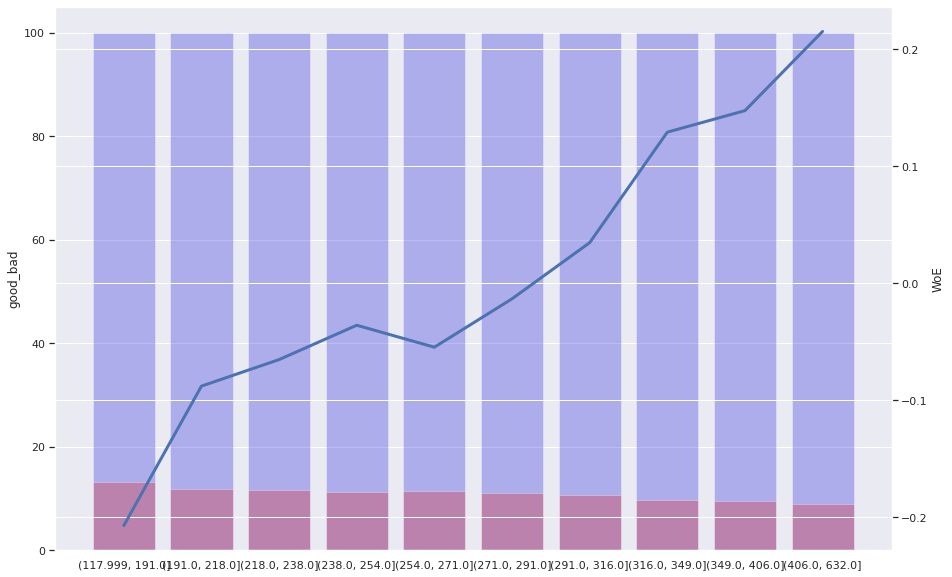

In [86]:
# fine classing by creating  a new variable
X['mths_since_earliest_cr_line_factor'], bins_mths_since_earliest_cr_line = pd.qcut(X['mths_since_earliest_cr_line'],retbins=True , q = 10, duplicates = 'drop')

mths_since_earliest_cr_line_df = woe_continous(X, 'mths_since_earliest_cr_line_factor', y, 90)
mths_since_earliest_cr_line_df

In [87]:
X_New = continues_dummy(X_New, X, 'mths_since_earliest_cr_line',bins_mths_since_earliest_cr_line)
X_New

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:MORTGAGE,home_ownership:OWN,home_ownership:RENT,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:major purchase,purpose:major_purchase,purpose:medical,purpose:moving,purpose:small_business,purpose:vacation,purpose:wedding,addr_state:AL,addr_state:CA,addr_state:DC,addr_state:HI,addr_state:ID,addr_state:IN,addr_state:ME,addr_state:MS,addr_state:MT,addr_state:NY,addr_state:OR,addr_state:PA,addr_state:SC,addr_state:TX,addr_state:VA,addr_state:WA,initial_list_status:f,initial_list_status:w,pymnt_plan:n,pymnt_plan:y,int_rate:A,int_rate:B,int_rate:C,int_rate:D,int_rate:E,int_rate:F,int_rate:G,int_rate:H,int_rate:I,int_rate:J,annual_inc:A,annual_inc:B,annual_inc:C,annual_inc:D,annual_inc:E,annual_inc:F,annual_inc:G,annual_inc:H,annual_inc:I,annual_inc:J,dti:A,dti:B,dti:C,dti:D,dti:E,dti:F,dti:G,dti:H,dti:I,dti:J,inq_last_6mths:A,inq_last_6mths:B,inq_last_6mths:C,mths_since_issue_d:A,mths_since_issue_d:B,mths_since_issue_d:C,mths_since_issue_d:D,mths_since_issue_d:E,mths_since_issue_d:F,mths_since_issue_d:G,mths_since_issue_d:H,mths_since_issue_d:I,mths_since_issue_d:J,term_int:A,revol_util:A,revol_util:B,revol_util:C,revol_util:D,revol_util:E,revol_util:F,revol_util:G,revol_util:H,revol_util:I,revol_util:J,revol_util:K,revol_util:L,revol_util:M,revol_util:N,revol_util:O,out_prncp:A,out_prncp:B,out_prncp:C,out_prncp:D,out_prncp:E,out_prncp:F,out_prncp:G,out_prncp:H,total_pymnt:A,total_pymnt:B,total_pymnt:C,total_pymnt:D,total_pymnt:E,total_pymnt:F,total_pymnt:G,total_pymnt:H,total_pymnt:I,total_pymnt:J,total_pymnt:K,total_pymnt:L,total_pymnt:M,total_pymnt:N,total_pymnt:O,total_rec_int:A,total_rec_int:B,total_rec_int:C,total_rec_int:D,total_rec_int:E,total_rec_int:F,total_rec_int:G,total_rec_int:H,total_rec_int:I,total_rec_int:J,last_pymnt_amnt:A,last_pymnt_amnt:B,last_pymnt_amnt:C,last_pymnt_amnt:D,last_pymnt_amnt:E,last_pymnt_amnt:F,last_pymnt_amnt:G,tot_cur_bal:A,tot_cur_bal:B,tot_cur_bal:C,tot_cur_bal:D,tot_cur_bal:E,tot_cur_bal:F,tot_cur_bal:G,total_rev_hi_lim:A,total_rev_hi_lim:B,total_rev_hi_lim:C,total_rev_hi_lim:D,total_rev_hi_lim:E,total_rev_hi_lim:F,total_rev_hi_lim:G,total_rev_hi_lim:H,total_rev_hi_lim:I,total_rev_hi_lim:J,mths_since_last_pymnt_d:A,mths_since_last_pymnt_d:B,mths_since_last_pymnt_d:C,mths_since_last_pymnt_d:D,mths_since_last_pymnt_d:E,mths_since_last_pymnt_d:F,mths_since_last_credit_pull_d:A,mths_since_last_credit_pull_d:B,mths_since_last_credit_pull_d:C,mths_since_earliest_cr_line:A,mths_since_earliest_cr_line:B,mths_since_earliest_cr_line:C,mths_since_earliest_cr_line:D,mths_since_earliest_cr_line:E,mths_since_earliest_cr_line:F,mths_since_earliest_cr_line:G,mths_since_earliest_cr_line:H,mths_since_earliest_cr_line:I,mths_since_earliest_cr_line:J
0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,1,0

### CLASS IMBALANCE CHECK
The class labels for the target column in our training set are imbalanced as indicated in the pie chart below. Using this imbalance data to train our model will make it bias towards predicting the class with the majority labels. However, the obtained percentage of the defaulted and non-defaulted borrowers looks satisfactory in a given dataset. 

In [88]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

In [89]:
X_PD_train, X_PD_test, y_PD_train, y_PD_test = train_test_split(X_New,X['good_bad'],test_size = 0.2)

In [90]:
#dealing with imbalance data
os = RandomOverSampler()
X_train_o, y_train_o = os.fit_resample(np.array(X_PD_train), np.array(y_PD_train))
y_train_series = pd.Series(y_train_o)

In [91]:
#check value counts after oversampling
y_train_series.value_counts()

0    332442
1    332442
dtype: int64

In [92]:
X_PD_train

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:MORTGAGE,home_ownership:OWN,home_ownership:RENT,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:major purchase,purpose:major_purchase,purpose:medical,purpose:moving,purpose:small_business,purpose:vacation,purpose:wedding,addr_state:AL,addr_state:CA,addr_state:DC,addr_state:HI,addr_state:ID,addr_state:IN,addr_state:ME,addr_state:MS,addr_state:MT,addr_state:NY,addr_state:OR,addr_state:PA,addr_state:SC,addr_state:TX,addr_state:VA,addr_state:WA,initial_list_status:f,initial_list_status:w,pymnt_plan:n,pymnt_plan:y,int_rate:A,int_rate:B,int_rate:C,int_rate:D,int_rate:E,int_rate:F,int_rate:G,int_rate:H,int_rate:I,int_rate:J,annual_inc:A,annual_inc:B,annual_inc:C,annual_inc:D,annual_inc:E,annual_inc:F,annual_inc:G,annual_inc:H,annual_inc:I,annual_inc:J,dti:A,dti:B,dti:C,dti:D,dti:E,dti:F,dti:G,dti:H,dti:I,dti:J,inq_last_6mths:A,inq_last_6mths:B,inq_last_6mths:C,mths_since_issue_d:A,mths_since_issue_d:B,mths_since_issue_d:C,mths_since_issue_d:D,mths_since_issue_d:E,mths_since_issue_d:F,mths_since_issue_d:G,mths_since_issue_d:H,mths_since_issue_d:I,mths_since_issue_d:J,term_int:A,revol_util:A,revol_util:B,revol_util:C,revol_util:D,revol_util:E,revol_util:F,revol_util:G,revol_util:H,revol_util:I,revol_util:J,revol_util:K,revol_util:L,revol_util:M,revol_util:N,revol_util:O,out_prncp:A,out_prncp:B,out_prncp:C,out_prncp:D,out_prncp:E,out_prncp:F,out_prncp:G,out_prncp:H,total_pymnt:A,total_pymnt:B,total_pymnt:C,total_pymnt:D,total_pymnt:E,total_pymnt:F,total_pymnt:G,total_pymnt:H,total_pymnt:I,total_pymnt:J,total_pymnt:K,total_pymnt:L,total_pymnt:M,total_pymnt:N,total_pymnt:O,total_rec_int:A,total_rec_int:B,total_rec_int:C,total_rec_int:D,total_rec_int:E,total_rec_int:F,total_rec_int:G,total_rec_int:H,total_rec_int:I,total_rec_int:J,last_pymnt_amnt:A,last_pymnt_amnt:B,last_pymnt_amnt:C,last_pymnt_amnt:D,last_pymnt_amnt:E,last_pymnt_amnt:F,last_pymnt_amnt:G,tot_cur_bal:A,tot_cur_bal:B,tot_cur_bal:C,tot_cur_bal:D,tot_cur_bal:E,tot_cur_bal:F,tot_cur_bal:G,total_rev_hi_lim:A,total_rev_hi_lim:B,total_rev_hi_lim:C,total_rev_hi_lim:D,total_rev_hi_lim:E,total_rev_hi_lim:F,total_rev_hi_lim:G,total_rev_hi_lim:H,total_rev_hi_lim:I,total_rev_hi_lim:J,mths_since_last_pymnt_d:A,mths_since_last_pymnt_d:B,mths_since_last_pymnt_d:C,mths_since_last_pymnt_d:D,mths_since_last_pymnt_d:E,mths_since_last_pymnt_d:F,mths_since_last_credit_pull_d:A,mths_since_last_credit_pull_d:B,mths_since_last_credit_pull_d:C,mths_since_earliest_cr_line:A,mths_since_earliest_cr_line:B,mths_since_earliest_cr_line:C,mths_since_earliest_cr_line:D,mths_since_earliest_cr_line:E,mths_since_earliest_cr_line:F,mths_since_earliest_cr_line:G,mths_since_earliest_cr_line:H,mths_since_earliest_cr_line:I,mths_since_earliest_cr_line:J
17277,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0
146877,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
451843,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
359064,1,

In [93]:
import statsmodels.api as sm
def stepwise_selection(X, y, 
                           initial_list=[], 
                           threshold_in=0.01, 
                           threshold_out = 0.05, 
                           verbose=True):
        """ Perform a forward-backward feature selection 
        based on p-value from statsmodels.api.OLS
        Arguments:
            X - pandas.DataFrame with candidate features
            y - list-like with the target
            initial_list - list of features to start with (column names of X)
            threshold_in - include a feature if its p-value < threshold_in
            threshold_out - exclude a feature if its p-value > threshold_out
            verbose - whether to print the sequence of inclusions and exclusions
        Returns: list of selected features 
        Always set threshold_in < threshold_out to avoid infinite looping.
        See https://en.wikipedia.org/wiki/Stepwise_regression for the details
        """
        included = list(initial_list)
        while True:
            changed=False
            # forward step
            excluded = list(set(X.columns)-set(included))
            new_pval = pd.Series(index=excluded)
            for new_column in excluded:
                model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
                new_pval[new_column] = model.pvalues[new_column]
            best_pval = new_pval.min()
            if best_pval < threshold_in:
                best_feature = new_pval.idxmin()
                included.append(best_feature)
                changed=True
                if verbose:
                    print('Add  {:30} with p-value {:.6f}'.format(best_feature, best_pval))

            # backward step
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
            # use all coefs except intercept
            pvalues = model.pvalues.iloc[1:]
            worst_pval = pvalues.max() # null if pvalues is empty
            if worst_pval > threshold_out:
                changed=True
                worst_feature = pvalues.idxmax()
                included.remove(worst_feature)
                if verbose:
                    print('Drop {:30} with p-value {:.6f}'.format(worst_feature, worst_pval))
            if not changed:
                break
        return included

In [94]:
X_PD_train.iloc[0:1000,:]

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:MORTGAGE,home_ownership:OWN,home_ownership:RENT,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:major purchase,purpose:major_purchase,purpose:medical,purpose:moving,purpose:small_business,purpose:vacation,purpose:wedding,addr_state:AL,addr_state:CA,addr_state:DC,addr_state:HI,addr_state:ID,addr_state:IN,addr_state:ME,addr_state:MS,addr_state:MT,addr_state:NY,addr_state:OR,addr_state:PA,addr_state:SC,addr_state:TX,addr_state:VA,addr_state:WA,initial_list_status:f,initial_list_status:w,pymnt_plan:n,pymnt_plan:y,int_rate:A,int_rate:B,int_rate:C,int_rate:D,int_rate:E,int_rate:F,int_rate:G,int_rate:H,int_rate:I,int_rate:J,annual_inc:A,annual_inc:B,annual_inc:C,annual_inc:D,annual_inc:E,annual_inc:F,annual_inc:G,annual_inc:H,annual_inc:I,annual_inc:J,dti:A,dti:B,dti:C,dti:D,dti:E,dti:F,dti:G,dti:H,dti:I,dti:J,inq_last_6mths:A,inq_last_6mths:B,inq_last_6mths:C,mths_since_issue_d:A,mths_since_issue_d:B,mths_since_issue_d:C,mths_since_issue_d:D,mths_since_issue_d:E,mths_since_issue_d:F,mths_since_issue_d:G,mths_since_issue_d:H,mths_since_issue_d:I,mths_since_issue_d:J,term_int:A,revol_util:A,revol_util:B,revol_util:C,revol_util:D,revol_util:E,revol_util:F,revol_util:G,revol_util:H,revol_util:I,revol_util:J,revol_util:K,revol_util:L,revol_util:M,revol_util:N,revol_util:O,out_prncp:A,out_prncp:B,out_prncp:C,out_prncp:D,out_prncp:E,out_prncp:F,out_prncp:G,out_prncp:H,total_pymnt:A,total_pymnt:B,total_pymnt:C,total_pymnt:D,total_pymnt:E,total_pymnt:F,total_pymnt:G,total_pymnt:H,total_pymnt:I,total_pymnt:J,total_pymnt:K,total_pymnt:L,total_pymnt:M,total_pymnt:N,total_pymnt:O,total_rec_int:A,total_rec_int:B,total_rec_int:C,total_rec_int:D,total_rec_int:E,total_rec_int:F,total_rec_int:G,total_rec_int:H,total_rec_int:I,total_rec_int:J,last_pymnt_amnt:A,last_pymnt_amnt:B,last_pymnt_amnt:C,last_pymnt_amnt:D,last_pymnt_amnt:E,last_pymnt_amnt:F,last_pymnt_amnt:G,tot_cur_bal:A,tot_cur_bal:B,tot_cur_bal:C,tot_cur_bal:D,tot_cur_bal:E,tot_cur_bal:F,tot_cur_bal:G,total_rev_hi_lim:A,total_rev_hi_lim:B,total_rev_hi_lim:C,total_rev_hi_lim:D,total_rev_hi_lim:E,total_rev_hi_lim:F,total_rev_hi_lim:G,total_rev_hi_lim:H,total_rev_hi_lim:I,total_rev_hi_lim:J,mths_since_last_pymnt_d:A,mths_since_last_pymnt_d:B,mths_since_last_pymnt_d:C,mths_since_last_pymnt_d:D,mths_since_last_pymnt_d:E,mths_since_last_pymnt_d:F,mths_since_last_credit_pull_d:A,mths_since_last_credit_pull_d:B,mths_since_last_credit_pull_d:C,mths_since_earliest_cr_line:A,mths_since_earliest_cr_line:B,mths_since_earliest_cr_line:C,mths_since_earliest_cr_line:D,mths_since_earliest_cr_line:E,mths_since_earliest_cr_line:F,mths_since_earliest_cr_line:G,mths_since_earliest_cr_line:H,mths_since_earliest_cr_line:I,mths_since_earliest_cr_line:J
17277,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0
146877,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
451843,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
359064,1,

In [95]:
result = stepwise_selection(X_PD_train.iloc[0:10000,:], y_PD_train.iloc[0:10000,],initial_list=[], 
                           threshold_in=0.01, 
                           threshold_out = 0.05, 
                           verbose=True)

print('resulting features:')
print(result)

Add  pymnt_plan:n                   with p-value 0.000000
Add  total_pymnt:A                  with p-value 0.000000
Add  mths_since_last_pymnt_d:D      with p-value 0.000000
Add  last_pymnt_amnt:F              with p-value 0.000000
Add  last_pymnt_amnt:G              with p-value 0.000000
Add  mths_since_last_pymnt_d:E      with p-value 0.000000
Add  mths_since_last_pymnt_d:C      with p-value 0.000000
Add  mths_since_last_pymnt_d:B      with p-value 0.000000
Add  mths_since_last_pymnt_d:F      with p-value 0.000000
Add  mths_since_issue_d:J           with p-value 0.000000
Add  mths_since_issue_d:I           with p-value 0.000000
Add  total_rec_int:A                with p-value 0.000000
Add  term_int:A                     with p-value 0.000000
Add  total_pymnt:B                  with p-value 0.000000
Add  total_rec_int:B                with p-value 0.000000
Add  last_pymnt_amnt:A              with p-value 0.000000
Add  total_pymnt:C                  with p-value 0.000000
Add  mths_sinc

### PRE-MODELLING FEATURE SELECTION (METHOD 1)
<p style='teData_lgdt-align: justify;'>
Feature selection is a process where you automatically select those features in your data that
contribute most to the prediction variable or output in which you are interested. Having
irrelevant features in your data can decrease the accuracy of many models, especially linear
algorithms like linear and logistic regression. Three benefits of performing feature selection
before modeling your data are: </P>


<ol>
  <li>Reduces Overfitting: Less redundant data means less opportunity to make decisions
based on noise.</li>
  <li>Improves Accuracy: Less misleading data means modeling accuracy improves.</li>
  <li>Reduces Training Time: Less data means that algorithms train faster.</li>
</ol>



In [96]:
#SF = SLCTD_FEATURES.sort_values(by = 'rank').head(num_of_features*2).iloc[0:num_of_features]['name']
SF = result
X_New = X_New[SF]
X_New

,pymnt_plan:n,total_pymnt:A,mths_since_last_pymnt_d:D,last_pymnt_amnt:F,last_pymnt_amnt:G,mths_since_last_pymnt_d:E,mths_since_last_pymnt_d:C,mths_since_last_pymnt_d:B,mths_since_last_pymnt_d:F,mths_since_issue_d:J,mths_since_issue_d:I,total_rec_int:A,total_pymnt:B,total_rec_int:B,last_pymnt_amnt:A,total_pymnt:C,mths_since_last_pymnt_d:A,total_pymnt:D,total_rec_int:C,total_rec_int:J,total_pymnt:E,total_rec_int:D,mths_since_issue_d:H,out_prncp:A,total_rec_int:I,total_pymnt:O,total_pymnt:F,total_rev_hi_lim:A,total_pymnt:G,grade:A,total_rec_int:E,total_pymnt:H,total_pymnt:I,total_pymnt:N,out_prncp:H,total_rec_int:F,out_prncp:G,out_prncp:F,out_prncp:E,last_pymnt_amnt:B,grade:B,total_pymnt:J,total_rec_int:G,total_pymnt:K,verification_status:Not Verified,mths_since_issue_d:G,mths_since_issue_d:F,out_prncp:D,out_prncp:C,total_rev_hi_lim:B,grade:C,last_pymnt_amnt:D,purpose:major_purchase,int_rate:A,mths_since_issue_d:A,total_rev_hi_lim:J,mths_since_last_credit_pull_d:A,mths_since_last_credit_pull_d:B,verification_status:Verified,verification_status:Source Verified,term_int:A,purpose:debt_consolidation
0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,1,1,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0
2,1,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0
4,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1
466281,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1
466282,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,1
466283,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0


### APLLYING MODEL (METHOD 1)

In [97]:
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression

In [98]:
X_PD_train, X_PD_test, y_PD_train, y_PD_test = train_test_split(X_New,X['good_bad'],test_size = 0.2)

In [99]:
#building model
model = LogisticRegression()
model.fit(X_PD_train, y_PD_train)

LogisticRegression()

In [100]:
#predicting
y_preds = model.predict(X_PD_test)

###  MODEL PERFORMANCE MEASURES 

#### CONFUSION MATRIData_lgd

In [101]:
#importing libraries for model training
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, \
                                                                         precision_recall_curve

[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

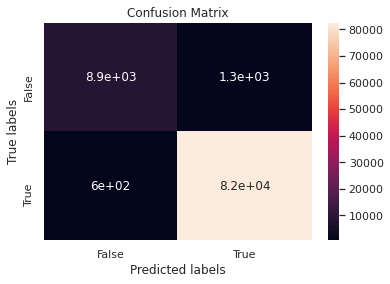

In [102]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, )
cm = confusion_matrix(y_PD_test,y_preds)
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['False', 'True'])
ax.yaxis.set_ticklabels(['False', 'True'])

In [103]:
#classification report
print(classification_report(y_PD_test, y_preds))

              precision    recall  f1-score   support

           0       0.94      0.87      0.90     10200
           1       0.98      0.99      0.99     83057

    accuracy                           0.98     93257
   macro avg       0.96      0.93      0.94     93257
weighted avg       0.98      0.98      0.98     93257



#### CROSS VALIDATION

In [ ]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithmd
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values = cross_val_score(model, X_New,X['good_bad'], cv = 10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

#### ROC, AUC, GINI, KS

In [ ]:
y_hat_test_proba     = model.predict_proba(X_PD_test)
y_hat_test_proba     = y_hat_test_proba[:][: , 1]
y_test_temp          = y_PD_test.copy()
y_test_temp.reset_index(drop = True, inplace = True)
y_test_proba         = pd.concat([y_test_temp, pd.DataFrame(y_hat_test_proba), pd.DataFrame(y_preds)], axis = 1)
y_test_proba.columns = ['y_test_actual', 'y_hat_test_proba', 'y_hat_test']
y_test_proba.index   = X_PD_test.index
y_test_proba.head()

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 1,)
# get the values required to plot a ROC curve
fpr, tpr, thresholds = roc_curve(y_test_proba['y_test_actual'], y_test_proba['y_hat_test_proba'])
# plot the ROC curve
sns.lineplot(fpr, tpr, color = 'blue', lw = 3)
# plot a secondary diagonal line, to plot randomness of model
sns.lineplot(fpr, fpr, linestyle = '--', color = 'r', lw = 3)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
#ax.xaxis.set_tick_params(labelsize=20)
#ax.yaxis.set_tick_params(labelsize=20)
plt.title('ROC curve')

In [ ]:
#Area under receiver operating charateristic cure
AUROC = roc_auc_score(y_test_proba['y_test_actual'], y_test_proba['y_hat_test_proba'])
print('The AUROC coefficient is {:6.4}'.format(AUROC))

In [ ]:
Gini = AUROC * 2 - 1
print('The Gini coefficient is {:6.4}'.format(Gini))

In [ ]:
from sklearn.metrics import precision_recall_curve, auc
# draw a PR curve
# calculate the no skill line as the proportion of the positive class
no_skill = len(y_PD_test[y_PD_test == 1]) / len(y)
# plot the no skill precision-recall curve
sns.lineplot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')

# calculate inputs for the PR curve
precision, recall, thresholds = precision_recall_curve(y_test_proba['y_test_actual'], \
                                                             y_test_proba['y_hat_test_proba'])
# plot PR curve
sns.lineplot(recall, precision, color = 'red', label='Logistic')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.title('PR curve')

In [ ]:
# calcualting ks statistic
actual_predicted_probs_df = y_test_proba.sort_values('y_hat_test_proba')

In [ ]:
actual_predicted_probs_df.head()

In [ ]:
actual_predicted_probs_df.tail()

In [ ]:
actual_predicted_probs_df = actual_predicted_probs_df.reset_index()

In [ ]:
actual_predicted_probs_df['cum_n_pop'] = actual_predicted_probs_df.index +1
actual_predicted_probs_df['cum_good'] = actual_predicted_probs_df['y_test_actual'].cumsum()
actual_predicted_probs_df['cum_bad'] = actual_predicted_probs_df['cum_n_pop'] - actual_predicted_probs_df['y_test_actual'].cumsum()

In [ ]:
actual_predicted_probs_df.head()

In [ ]:
actual_predicted_probs_df['cum_n_%'] = actual_predicted_probs_df['cum_n_pop']/(actual_predicted_probs_df.shape[0])
actual_predicted_probs_df['cum_good_%'] = actual_predicted_probs_df['cum_good']/actual_predicted_probs_df['y_test_actual'].sum()
actual_predicted_probs_df['cum_bad_%'] = actual_predicted_probs_df['cum_bad']/ (actual_predicted_probs_df.shape[0]-actual_predicted_probs_df['y_test_actual'].sum())

In [ ]:
actual_predicted_probs_df.head()

In [ ]:
plt.plot(actual_predicted_probs_df['cum_n_%'], actual_predicted_probs_df['cum_bad_%'])
plt.plot(actual_predicted_probs_df['cum_n_%'], actual_predicted_probs_df['cum_n_%'], linestyle='--', c='k')

In [ ]:
plt.plot(actual_predicted_probs_df['y_hat_test_proba'], actual_predicted_probs_df['cum_bad_%'], c='r')
plt.plot(actual_predicted_probs_df['y_hat_test_proba'], actual_predicted_probs_df['cum_good_%'], c='g')

In [ ]:
ks = max(actual_predicted_probs_df['cum_bad_%'] - actual_predicted_probs_df['cum_good_%'])
print('The KS score is {:6.4}'.format(ks))

##  METHOD 2

In [ ]:
X_New_backup = pd.concat([categorical_features_2, numerical_features], axis = 1)
X_New_backup

### OUTLIER TREATMENT
First, let's begin with detecting outliers. Now you guys might have wonder why should we detect outliers. In order to answer this question, I would like to give you an eData_lgdample. Suppose you have the weights of 5-year-old children. You measure the weight of five children and you want to find out the average weight. The children weigh 15, 12, 13, 10, and 35 kg. Now if you try to find out the average of these values, you will see that the answer 17 kg. If you look at the weight range carefully, then you will realize that the last observation is out of the normal range compared to the other observations. Now let's remove the last observation (which has a value of 35) and recalculate the average of the other observations. The new average is 12.5 kg. This new value is much more meaningful in comparison to the last average value. So, the outlier values impact the accuracy greatly; hence, it is important to detect them. Once that is done, we will eData_lgdplore techniques to handle them in upcoming section named handling outlier.<br>

Outliers detection techniques <br>

Here, we are using the following outlier detection techniques:<br>

    Percentile-based outlier detection

    Median Absolute Deviation (MAD)-based outlier detection

    Standard Deviation (STD)-based outlier detection

    Majority-vote-based outlier detection

    Visualization of outliers
    
My Philosophy about Finding Outliers

As you saw, there are many ways to identify outliers. My philosophy is that you must use your in-depth knowledge about all the variables when analyzing data. Part of this knowledge is knowing what values are typical, unusual, and impossible.

I find that when you have this in-depth knowledge, it’s best to use the more straightforward, visual methods. At a glance, data points that are potential outliers will pop out under your knowledgeable gaze. Consequently, I’ll often use boData_lgdplots, histograms, and good old-fashioned data sorting! These simple tools provide enough information for me to find unusual data points for further investigation.

Typically, I don’t use Z-scores and hypothesis tests to find outliers because of their various complications. Using outlier tests can be challenging because they usually assume your data follow the normal distribution, and then there’s masking and swamping. Additionally, the eData_lgdistence of outliers makes Z-scores less eData_lgdtreme. It’s ironic, but these methods for identifying outliers are actually sensitive to the presence of outliers! Fortunately, as long as researchers use a simple method to display unusual values, a knowledgeable analyst is likely to know which values need further investigation.

In my view, the more formal statistical tests and calculations are overkill because they can’t definitively identify outliers. Ultimately, analysts must investigate unusual values and use their eData_lgdpertise to determine whether they are legitimate data points. Statistical procedures don’t know the subject matter or the data collection process and can’t make the final determination. You should not include or eData_lgdclude an observation based entirely on the results of a hypothesis test or statistical measure.

At this stage of the analysis, we’re only identifying potential outliers for further investigation. It’s just the first step in handling them. If we err, we want to err on the side of investigating too many values rather than too few.

In my neData_lgdt post, I’ll eData_lgdplain what you’re looking for when investigating outliers and how that helps you determine whether to remove them from your dataset. Not all outliers are bad and some should not be deleted. In fact, outliers can be very informative about the subject-area and data collection process. It’s important to understand how outliers occur and whether they might happen again as a normal part of the process or study area.

    

In [ ]:
print(X_New_backup.shape)
for feature in numerical_features.drop(columns = ['good_bad']).columns.tolist():
    #print(feature)
    mu, sigma = numerical_features[feature].mean(), numerical_features[feature].std()
    #print(mu, sigma)
    X_New_backup = X_New_backup[(X_New_backup[feature] - mu > -3*sigma) &\
                                            (X_New_backup[feature] - mu < 3*sigma)]
print(X_New_backup.shape)

In [ ]:
X_New_backup

In [ ]:
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

X = X_New_backup.drop(columns = ['good_bad'])
y = X_New_backup['good_bad']

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler = MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit = PredictorScaler.fit(X)

# Generating the standardized values of X
X = PredictorScalerFit.transform(X)

#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#dealing with imbalance data
os = RandomOverSampler()
X_train_o, y_train_o = os.fit_resample(np.array(X), np.array(y))
y_train_series = pd.Series(y_train_o)

In [ ]:
X = pd.DataFrame(X_train_o, columns = X_New_backup.drop(columns = ['good_bad']).columns.tolist())
y = pd.DataFrame()
y['good_bad'] = y_train_series
print(X.shape)
print(y.shape)

In [ ]:
result_2 = stepwise_selection(X, y,initial_list=[], 
                           threshold_in=0.01,  threshold_out = 0.05,  verbose=True)

print('resulting features:')
print(result_2)

### PRE-MODELLING FEATURE SELECTION (METHOD2)

In [ ]:
SF = result_2
X = X_New_backup[SF]
X

In [ ]:
#from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, X_New_backup['good_bad'], test_size=0.3, random_state=42)

In [ ]:
print(X.shape)
print(X_New_backup['good_bad'].shape)

###  MODEL PERFORMANCE MEASURES 

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
# choose parameter Penalty='l1' or C=1
# choose different values for solver 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'
clf = LogisticRegression(C=1, penalty = 'l2', solver = 'lbfgs', max_iter = 2000)

# Printing all the parameters of logistic regression
# print(clf)

# Creating the model on Training Data
LOG=clf.fit(X_train,y_train)
prediction=LOG.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithmd
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(LOG, X , X_New_backup['good_bad'], cv = 10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

In [ ]:
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

# Printing all the parameters of KNN
print(clf)

# Creating the model on Training Data
KNN=clf.fit(X_train,y_train)
prediction=KNN.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(KNN, X, X_New_backup['good_bad'], cv = 10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# LGD (Definition of LGD)
<p style='teData_lgdt-align: justify;'>
In what follows, weintroduces models for loss given default (LGD) and recovery estimation. It worth to note that a loss arises only in the event of default and is conditional on the default event; hence it is called loss given default.</p>

<p style='teData_lgdt-align: justify;'>
LGDs are commonly eData_lgdpressed as a ratio and related to the outstanding amount or eData_lgdposure at default (EAD). In other words, LGD is essentially a loss rate given default. The recovery rate is then 1 − LGD. </p>

<p style='teData_lgdt-align: justify;'>
In order to unambiguously quantify the loss given default, you first need to have
a well-framed definition of default. For a thorough discussion, see Van Gestel and
Baesens (2009). For non-retail eData_lgdposures, rating agencies such as Moody’s, Standard
& Poor’s (S&P), and Fitch use definitions of default that, although to a large eData_lgdtent
overlapping, are not identical. Hence, if you use different definitions of default, then
of course you cannot compare the resulting default and loss rates. More specifically,
there is a direct interrelation between the default definition, the default rates, and
the loss or LGD values. Hence, when LGD rates are reported, it is always important
to ask for the default definition adopted, to make sure you can correctly interpret and
benchmark them.</p>

<p style='teData_lgdt-align: justify;'>
Usually, a bank will distinguish among different types of defaults. An operational
default is due to technical issues on the obligor side. For eData_lgdample, an obligor is acci-
dentally late when making the payment. A technical default is a default due to an
internal information system issue. For eData_lgdample, the payment was made on time,
but on the wrong account. A real default is a default due to financial problems or
insolvency. These are the defaults we are interested in when modeling LGD.
In case of default, various actions can take place. First, there can be a cure. This
means a defaulter will pay back all outstanding debt and return to a performing
or thus nondefaulter status with no accompanying loss. There could also be a
restructuring or settlement, whereby the bank and the defaulter work out a recovery
or repayment plan. The latter could, for eData_lgdample, result in an eData_lgdtension of the loan
maturity to reduce the monthly installment amount. This usually comes with a
medium loss. Finally, there could also be liquidation, repossession, or foreclosure,
which implies that the bank takes full possession of the collateral asset, if available,
and sells it by starting up a bankruptcy procedure. Depending upon the value of the
collateral, this may come with a high loss.</p>

<p style='teData_lgdt-align: justify;'>
When modeling LGD, it is of key importance that the default definition used
is the same as for PD because PD and the LGD will be combined to calculate both
eData_lgdpected and uneData_lgdpected loss. Note that changing the default definition simultane-
ously impacts both the PD and the LGD. If you would, for eData_lgdample, relaData_lgd the default
definition from 90 days to 60 days in payment arrears, then the default rates and PD
may increase, but the loss rates and LGD may decrease. Hence, the combined effect
in terms of eData_lgdpected loss stays relatively constant.</p>

<p style='teData_lgdt-align: justify;'>
Cures are those defaulters that become nondefaulters and return to performing
by repaying all outstanding debt. The corresponding LGD will thus be zero, or close to
zero. As already mentioned, note that this depends on the default definition. RelaData_lgding
the definition of a default, for eData_lgdample from 90 to 60 days, will typically increase the
number of cures. In case of multiple defaults, you could opt to include only the last
default event and also relate the PD and EAD to this.</p>


<p style='teData_lgdt-align: justify;'>
The loss given default can now be defined as the ratio of the loss on an eData_lgdposure due
to the default of an obligor to the amount outstanding at default. As such, it is the
complement of the recovery rate or, in other words, LGD equals 1 minus the recov-
ery rate. Important to note here is that LGD focuses on economic loss, rather than
accounting loss. Hence, all costs, but potentially also benefits, need to be properly taken into account when defining the LGD. EData_lgdample costs are: the costs for realizing
the collateral value, administrative costs incurred by sending collection letters or mak-
ing telephone calls with the defaulted obligor, legal costs, and time delays in what is
recovered. Also, benefits such as interest on arrears, penalties for delays, or other
commissions can be considered.</p>
    
<p style='teData_lgdt-align: justify;'>    
LGD can be measured using various methods such as the workout method used
for both corporate and retail eData_lgdposures, the market approach used for corporate eData_lgdpo-
sures, the implied historical LGD approach used for retail eData_lgdposures, and the implied
market approach used for corporate eData_lgdposures. In what follows, we will discuss each
of these in more detail.</p>

<p style='teData_lgdt-align: justify;'>
The most popular method for defining LGD is the workout method, which is
frequently adopted for both corporate and retail eData_lgdposures. The idea here is to work
out the collection process of a defaulted eData_lgdposure and carefully inspect the incoming
and outgoing cash flows. Both direct and indirect cash flows should be considered.
EData_lgdample indirect costs could be the operating costs of the workout department. These
cash flows should then be discounted to the moment of default to calculate the loss.
In EData_lgdhibit 10.2 you can see a simplified eData_lgdample.</p>

<p style='teData_lgdt-align: justify;'>
Let us assume an eData_lgdposure goes into default with an EAD of \$100. Soon after
default, the collection department will contact the defaulted obligor either by tele-
phone or by sending a collection letter. Let us assume the cost for this equals $5.
This is followed by the obligor paying back \$20, which is clearly not enough to cover
all outstanding debt. So, the collection department contacts the obligor again at a
cost of \$5. Let us say that the obligor does not react, so the bank decides to mate-
rialize the collateral and receives \$70 for it. We can now discount all these cash
flows back to the moment of default using a discount factor, which we leave unspec-
ified for the moment. Let us say that the discounted amount equals \$70. Note that
this is smaller than the sum of the four numbers, which equals \$80, because of the
discounting that has been applied. In other words, this means that \$70 has been
recovered from the \$100 EAD, hereby giving a recovery rate of 70 percent and an LGD
of 30 percent. </p>

<p style='teData_lgdt-align: justify;'>
Finally, according to the Basel Capital Accord, the definition of loss used in esti-
mating LGD is economic loss. As already stated, this means that every cash flow
or cost related to the default should be properly taken into account.</p>

<p style='teData_lgdt-align: justify;'>
In a second stage, after the observed LGDs have been computed, a bank is generally
interested in modeling the determinants of LGD (such as values of collaterals) and
provide LGD forecasts before a default has happened, but also after a default. The
remainder of this chapter details several variants of regression-type models that can
be applied by a bank for modeling and forecasting LGD. The data set we use originates
from a European bank and contains workout LGDs from mortgage loans that have
been accordingly anonymized and preprocessed. The models can, however, also be
applied to other LGD definitions, such as market LGDs.</p>

<p style='teData_lgdt-align: justify;'>
Throughout the teData_lgdt we define LGD as a fraction and the recovery rate as
(1 − LGD). Similar to PD models, the range of values for LGD requires specific
models and considerations. First, LGD usually ranges between zero and one [0; 1],
and values below zero or greater than one only rarely occur (or do not occur at all;
see previous discussion). Second, special cases are values of eData_lgdactly zero or eData_lgdactly
one, which indicate a zero loss or a total loss, respectively. A zero loss can occur
when a default is fully cured. Third, LGDs by definition are conditional quantities
and can be observed only if a default has happened. This imposes a sample selection
problem when defaults and LGDs are dependent, which should be accounted for in
order to avoid inconsistent parameter estimates.</p>


<p style='teData_lgdt-align: justify;'>
For the LGD and EAD models, we just need to considere those borrowers which had time to repay part of thier debts. In our dataset, these borrowers has recorded as "charged off" and "Does not meat credit policy". Hence, in the following we will eData_lgdtract these columns and a new working materials as below. </p>

## DEFINING THE PROBLEM


In [ ]:
Data_lgd = Data_backup[Data_backup['loan_status'].isin(\
                                      ['Charged Off','Does not meet the credit policy. Status:Charged Off'])]

## Independent Variables
For modelling LGD and EAD, the independent parameters are "mths_since_last_delinq" and "mths_since_last_record". Hence, we have to investigate them a bit deeper and if it is required, then impute them.

In [ ]:
Data_lgd['mths_since_last_record'].fillna(Data_lgd['mths_since_last_record'].mean(), inplace=True)
Data_lgd['mths_since_last_delinq'].fillna(Data_lgd['mths_since_last_delinq'].mean(), inplace = True)

In [ ]:
Data_lgd['recovery_rate'] = Data_lgd['recoveries'] / Data_lgd['funded_amnt']

In [ ]:
Data_lgd['recovery_rate'].fillna(Data_lgd['recovery_rate'].mean(), inplace=True)
Data_lgd['recovery_rate'].isnull().mean()

In [ ]:
def trnsfrmr(Data_lgd, c, d):
    a = Data_lgd.min()
    b = Data_lgd.max()
    Data_lgd = ((Data_lgd-a)*(d-c))/(b-a) + c
    return Data_lgd

In [ ]:
fig , (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = ((14,7)))
sns.histplot(Data_lgd['recovery_rate'], stat = 'probability', kde = True, bins = 25, ax = ax1)
Data_lgd['recovery_rate'] = trnsfrmr(Data_lgd['recovery_rate'], 0, 1)
sns.histplot(Data_lgd['recovery_rate'] , stat = 'probability', kde = True, bins = 25)

In [ ]:
Data_lgd['recovery_rate'] = np.where( Data_lgd['recovery_rate'] == 0, 0, 1)

## RECOVERY RATE TREATEMENT

<p style='teData_lgdt-align: justify;'>
Typically, any real-life LGD data set will contain negative LGDs and LGDs eData_lgdceeding
100 percent. An obvious question is: Where do these eData_lgdtreme values come from and
how should they be treated? A negative LGD is the same as a recovery rate eData_lgdceeding
100 percent. There could be various reasons for this. One eData_lgdample is that the EAD was measured at the time of default, and the claim on the borrower increased after
that because of fines or fees, and everything was recovered. In other words, the
amount recovered was higher than the EAD, thereby giving a recovery rate of higher
than 100 percent or a negative LGD. Another reason for a negative LGD could be
a gain in collateral sales. Negative LGDs should be capped at zero. For eData_lgdample, the
PRA eData_lgdpects firms to ensure that no LGD estimate is less than zero. Vice versa, LGDs
eData_lgdceeding 100 percent correspond to negative recovery rates. Also here, there could
be various reasons for this, such as additional recovery costs were incurred and noth-
ing was recovered. Alternatively, it could have been that additional drawings after
default were considered as LGD, thereby seriously increasing the costs. Also here, it is
recommended to cap such LGDs at 100 percent. The models that we will present later
in this chapter provide ways of dealing with this sort of truncation and censoring.</P>

In [ ]:
#droppng of irrelevant columns and rows with missing values
columns_to_drop = ['id', 'member_id', 'sub_grade', 'emp_title', 'url', 'desc', 'title', 'zip_code', 'next_pymnt_d',
                   'recoveries', 'collection_recovery_fee', 'total_rec_prncp', 'total_rec_late_fee', 'desc', 'mths_since_last_record',
                   'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'open_acc_6m', 'open_il_6m',
                   'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m',
                   'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m','policy_code',]
Data_lgd.drop(columns = columns_to_drop, inplace = True, axis = 1)
Data_lgd

In [ ]:
# To check how many of columns are gone
print(Data_lgd.shape)
Data_lgd = remover(Data_lgd)
print(Data_lgd.shape)

In [ ]:
# The independent variable emp_length_int is given in the form which is not useful. In order to make it useful
# we have to remore extra parts and then convert it into numeric value. Below lines of the code are doing it.
Data_lgd['emp_length'] = Data_lgd['emp_length'].str.replace(    '\+ years', '',    regex=True)
Data_lgd['emp_length'] = Data_lgd['emp_length'].str.replace('< 1 year', str(0),regex=True)
Data_lgd['emp_length'] = Data_lgd['emp_length'].str.replace('n/a',  str(0)    ,regex=True)
Data_lgd['emp_length'] = Data_lgd['emp_length'].str.replace(' years', ''      ,regex=True)
Data_lgd['emp_length'] = Data_lgd['emp_length'].str.replace(' year', ''       ,regex=True)
Data_lgd['emp_length'] = pd.to_numeric(Data_lgd['emp_length'])
Data_lgd.drop(columns  = ['emp_length'], inplace = True)

In [ ]:
# converting term column to numeric data type
def term_numeric(df, column):
    df[column] = pd.to_numeric(df[column].str.replace(' months', ''))
    
term_numeric(Data_lgd, 'term')
Data_lgd['term_int'] = Data_lgd['term']
Data_lgd.drop('term', axis = 1, inplace = True)

In [ ]:
date_columns(Data_lgd, 'issue_d')
date_columns(Data_lgd, 'last_pymnt_d')
date_columns(Data_lgd, 'last_credit_pull_d')
date_columns(Data_lgd, 'earliest_cr_line')

In [ ]:
# checking for missing values percentage  
missing_values = Data_lgd.isnull().sum()
missing_values[missing_values>0]/len(Data)

In [ ]:
Data_lgd

In [ ]:
# Here we are going to impute the annual income with it's mean value. Since above graph shows, anual income of the
# most of the borrower are localized around zero (consider the scale), it is not reasonable to impute with its mean
# value. However, here, for the sake of the simplicity we will do it. 
Data_lgd['annual_inc'].fillna(Data_lgd['annual_inc'].mean(), inplace=True)

# Below lines of the code, imputing the damaged variables. However, in a realistic case we have to be very careful
# according the imputation because it highly likely it will affects the quality of the results. I have to mention 
# that I did the simplest job. Above mentioned situation might be valid here as well.
Data_lgd['acc_now_delinq'].fillna(Data_lgd['acc_now_delinq'].mean(), inplace=True)
Data_lgd['total_acc'].fillna(Data_lgd['total_acc'].mean(), inplace=True)
Data_lgd['pub_rec'].fillna(Data_lgd['pub_rec'].mean(), inplace=True)
Data_lgd['open_acc'].fillna(Data_lgd['open_acc'].mean(), inplace=True)
Data_lgd['inq_last_6mths'].fillna(Data_lgd['inq_last_6mths'].mean(), inplace=True)
Data_lgd['delinq_2yrs'].fillna(Data_lgd['delinq_2yrs'].mean(), inplace=True)
Data_lgd['collections_12_mths_ex_med'].fillna(Data_lgd['collections_12_mths_ex_med'].mean(), inplace=True)
Data_lgd['revol_util'].fillna(Data_lgd['revol_util'].mean(), inplace=True)
Data_lgd['mths_since_last_pymnt_d'].fillna(Data_lgd['mths_since_last_pymnt_d'].mean(), inplace=True)
Data_lgd['mths_since_last_credit_pull_d'].fillna(Data_lgd['mths_since_last_credit_pull_d'].mean(), inplace=True)
Data_lgd['mths_since_earliest_cr_line'].fillna(Data_lgd['mths_since_earliest_cr_line'].mean(), inplace=True)
Data_lgd

In [ ]:
categorical_features_lgd = Data_lgd.select_dtypes(exclude = 'number')
categorical_features_lgd = pd.concat([categorical_features_lgd, Data_lgd['recovery_rate']] , axis = 1)
categorical_features_lgd

In [ ]:
numerical_features_lgd   = Data_lgd.select_dtypes(exclude = 'object')
numerical_features_lgd = pd.concat([numerical_features_lgd, Data_lgd['recovery_rate']] , axis = 1)
numerical_features_lgd

In [ ]:
fig , axes = plt.subplots(nrows = 4, ncols = 3, figsize = ((18,25)))
angel = 90
count = 1
for i in range(3):
    for j in range(3):
        if (count <= len(categorical_features_lgd.columns.tolist())):
            feature = categorical_features_lgd.columns.tolist()[count-1]
            plt.subplot(3,3, count)
            sns.barplot(x = sorted(categorical_features_lgd[feature].unique()) , \
                    y = [100]*len(categorical_features_lgd[feature].unique().tolist()), color = 'blue', alpha = 0.4)
            sns.barplot(x = sorted(categorical_features_lgd[feature].unique()) , \
                    y = (1 - Data_lgd.groupby(feature)["recovery_rate"].sum()\
                       /Data_lgd.groupby(feature)["recovery_rate"].count()\
                        )*100, color = 'red', alpha = 0.4)
            count = count + 1
            locs, labels = plt.xticks()
            plt.setp(labels, rotation = 90)
        else:
            pass
            plt.tight_layout()        
            plt.show()

In [ ]:
# function to calculate woe of categorical features

def woe_categorical_lgd(df, cat_feature, good_bad_df, label_angel):
    fig , ax1 = plt.subplots(nrows = 1, ncols = 1, figsize = ((15,10)))
    ax2 = ax1.twinx()
    #print([100]*len(df[cat_feature].unique().tolist()))
    #print(df[cat_feature].unique().tolist())
    sns.barplot(ax = ax1, x = df[cat_feature].unique().tolist(), y = [100]*len(df[cat_feature].unique().tolist()),\
                               color = 'blue', alpha = 0.3)
    sns.barplot(ax = ax1, x =  df[cat_feature].unique().tolist(),\
                y = (1- df.groupby(cat_feature)["recovery_rate"].sum()/df.groupby(cat_feature)["recovery_rate"].count())*100,\
                color = 'red', alpha = 0.3)
     
    df = pd.concat([df[cat_feature], good_bad_df], axis=1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    
    sns.lineplot(ax = ax2, x = np.array(df.iloc[:, 0].apply(str)), y = df['WoE'], markers = 'o', \
                linewidth = 3, markersize = 14 )
    locs, labels = plt.xticks()
    plt.setp(labels, rotation=45)
    return df

In [ ]:
df_grade = woe_categorical_lgd(Data_lgd, 'grade', y , label_angel = 90)
df_grade

In [ ]:
Data_lgd['grade'] = Data_lgd['grade'].replace({'E' : 'C'}, regex=True)

In [ ]:
df_grade = woe_categorical_lgd(Data_lgd, 'home_ownership', y , label_angel = 90)
df_grade

In [ ]:
Data_lgd['home_ownership'] = Data_lgd['home_ownership'].replace({'NONE' : 'OWN', 'OTHER':'OWN'}, regex=True)

In [ ]:
df_grade = woe_categorical_lgd(Data_lgd, 'verification_status', y , label_angel = 90)
df_grade

In [ ]:
df_grade = woe_categorical_lgd(Data_lgd, 'purpose', y , label_angel = 90)
df_grade

In [ ]:
Data_lgd['purpose'] = Data_lgd['purpose'].replace({'small_business' : 'car', 'house' : 'car',\
                                                   'vacation': 'car', 'moving':'other'\
                                                                                             }, regex=True)

Data_lgd['purpose'] = Data_lgd['purpose'].replace({'home_improvement' : 'medical', 'major_purchase' : 'medical',\
                                                                                             }, regex=True)
Data_lgd['purpose'] = Data_lgd['purpose'].replace({'wedding' : 'car', 'renewable_energy' : 'car',\
                                                                                   'educational' : 'car'}, regex=True)

In [ ]:
df_grade = woe_categorical_lgd(Data_lgd, 'addr_state', y , label_angel = 90)
df_grade

In [ ]:
df_grade = woe_categorical_lgd(Data_lgd, 'initial_list_status', y , label_angel = 90)
df_grade

## LOGISTIC REGRESSION

In [ ]:
#Data_lgd = pd.concat([Data_lgd[categorical_features_lgd.columns.tolist()], Data_lgd['recovery_rate']], axis = 1)
X_LGD = pd.get_dummies(Data_lgd[categorical_features_lgd.columns.tolist()])

y_LGD = Data_lgd['recovery_rate']

X_lgd_train, X_lgd_test, y_lgd_train, y_lgd_test = train_test_split(X_LGD, y_LGD,test_size = 0.2)

In [ ]:
#building model
model = LogisticRegression()
model.fit(X_lgd_train, y_lgd_train)

In [ ]:
y_preds = model.predict(X_lgd_test)
y_preds

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, )
cm = confusion_matrix(y_lgd_test,y_preds)
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['False', 'True'])
ax.yaxis.set_ticklabels(['False', 'True'])

In [ ]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithmd
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values = cross_val_score(model, X_lgd_train, y_lgd_train, cv = 10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))